
# ロジスティクス・ネットワーク設計システム MELOS

> ロジスティクス・ネットワーク設計システム MEta Logistic network Optimization System


In [ ]:
#| default_exp lnd

In [ ]:
#| include: false
from nbdev.showdoc import *
%reload_ext autoreload
%autoreload 2

In [ ]:
#| export
import sys

import pathlib
sys.path.append('..')
from scmopt2.data import *
from scmopt2.core import *
    
GUROBI = False  #サーバーの場合はFalseにする．

if GUROBI:
    from gurobipy import GRB, quicksum, Model, multidict, tuplelist, LinExpr
else:
    from pulp import PULP_CBC_CMD
    from scmopt2.mypulp import  GRB, quicksum, Model, multidict, tuplelist, LinExpr

import pandas as pd
import random
import numpy as np
import pickle
import requests
import ast

from geopy.distance import great_circle as distance
from sklearn.cluster import MiniBatchKMeans, KMeans, AgglomerativeClustering

import pathlib
import statistics

import plotly.graph_objs as go
import plotly.express as px
import plotly

import string
import datetime
import math
from collections import OrderedDict, defaultdict
import networkx as nx

from openpyxl import Workbook, load_workbook
from openpyxl.worksheet.table import Table, TableStyleInfo
from openpyxl.chart import ScatterChart, Reference, Series
from openpyxl.worksheet.datavalidation import DataValidation
from openpyxl.formatting.rule import ColorScaleRule, CellIsRule, FormulaRule
from openpyxl.styles import Color, PatternFill, Font, Border, Alignment
from openpyxl.styles.borders import Border, Side
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.comments import Comment

from collections import defaultdict
from IPython.display import Image, YouTubeVideo

folder = "./data/"

host = "test-osrm-intel.aq-cloud.com"
#host ="localhost"

## 簡易システムビデオ

MELOS (MEta Logistic Optimization System)

MEta Logistic network Optimization System-GF (Green FIeld)

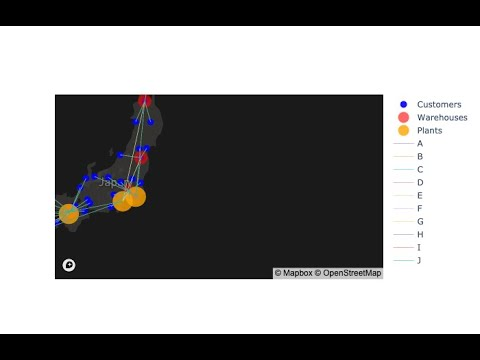

In [ ]:
#| echo: false
YouTubeVideo("x9c0UQo699g")

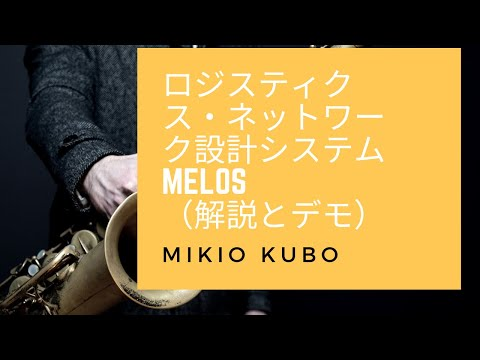

In [ ]:
#| echo: false
YouTubeVideo("P0gosa6uxk0")

In [ ]:
#| include: false
# model = Model()
# Country = ["A", "B"] 
# tax ={"A": 0.34, "B":0.5 } #税率

# fixed_cost = {"A":20000., "B":120000} #固定費用
# variable_cost = 7. #製造変動費用
# market_price = 20. #売値
# duty = 0.12        #関税
# max_volume = 20000. #最大輸送量

# Profit, ProfitPlus, ProfitMinus = {}, {}, {}
# for c in Country:
#     Profit[c] = model.addVar(name=f"Profit[{c}]", lb=-GRB.INFINITY) #負の値もとれる変数（各国の利益）
#     ProfitPlus[c] = model.addVar(name=f"Profit+[{c}]")  #正の利益 
#     ProfitMinus[c] = model.addVar(name=f"Profit-[{c}]") #負の利益
# x = model.addVar(name = "x[A,B]", ub=max_volume)  # 輸送量
# t = model.addVar(name = "t[A,B]")  # 移転価格
# model.update()
# model.setObjective(quicksum( (1-tax[c])*ProfitPlus[c] - ProfitMinus[c] for c in Country), GRB.MAXIMIZE) 
# for c in Country:
#     model.addConstr(Profit[c] == ProfitPlus[c]- ProfitMinus[c])
# model.addConstr( t*x - variable_cost*x - fixed_cost["A"] == Profit["A"])
# model.addConstr( -(1+duty)*t*x + market_price*x - fixed_cost["B"] == Profit["B"])
# model.Params.NonConvex =2 #非凸の二次も解けるようする！
# model.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-06-24
Set parameter NonConvex to value 2
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 8 columns and 6 nonzeros
Model fingerprint: 0xd58bde70
Model has 2 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 2e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [2e+04, 2e+04]
  RHS range        [0e+00, 0e+00]
  QRHS range       [2e+04, 1e+05]

Continuous model is non-convex -- solving as a MIP

Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 6 rows, 8 columns, 16 nonzeros
Presolved model has 1 bilinear constraint(s)
Variable types: 8 continuous, 0 integer (0 binary)

Root relaxation: objective 5.940000e+04, 4 iterations, 0.00 seconds (0.00 work units)

    Nodes    |   

In [ ]:
#| include: false
# print("flow=", x.X )
# print("transfer price", t.X)
# for c in Country:
#     print(f"Profit of {c}", Profit[c].X)

In [ ]:
#| include: false
# model = Model()
# Country = ["A", "B", "C"] 
# tax ={"A": 0.34, "B":0.5, "C":0.3 }
# fixed_cost = {"A":20000., "B":120000, "C":120000}
# variable_cost = 7.
# market_price = 20.
# duty = 0.12
# max_volume = 20000.
# Profit, ProfitPlus, ProfitMinus = {}, {}, {}
# for c in Country:
#     Profit[c] = model.addVar(name=f"Profit[{c}]", lb=-GRB.INFINITY)
#     ProfitPlus[c] = model.addVar(name=f"Profit+[{c}]")
#     ProfitMinus[c] = model.addVar(name=f"Profit-[{c}]")
# x, t = {}, {}
# x["A","B"] = model.addVar(name = "x[A,B]", ub=max_volume)  # 輸送量
# x["A","C"] = model.addVar(name = "x[A,C]", ub=max_volume)  
# t["A","B"] = model.addVar(name = "t[A,B]")  # 移転価格
# t["A","C"] = model.addVar(name = "t[A,C]")  
# model.update()
# model.setObjective(quicksum( (1-tax[c])*ProfitPlus[c] - ProfitMinus[c] for c in Country), GRB.MAXIMIZE) 
# for c in Country:
#     model.addConstr(Profit[c] == ProfitPlus[c]- ProfitMinus[c])
# model.addConstr( t["A","B"]*x["A","B"] + t["A","C"]*x["A","C"] - variable_cost*(x["A","B"]+x["A","C"]) - fixed_cost["A"] == Profit["A"])
# model.addConstr( -(1+duty)*t["A","B"]*x["A","B"]  + market_price*x["A","B"] - fixed_cost["B"] == Profit["B"])
# model.addConstr( -(1+duty)*t["A","C"]*x["A","C"]  + market_price*x["A","C"] - fixed_cost["C"] == Profit["C"])
# #同一の移転価格
# model.addConstr( t["A","B"] ==  t["A","C"])
# #model.addConstr( t["A","B"] ==  (variable_cost+market_price)/2. ) 

In [ ]:
#| include: false
# model.Params.NonConvex =2 #非凸の二次も解けるようする！
# model.optimize()

In [ ]:
#| include: false
# for (i,j) in x:
#     print("flow=",i,j, x[i,j].X )
#     print("transfer price",i,j, t[i,j].X)
# for c in Country:
#     print(f"Profit of {c}", Profit[c].X)

## はじめに

ここでは，ロジスティクス・ネットワーク設計問題に対する包括的モデルを示す．
モデルの目的は，単位期間（通常は年）ベースのデータをもとに，
ロジスティクス・ネットワークの形状を決めることにある．
モデルを求解することによって得られるのは，倉庫の設置の是非，
地点間別の各製品の単位期間内の総輸送量，
工場別の各製品の単位期間内の総生産量である．

ロジスティクス・ネットワーク設計モデルでは，
以下の意思決定項目に対する最適化を同時に行う．

- 各製品をどの工場でどれだけ生産するか？
- 各製品をどの倉庫（配送センターや中継拠点の総称）で保管するか？
- 各顧客群の各製品の需要を，どの地点から運ぶか？ 
- 倉庫をどこに新設するか？（または移転，閉鎖するか？）
- 複数の倉庫の候補地点からどれを選択するか？

このような意思決定は，単に現状のロジスティクス・ネットワーク
の見直しを行う場合だけでなく，以下の状況においても有効に用いられる．

- 吸収・合併の後のロジスティクス・ネットワークの再編成
- 新製品投入時の意思決定（どこで製造して，どのような流通チャネルで流すか）
- ロジスティクスにおける戦略的提携（ロジスティクス・パートナーシップ）

## 例題

ここで用いるサンプルデータは， データ生成モジュールのgenerate_cust, generate_prod, generate_demandなどの諸関数を用いて生成したものである． 

以下，順に説明する．

### 顧客データ

品が最終的に消費される場所を**顧客**（customer）とよぶ．
顧客は，対象となるシステムに依存して，小売店であったり個々の家庭であったりする．
モデルとして扱う場合には，同じ施設からサービスされると考えられる顧客の集まりを
1つの顧客に集約することができる．
ここでは，個々の顧客を同じサプライ・チェインでサービス
を行っても差し支えない程度に集約したものを**顧客群**（customer group）とよぶこともあるが，以下では単に顧客と呼ぶ．

通常は，需要の大きい顧客や特殊なサービスを要求する顧客は1つの顧客として扱い，
残りの顧客を地区ごとに集約して扱うことが多い．
これは，同じ地区に属する顧客への配送は，（大口や特殊な顧客以外は）
同一のデポから行われる場合が多いことに起因する．
個々の顧客の数は数万から数十万におよぶこともあるが，
集約後の顧客群の数は，多くても数百になるようにする．

顧客群に集約するための簡便法として郵便番号を用いる方法もあるが，
できれば1つの顧客群に含まれる顧客数および需要量が，なるべくバランスするように
することが望ましい． ここでは，幾つかのクラスタリング手法 (Weizfeld法， $k$-means法, 階層的クラスタリング法, $k$-メディアン法） を用いる．

例題で用いる顧客データの列は， 名前 (name) と緯度・経度 (lat, lon; latitude, longitudeの略) である． 

In [ ]:
cust_df = pd.read_csv(folder + "cust.csv", index_col=0)
cust_df.head()

,name,lat,lon
id,,,
1,札幌市,43.06417,141.34694
2,青森市,40.82444,140.74000
3,盛岡市,39.70361,141.15250
4,仙台市,38.26889,140.87194
5,秋田市,39.71861,140.10250


### 製品データ

ロジスティクス・ネットワーク内を流れるものを**製品**（product）とよぶ．
製品の種類は，対象とするロジスティクス・システムにもよるが，通常は膨大なものになるが，
ストラテジックレベルの意思決定モデルを扱う場合には，通常同じ特性をもつ製品を集約して扱う．
製品を集約したものを，個々の製品と区別するために**製品**（product group）とよぶこともある．
通常，製品の数が数十程度になるように集約する． また，ABC分析をして，影響の少ない製品を除いて最適化を行うこともある．

製品データは，以下の列をもつが，ロジスティクス・ネットワーク設計モデルで使うのは，名称 (name)と重量 (weight)だけである．

- name: 製品の名称
- weight: 製品の重量 (単位はkg)
- volume: 製品の容量 (単位は  𝑚3 ）
- cust_value: 顧客上での製品の価値
- dc_value: 倉庫上での製品の価値
- plnt_value: 工場における製品の価値
- fixed_cost: 製品を生産する際の段取り（固定）費用

In [ ]:
prod_df = pd.read_csv(folder + "prod.csv", index_col=0)
prod_df.head()

,name,weight,volume,cust_value,dc_value,plnt_value,fixed_cost
0,A,2,0,7,1,1,14
1,B,5,0,5,1,1,14
2,C,1,0,5,1,1,19
3,D,3,0,5,1,1,17
4,E,1,0,10,1,1,18


### 倉庫データ

最終需要地点および供給地点以外の場所で，かつ製品の製造・加工を行わない地点を総称して
**倉庫**（warehouse）とよぶことにする．
実際には，倉庫は流通センター（DC: Distribution Centerの略），デポ，クロスドッキング地点，港，空港，ハブなど様々な形態をとる．

倉庫の役割と機能には，以下のものが考えられる．

- 調達（購入）の規模の経済性のため． 大量購入に伴う割引が行われるとき，大量に購入した製品を一時的に保管しておく際に，倉庫の保管機能が用いられる．

- 混載による規模の経済性のため．複数の小売店（スーパーなど）で消費される製品を，
直接製造業者（メーカー）から輸送すると，小ロットの輸送のため費用が増大する．
メーカーから車立て輸送を行うためには，複数の小売店の需要をあわせる必要があるが，
そのための中継地点として倉庫の仕分け機能が用いられる．
メーカーから運ばれた複数の製品は，倉庫で方面別に仕分けされて，小売店に運ばれる．
この際，複数の製品を混載して輸送するので，やはり小ロット輸送による費用の増大を避けることができる．
この仕分け機能に特化した倉庫を**クロスドッキング地点**（cross docking point）とよぶ．
クロスドッキング地点は，保管機能をもたず，メーカーから小売店が発注した量と同じ量を受け取り，
即座に仕分けして小売店に輸送する．

- リスク共同管理効果を得るため．
複数の小売店の在庫を，集約して倉庫に保管することによって，安全在庫量を減らすことができる．これを**リスク共同管理**（risk pooling）効果とよぶ．
この場合には，倉庫は，リスク共同管理によってサプライ・チェイン全体での在庫を減らすために用いられる．

- 顧客へのサービスレベル向上のため．
たとえば，コンビニエンスストアの配送センターは，弁当が約$3$時間以内で配達可能なように設置される．
これによって，$1$日に数回の弁当の配送が可能になり，顧客に出来たての弁当を届けることが可能になる．
このように，倉庫は小売店（コンビニエンスストア）へのリード時間を減少させるために用いられる．

- 単一ソース条件． 顧客（特に小売店）に対して，複数の倉庫からの配送を行うことを許さないという条件が付加されることがある．
これは，荷捌き場の制限や，荷物の受け入れを複数回行う手間を省くためであるが，そのためには，複数のメーカーの製品を倉庫で積み替えて
運ぶことが必要になる．

- 製品に付加価値をつけるため． 最終製品への分化を，なるべくサプライ・チェインの下流で行うことによって，
顧客サービスを向上させ，安全在庫を減少させることができる．
これを**遅延差別化**（delayed differentiation, postponement）とよぶ．
遅延差別化の方法として，
工場で最終製品まで製造してまうのではなく，顧客に近い倉庫で，製造の最終工程を行うことがあげられる．
たとえば，値札やラベルを付けたり，簡単な加工を行うことが代表例である．

倉庫データは，倉庫の配置可能地点を表し，以下の列をもつ． 

- name: 倉庫名称
- lb: 容量下限
- ub: 容量上限
- fc: 固定費用
- vc: 変動費用
- lat: 緯度
- lon: 経度

In [ ]:
dc_df = pd.read_csv(folder + "DC.csv", index_col=0)
dc_df.head()

,name,lb,ub,fc,vc,lat,lon
0,札幌市,0.0,501136.2,10037,0.432510,43.06417,141.34694
1,青森市,0.0,501136.2,10235,0.414573,40.82444,140.74000
2,盛岡市,0.0,501136.2,10908,0.414802,39.70361,141.15250
3,仙台市,0.0,501136.2,10072,0.136525,38.26889,140.87194
4,秋田市,0.0,501136.2,10767,0.029622,39.71861,140.10250


### 工場データ

製品の製造・加工する地点を総称して**工場**（plant）とよぶ．
実際には，工場は生産工場，部品工場，流通加工を行う倉庫など様々な形態をとる．

工場における製品の生産量上限は，別途定義するので，工場は名称(name)と緯度・経度情報 (lat,lon) だけをもつ． 

In [ ]:
plnt_df = pd.read_csv(folder + "Plnt.csv", index_col=0)
plnt_df.head()

,name,lat,lon
0,Odawara,35.284982,139.196133
1,Osaka,34.563101,135.415129
2,Chiba,35.543452,140.113908


### 需要データ

ロジスティクス・ネットワーク設計モデルでは，各顧客・製品に対する計画期間内の総需要量の情報が必要になる．
通常，計画期間は1年とし，年間の総需要を入力とする．これは，日々の需要を記録した需要データから計算される．

需要データは，以下の列をもつ．

- date: 日付
- cust: 顧客名
- prod: 製品名
- demand: 需要量

In [ ]:
demand_df = pd.read_csv(folder + "demand.csv", index_col=0)
demand_df.head()

,date,cust,prod,demand,sales
index,,,,,
0,2019-01-01,札幌市,A,10,10
1,2019-01-01,札幌市,B,10,10
2,2019-01-01,札幌市,C,3,3
3,2019-01-01,札幌市,D,0,0
4,2019-01-01,札幌市,E,37,37


### 生産データ

計画期間内における工場における製品の生産量には上限がある．これを定義するのが生産データである．
使用する列は，工場名 (plnt)，製品名 (prod)，生産量上限 (ub)だけである．

In [ ]:
plnt_prod_df = pd.read_csv(folder + "Plnt-Prod.csv", index_col=0)
plnt_prod_df.head()

,plnt,prod,ub,lead_time
0,Osaka,D,813,28
1,Osaka,A,18026,29
2,Osaka,E,77704,25
3,Osaka,J,52907,26
4,Osaka,G,15774,28


## 連続施設配置問題

平面上に施設が配置可能と仮定した施設問題に対する近似解法を考える。

施設数が1つの場合には、Weiszfeld法と呼ばれる反復法で近似解が得られることが知られている。
複数施設に対しては、k-means法と似た反復解法が考えられる。ここでは、重み付き複数施設配置問題に対するWeiszfeld法を構築する。

以下では、1つの施設を選択するためのWeiszfeld法について解説する。

各顧客 $i$ は平面上に分布しているものとし，その座標を $(X_i,Y_i)$ とする．
顧客は重み $w_i$ をもち，目的関数は施設と顧客の間の距離に重みを乗じたものの和とする．
顧客と施設間の距離は $\ell_p$ ノルム（$1 \leq p$）を用いて計算されるものとする．
東京都市圏の道路ネットワークでは $p \approx 1.8901$ と推定されており，
実務的には Euclidノルム（$p=2$）に迂回係数（$1.3$ 程度） を乗じたものを使う場合が多い．

顧客の集合 $I$ に対して，単一の倉庫の配置地点 $(X,Y)$ を決定する問題は，
$$
  f(X,Y) = \sum_{i \in I} 
     w_i \left\{ (X-X_i)^p +(Y-Y_i)^p \right\}^{1/p} 
$$
を最小にする $(X,Y) \in \mathbf{R}^2$ を求める問題になる．
これは，以下の Weiszfeld法を拡張した解法を用いることによって容易に求解できる．

上の関数は凸関数であるので，
$(X,Y)$ が最適解である必要十分条件は，$(X,Y)$ が
$$
 \frac{\partial f(X,Y)}{\partial X} =0 
$$
および
$$
 \frac{\partial f(X,Y)}{\partial Y} =0
$$
を満たすことである．
$$
 \frac{\partial f(X,Y)}{\partial X} =　
  \sum_{i \in I}  w_i (X-X_i) 
  \frac{ |X-X_i|^{p-2}}{\left\{ (X-X_i)^p +(Y-Y_i)^p \right\}^{(p-1)/p} } =0
$$
は陽的に解くことができないが，
以下の $X$ に対する繰り返し式を示唆している．
$$
 X^{(q+1)}= \frac{ \sum_{i \in I} w_i |X^{(q)}-X_i|^{p-2} X_i/ 
        \left\{ (X^{(q)}-X_i)^p +(Y^{(q)}-Y_i)^p \right\}^{(p-1)/p} }{
        \sum_{i \in I} w_i |X^{(q)}-X_i|^{p-2}/ 
        \left\{ (X^{(q)}-X_i)^p +(Y^{(q)}-Y_i)^p \right\}^{(p-1)/p} }
$$



$Y$ についても同様の式を導くことができる．

これらの式を利用した解法は，一般に不動点アルゴリズムとよばれ， $1 \leq p \leq 2$ のとき大域的最適解に収束する．


### Weiszfeld法を実行する関数 weiszfeld_numpy と weiszfeld

施設数が1つの場合には、Weiszfeld法と呼ばれる反復法で近似解が得られることが知られている。
複数施設に対しては、$k$-means法と似た反復解法が考えられる。ここでは、重み付き複数施設配置問題に対するWeiszfeld法を構築する。

移動距離は大圏距離distanceを用いる。これはgeopyから読み込んであると仮定する。
例題においては，顧客の重みは、年間の製品需要量に製品の重量を乗じたものとする。

引数：
- cust_df : 顧客データフレーム；緯度経度情報を利用する。
- weight : 顧客の重み；重み付きの大圏距離の和を最小化するものとする。
- num_of_facilities : 平面上に配置する施設の数を指定する。
- epsilon : 誤差上限
- max_iter : 反復回数の上限
- seed: 乱数の種
- X0 : 施設の緯度のリストの初期値
- Y0 : 施設の経度のリストの初期値

返値：
- X : 施設の緯度のリスト
- Y : 施設の経度のリスト
- partition : 顧客の割り当てられた施設の番号を格納したリスト
- cost: 費用（重み付きの距離の総和）

weiszfeld_numpyはNumPyを用いた実装であり， weiszfeldは通常の実装である．

In [ ]:
#| export
def weiszfeld_numpy(cust_df, weight, num_of_facilities, epsilon=0.0001, max_iter = 1000, seed=None, X0=None, Y0=None):
    """
    Weiszfeld法； 複数施設の連続施設配置問題の近似解法 (NumPy version)
    """
    if seed is not None:
        np.random.seed(seed)
    n = len(cust_df)
    k = num_of_facilities

    x, y, nodeweight = cust_df.lat.values, cust_df.lon.values, np.array(weight)

    D = np.zeros( (n,k)  )
    X = np.zeros(k)
    Y = np.zeros(k)
    newX = np.zeros(k)
    newY = np.zeros(k)

    #初期解
    if X0 is None:
        perm = np.random.permutation(n)
        for i, j in enumerate(perm[:k]):
            X[i] = x[j]
            Y[i] = y[j]
    else:
        X = np.array(X0)
        Y = np.array(Y0)
        

    PrevX=X.copy()
    PrevY=Y.copy()

    wx = nodeweight*x
    wy = nodeweight*y

    for iter__ in range(max_iter):
        nodelist=[[] for i in range(k)]
        for i in range(n):
            for j in range(k):
                D[i,j] = nodeweight[i]*distance( (x[i],y[i]), (X[j],Y[j]) ).km

        #最も近い施設の番号の配列
        min_j = D.argmin(axis=1)
        #施設jに近い顧客のリスト
        nodelist=[[i for i in range(n) if min_j[i]==j] for j in range(k)]

        #重心を求める（初期地点）
        for j in range(k):
            sumx = wx.sum( where= (min_j==j) )
            sumy = wy.sum( where= (min_j==j) )
            sumr = nodeweight.sum( where= (min_j==j) )
            if sumr > 0:
                X[j]=sumx/sumr
                Y[j]=sumy/sumr

        #Weizfeld search
        for iter_ in range(max_iter):
            for j in range(k):
                sumx = sumy= sumr =0.0
                for i in nodelist[j]:
                    d = distance( (x[i],y[i]), (X[j],Y[j]) ).km
                    if d>0.0:
                        sumx += wx[i]/d
                        sumy += wy[i]/d
                        sumr += nodeweight[i]/d
                    else:
                        newX[j] = x[i]
                        newY[j] = y[i]
                        break
                if sumr>0.0:
                    newX[j] = sumx/sumr
                    newY[j] = sumy/sumr

            #compute error (in Weiszfeld search)
            #print(X,Y,newX,newY)
            error = 0.0
            for j in range(k):
                error+=distance((X[j],Y[j]),(newX[j],newY[j]) ).km
            #print("error=",error)
            if error<=epsilon:
                break
            X = newX.copy()
            Y = newY.copy()

        #compute error
        error=0.0
        for j in range(k):
            error+=distance( (X[j],Y[j]),(PrevX[j],PrevY[j]) ).km
        #print ("error=",iter__, error)
        if error<=epsilon:
            break
        X = newX.copy()
        Y = newY.copy()

        PrevX=X.copy()
        PrevY=Y.copy()

    partition = {}
    cost = 0.
    for j in range(k):
        for i in nodelist[j]:
            partition[i]=j
            d = distance( (x[i],y[i]), (X[j],Y[j]) ).km
            cost += d*nodeweight[i]
            
    return X, Y, partition, cost

In [ ]:
#| export
def weiszfeld(cust_df, weight, num_of_facilities, epsilon=0.0001, max_iter = 1000, seed=None, X0=None, Y0=None):
    """
    Weiszfeld法； 複数施設の連続施設配置問題の近似解法
    """
    if seed is not None:
        np.random.seed(seed)
        
    n = len(cust_df)
    k = num_of_facilities

    x, y, nodeweight = cust_df.lat.values, cust_df.lon.values, weight

    X=[0.]*k
    Y=[0.]*k
    newX=[0.]*k
    newY=[0.]*k

    #初期解
    if X0 is None:
        perm = np.random.permutation(n)
        for i, j in enumerate(perm[:k]):
            X[i] = x[j]
            Y[i] = y[j]
    else:
        X = list(X0)
        Y = list(Y0)

    PrevX = X[:]
    PrevY = Y[:]

    for iter__ in range(max_iter):
        #find the nearest facility
        nodelist=[[] for i in range(k)]
        for i in range(n):
            mindist=9999999.0
            minj=-1
            for j in range(k):
                dist = distance( (x[i],y[i]), (X[j],Y[j]) ).km
                if dist < mindist:
                    mindist = dist
                    minj = j
            nodelist[minj].append(i)

        #find the gravity point
        for j in range(k):
            sumx = sumy= sumr =0.0
            for i in nodelist[j]:
                sumx += nodeweight[i]*x[i]
                sumy += nodeweight[i]*y[i]
                sumr += nodeweight[i]
            if len(nodelist[j])>0:
                X[j]=sumx/sumr
                Y[j]=sumy/sumr

        #Weizfeld search
        for iter_ in range(max_iter):
            for j in range(k):
                sumx = sumy= sumr =0.0
                for i in nodelist[j]:
                    r = distance( (x[i],y[i]), (X[j],Y[j]) ).km
                    if r>0.0:
                        sumx += nodeweight[i]*x[i]/r
                        sumy += nodeweight[i]*y[i]/r
                        sumr += nodeweight[i]/r
                    else:
                        newX[j] = x[i]
                        newY[j] = y[i]
                        break
                if sumr>0.0:
                    newX[j] = sumx/sumr
                    newY[j] = sumy/sumr

            #compute error (in Weiszfeld search)
            error = 0.0
            for j in range(k):
                error+=distance( (X[j],Y[j]),(newX[j],newY[j]) ).km
            #print("error=",error)
            if error<=epsilon:
                break
            for j in range(k):
                X[j]=newX[j]
                Y[j]=newY[j]

        #compute error
        error=0.0
        for j in range(k):
            error+=distance( (X[j],Y[j]),(PrevX[j],PrevY[j]) ).km
        #print ("error=",iter__, error)
        if error<=epsilon:
            break
        for j in range(k):
            X[j]=newX[j]
            Y[j]=newY[j]

        PrevX=X[:]
        PrevY=Y[:]

    partition = {}
    cost = 0.
    for j in range(k):
        for i in nodelist[j]:
            partition[i]=j
            d = distance( (x[i],y[i]), (X[j],Y[j]) ).km
            cost += d*nodeweight[i]

    return X, Y, partition, cost

### weiszfeld関数の使用例


In [ ]:
cust_df = pd.read_csv(folder + "cust.csv", index_col=0) #read customer data for using Lat/Lng
cust_df.head()

,name,lat,lon
id,,,
1,札幌市,43.06417,141.34694
2,青森市,40.82444,140.74000
3,盛岡市,39.70361,141.15250
4,仙台市,38.26889,140.87194
5,秋田市,39.71861,140.10250


In [ ]:
prod_df = pd.read_csv(folder + "prod.csv", index_col=0) #read product data (for using weight)
prod_df.head()

,name,weight,volume,cust_value,dc_value,plnt_value,fixed_cost
0,A,2,0,7,1,1,14
1,B,5,0,5,1,1,14
2,C,1,0,5,1,1,19
3,D,3,0,5,1,1,17
4,E,1,0,10,1,1,18


In [ ]:
total_demand = pd.read_csv(folder + "total_demand.csv")
total_demand.head()

,Unnamed: 0,prod,cust,demand
0,0,A,さいたま市,93.255495
1,1,A,京都市,165.453297
2,2,A,仙台市,62.170330
3,3,A,佐賀市,907.486264
4,4,A,前橋市,85.233516


In [ ]:
weight_of_prod ={p:w for (p,w) in zip(prod_df.name, prod_df.weight) } #prepare weight dic.
weight_of_cust = defaultdict(int)
for row in total_demand.itertuples():
    weight_of_cust[row.cust] += weight_of_prod[row.prod]*row.demand 
#weight = [weight_of_cust[row.name] for row in cust_df.itertuples()] 
weight = [weight_of_cust[i] for i in weight_of_cust] 
# 関数呼び出し
X, Y, partition, cost = weiszfeld(cust_df, weight, num_of_facilities = 10, epsilon=0.0001, max_iter = 10, seed=1)
print(cost)

# X, Y, partition, cost = weiszfeld(cust_df, weight, num_of_facilities = 10, epsilon=0.0001, max_iter = 10, seed=1, X0=X, Y0=Y)
# print(cost)

#X, Y, partition, cost = weiszfeld_numpy(cust_df, weight, num_of_facilities = 10, epsilon=0.0001, max_iter = 10, seed=1)
#print(cost)

# X, Y, partition, cost = weiszfeld_numpy(cust_df, weight, num_of_facilities = 10, epsilon=0.0001, max_iter = 10, seed=123, X0=X, Y0=Y)
# print(cost)

11030261.63674016


### 反復Weiszfeld法を実行する関数 repeated_weiszfeld

Weiszfeld法を一定回数初期解を変えながら実行し，最も良い結果を返す関数

引数：
- cust_df : 顧客データフレーム；緯度経度情報を利用する。
- weight : 顧客の重み；重み付きの大圏距離の和を最小化するものとする。
- num_of_facilities : 平面上に配置する施設の数を指定する。
- epsilon : 誤差上限
- max_iter : 反復回数の上限
- numpy: NumPyを用いる場合にTrue
- seed: 乱数の種

返値：
- X : 施設の緯度のリスト
- Y : 施設の経度のリスト
- partition : 顧客の割り当てられた施設の番号を格納したリスト
- cost: 費用（重み付きの距離の総和）

In [ ]:
#| export
def repeated_weiszfeld(cust_df, weight, num_of_facilities, epsilon=0.0001, max_iter = 1, numpy=True, seed = None):
    """
    TODO: Multicore (threading)で高速化
    """
    if seed is not None:
        np.random.seed(seed)
    best_cost = float('inf')
    best_X = best_Y = best_partition = None
    for iter_ in range(max_iter):
        if numpy:
            X, Y, partition, cost = weiszfeld_numpy(cust_df, weight, num_of_facilities, epsilon, max_iter)
        else:
             X, Y, partition, cost = weiszfeld(cust_df, weight, num_of_facilities, epsilon, max_iter)
        if cost < best_cost:
            best_X, best_Y, best_partition, best_cost = X, Y, partition, cost
            
    return best_X, best_Y, best_partition, best_cost

In [ ]:
%time
X, Y, partition, cost = repeated_weiszfeld(cust_df, weight, 
            num_of_facilities = 10, epsilon=0.0001, max_iter = 30, numpy=False, seed=2)
print(cost)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs
9674288.59942924


### 連続施設配置の可視化関数 show_optimized_continuous_network

引数：
- cust_df : 顧客データフレーム
- X : 施設の緯度のリスト
- Y : 施設の経度のリスト
- partition : 顧客の割り当てられた施設の番号を格納したリスト
- weight: 顧客の重み（この大きさにあわせて点を描画する．）

返値：
- fig: Plotlyの図オブジェクト

In [ ]:
#| export
def show_optimized_continuous_network(cust_df, X, Y, partition, weight=None):
    """
    連続施設配置の可視化関数
    """
    if weight is None:
        weight = 10
        WEIGHT = 20
    else:
        weight = np.array(weight)
        max_weight = weight.max()
        weight = 10+weight/(max_weight+1)*30
        WEIGHT= np.zeros(len(X))
        for i in range(len(cust_df)):
            j = partition[i]
            WEIGHT[j] +=weight[i]
        Max_Weight = WEIGHT.max()
        WEIGHT = 10.+WEIGHT/(Max_Weight+1)*40
    
    edge_trace_lat, edge_trace_lng = [], []
    x, y = cust_df.lat.values, cust_df.lon.values
    for i in range(len(cust_df)):
        j = partition[i]
        edge_trace_lat += [x[i], X[j], None]
        edge_trace_lng += [y[i], Y[j], None]

    data = [
        go.Scattermapbox(
            lat=cust_df.lat,
            lon=cust_df.lon,
            mode='markers',
            marker=dict(
                size= weight, color="pink", opacity=0.5
            ),
            text=cust_df.name,
            name="Customers"
        ),
        go.Scattermapbox(
            lat=X,
            lon=Y,
            mode='markers',
            marker=dict(
                size=WEIGHT, color="red", opacity=0.7
            ),
            name="Facilities"
        ),
        go.Scattermapbox(
            lat=edge_trace_lat,
            lon=edge_trace_lng,
            line=dict(width=0.5, color='yellow'),
            hoverinfo='none',
            mode='lines',
            name="Edges"
        ),
    ]

    layout = go.Layout(
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=dict(
                lat=35.8573157,
                lon=139.64696
            ),
            pitch=0,
            zoom=5,
            style="dark" #'satellite-streets'
        ),
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

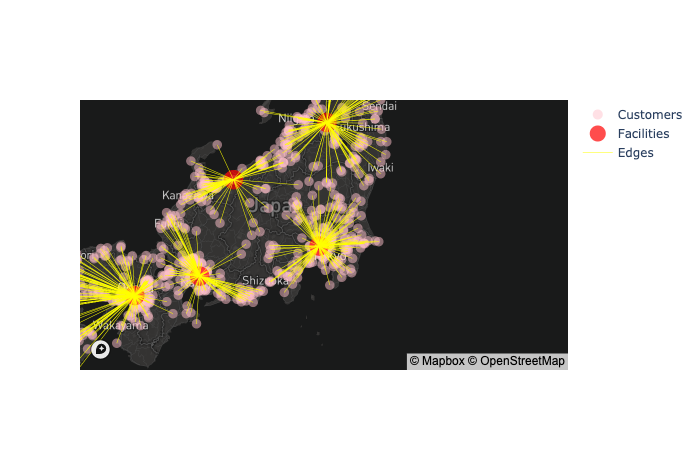

In [ ]:
#| echo: false
#fig = show_optimized_continuous_network(cust_df, X, Y, partition, weight=weight)
#plotly.offline.plot(fig);
Image("../figure/weiszfeld.png")

### 年間（計画期間）の総需要を計算する関数 make_total_demand

引数：

- demand_df: 需要データフレーム
- start: 計画期間の開始日
- finish: 計画期間の終了日
- num_of_days： 推定したい総需要の日数（既定値は365；すなわち年間需要量の推定）

返値：

- 総需要を入れたデータフレーム


In [ ]:
#| export
def make_total_demand(demand_df, start="1900/01/01", finish="2050/12/31", num_of_days=365):
    """
    年間（計画期間）の総需要を計算する関数
    """
    try:
        demand_df.reset_index(inplace=True)
    except:
        pass
    demand_df.loc[:,"date"] = pd.to_datetime(demand_df["date"])
    demand_df.set_index("date", inplace=True)
    new_demand_df = demand_df[ (demand_df.index >= pd.to_datetime(start)) & (demand_df.index <= pd.to_datetime(finish)) ]

    periods = max( (new_demand_df.index.max() - new_demand_df.index.min()).days, 1) #計画期間

    total_demand_df=pd.pivot_table(
            new_demand_df, index = ["prod","cust"], values = "demand", aggfunc = "sum")*num_of_days/periods
    total_demand_df.reset_index(inplace=True)
    
    #顧客ごとの集約需要
    demand_cust_df = pd.pivot_table(total_demand_df, index="cust", values="demand", aggfunc=sum)
    #製品ごとの集約需要
    demand_prod_df = pd.pivot_table(total_demand_df, index="prod", values="demand", aggfunc=sum)
    # TODO 売上や需要換算
    
    return total_demand_df, demand_cust_df, demand_prod_df 

In [ ]:
demand_df = pd.read_csv(folder + "demand.csv")
total_demand_df, demand_cust_df, demand_prod_df  = make_total_demand(demand_df, start="2019/01/01", finish="2050/12/31", num_of_days=365)
weight = demand_cust_df.demand.values
#total_demand_df = make_total_demand(demand_df)
total_demand_df.head()

,prod,cust,demand
0,A,さいたま市,3650.000000
1,A,京都市,28635.909091
2,A,仙台市,2123.636364
3,A,佐賀市,136908.181818
4,A,前橋市,5906.363636


In [ ]:
#| include: false
#total_demand_df.to_csv(folder+"total_demand.csv")

In [ ]:
#| include: false
#demand_prod_df.head()

### 顧客の集約

顧客の集約はロジスティクス・ネットワーク設計モジュールのrepeated_weiszfeldでできる．scikit-learnにも幾つのかのクラスタリング法が実装されているが，顧客の重み（需要量）を考慮したものとしてKmeans法とその変形があげられる．

これらの手法を用いて適切な顧客の集約を行うことを考える．


In [ ]:
#| include: false
#ランダムで大規模な顧客需要の生成
# cust_df = generate_cust(num_locations = 1000, random_seed = 1, prefecture = None )
# prod_df = generate_prod(10, weight_bound=(1, 5), cust_value_bound =(5,10), fc_bound=(10,20))
# weekly_ratio = [0.0, 1.0, 1.2, 1.3, 0.9, 1.5, 0.2]  # 0 means Sunday
# yearly_ratio = [1.0 + np.sin(i)*0.5 for i in range(13)]  # 0 means January
# demand_df = generate_demand(cust_df, prod_df, cust_shape=1.3, prod_shape=1.6, weekly_ratio=weekly_ratio, yearly_ratio=yearly_ratio,
#                             start="2019/01/01", periods=365, epsilon=1.)
# total_demand_df, demand_cust_df, demand_prod_df  = make_total_demand(demand_df, start="2019/01/01", finish="2050/12/31", num_of_days=365)
# weight = demand_cust_df.demand.values

### kmeans法を実行する関数 kmeans

kmeasn法は顧客の重み付き2乗距離の和を最小化する． 本来の重み付き距離の総和ではないが，高速なので大規模問題例に簡易的に使うことができる．

引数：
- cust_df : 顧客データフレーム；緯度経度情報を利用する。
- weight : 顧客の重み；重み付きの大圏距離の和を最小化するものとする。
- num_of_facilities : 平面上に配置する施設の数を指定する。

返値：
- X : 施設の緯度のリスト
- Y : 施設の経度のリスト
- partition : 顧客の割り当てられた施設の番号を格納したリスト
- cost: 費用（重み付きの距離の総和）

In [ ]:
#| export
def kmeans(cust_df, weight, num_of_facilities = 1, batch=True):
    if batch:
        model = MiniBatchKMeans(n_clusters=num_of_facilities)
    else:
        model = KMeans(n_clusters=num_of_facilities)
    model.fit(cust_df[["lat","lon"]], weight)
    partition = model.labels_
    
    cluster ={i:[] for i in range(num_of_facilities)}
    for i, row in enumerate(cust_df.itertuples()):
        cluster[ model.labels_[i] ].append(i)

    # find center of each cluster
    X, Y = [], [] 
    for i in range(num_of_facilities):
        if len(cluster[i])==0:
            continue
        lat_sum, lon_sum = 0., 0.
        total_weight = 0.
        for j in cluster[i]:
            lat_sum += cust_df.lat[j]*weight[j]
            lon_sum += cust_df.lon[j]*weight[j]
            total_weight +=weight[j]
        X.append( lat_sum/total_weight )
        Y.append( lon_sum/total_weight )
        
    cost = 0.
    x, y = cust_df.lat.values, cust_df.lon.values
    for j in range(len(X)):
        for i in cluster[j]:
            d = distance( (x[i],y[i]), (X[j],Y[j]) ).km
            cost += d*weight[i]    
    return X, Y, partition, cost

### kmeans関数の使用例

repeated_weiszfeldより悪いが，高速である．

In [ ]:
#| include: false
#%%time
#cust_df = pd.read_csv("../data/melos/melos-gf.csv", index_col=0)
#cust_df.reset_index(inplace=True)
#weight = cust_df.weight
#X, Y, partition, cost = kmeans(cust_df, weight, num_of_facilities = 8)
#print(cost)
#cust_df = cust_df[["name","lat","lon","weight"]] 
#cust_df.to_csv("../data/melos/melos-gf.csv")

In [ ]:
%%time
X, Y, partition, cost = repeated_weiszfeld(cust_df, weight, num_of_facilities = 8, epsilon=0.0001, max_iter = 3, numpy=True, seed=1)
print(cost)

490929454.9189146
CPU times: user 973 ms, sys: 1.3 ms, total: 974 ms
Wall time: 973 ms


### 階層的クラスタリング関数 hierarchical_clusterning

In [ ]:
#| export
def hierarchical_clusterning(cust_df, weight, durations, num_of_facilities = 2, linkage= "average"):
    """
    階層的クラスタリング関数 hierarchical_clusterning
    """
    try:
        cust_df.reset_index(inplace=True)
    except:
        pass
    clustering = AgglomerativeClustering(n_clusters=num_of_facilities, affinity="precomputed",linkage=linkage).fit(durations)
    partition = clustering.labels_

    cluster ={i:[] for i in range(num_of_facilities)}
    for i, row in enumerate(cust_df.itertuples()):
        cluster[ clustering.labels_[i] ].append(i)

    # find center of each cluster
    X, Y = [], [] 
    #median ={}
    total_cost = 0
    for i in range(num_of_facilities):
        if len(cluster[i])==0:
            continue
        min_cost = 99999999999999
        min_j = -1
        for j in cluster[i]:
            cost = 0
            for j2 in cluster[i]:
                if j==j2:
                    continue
                cost += durations[j][j2]*weight[j2]
            if cost < min_cost:
                min_cost = cost
                min_j = j
        total_cost += cost
        #median[i] = min_j
        X.append( cust_df.lat[min_j] )
        Y.append( cust_df.lon[min_j] )
    return X, Y, partition, total_cost

In [ ]:
# durations,  distances, node_df  = compute_durations(cust_df, host=host)
# X, Y, partition, cost = hierarchical_clusterning(cust_df, weight, durations, num_of_facilities = 10, linkage="complete")
# print(cost)

### k-メディアン問題に対するLagrange緩和法

$k$-メディアン問題は，以下のように定義される問題であり，クラスタリングに有効である．

$n$ 個の点（顧客とよぶ）から $k (<n)$ 個の点（施設とよぶ）を選択することを考える．
選択された点を開設された施設と考え，各顧客は最も近い点に行ってサービスを受けるものとする．
顧客 $i$ は需要量 $w_i$ もち，地点 $i,j$ 間の移動費用を $c_{ij}$ とする．
このとき，需要量と移動費用を乗じた量の合計を最小にするように，施設を開設する問題が $k$-メディアン問題である．

この問題は，以下のように数理最適化問題として定式化できる．

パラメータ：
- $n$: 点の数
- $k$: 開設する施設の数
- $c_{ij}$ : 地点 $ij$ 間の1単位需要量あたりの移動費用
- $w_{i}$ : 地点 $i$ の需要量

変数：

- $x_{ij}$ : 地点 $i$ の顧客が施設 $j$ でサービスを受けるとき $1$， それ以外のとき $0$ を表す$0$-$1$変数
- $y_{j}$: 施設 $j$ を開設するとき $1$， それ以外のとき $0$ を表す$0$-$1$変数

定式化：

$$
\begin{array}{lll}
 minimize & \sum_{ i,j } w_i c_{ij} x_{ij}  &  \\
s.t. &  \sum_{j}  x_{ij} = 1                &   \forall i    \\
     &    x_{ij}  \leq y_j                  &  \forall i,j  \\
     &   \sum_{j} y_j  = k                  & 
\end{array}
$$

最初の制約式に対する Lagrange乗数を $u_i$ とする．  $\bar{c}_{ij} = w_i c_{ij} - u_i$ と定義すると， Lagrange緩和問題は以下のようになる．

$$
\begin{array}{lll}
L(u)=  minimize & \sum_{ i,j }  \bar{c}_{ij} x_{ij} +\sum_{i} u_i  &  \\
s.t. &    x_{ij}  \leq y_j                  &  \forall i,j  \\
     &   \sum_{j} y_j  = k                  & 
\end{array}
$$

任意のベクトル $u$ に対して， $L(u)$ は原問題の下界を与える． 
Lagrange緩和問題の最適解 $(x^*,y^*)$ は，以下の方法で求めることができる．

$w_i \bar{c}_{ij} <0$ なら，顧客 $i$ は施設 $j$ に行くことを希望するだろう（だって，行くと儲かるから）．
施設 $j$ に来ることを希望する顧客から得られる総利益は， $\sum_{i} [w_i \bar{c}_{ij}]^-$ と計算できる（ここで $[x]^-$ は $\max (-x,0)$ を表す）．
この値の大きい順に $k$ 個の施設を選択することによって，開設すべき施設を表すベクトル $y^*$ を求めることができる．
開設している施設 $j$ に対して $w_i \bar{c}_{ij}$ が負になっている顧客 $i$ はサービスを受けるので，$x_{ij}^* =1$ とする．

施設 $j$ が容量 $M_j$ の上限をもつ容量制約付きの場合を考える．
この場合のLagrange緩和問題は，施設 $j$ ごとに以下の$0$-$1$ナップサック問題を解き，その最適値 $z_j$ が正で大きいものから $k$ 個の施設を選択すれば最適解を得ることができる．

$$
\begin{array}{llll}
 z_j = & maximize & \sum_{i} [\bar{c}_{ij}]^- x_{ij} &    \\
       & s.t.     &  \sum_{i} w_i x_{ij} \leq M_j        & \forall  j 
\end{array}
$$

また，実務では制約における $w_{ij}$ が $1$ であることが多い．その際には，ナップサック問題の最適解は， $[w_i \bar{c}_{ij}]^-$ の大きい順に $M_j$ 個選択することによって得ることができる．

さらには，各施設に割り当てられる顧客数は均等であることが望ましい．これは，1施設あたりの顧客数の平均値 $n/k$ になるべく近くなるというペナルティを付加する．

$$
\sum_{j} \left(\sum_{i} x_{ij}  - n/k \right)^2      
$$


Lagrange緩和法では，下界を最大にする $u$ を求める． $u_i$ に対する劣勾配 $g_i$ は， $1- \sum_{j} x_{ij}^*$ であり，以下の反復法で最適化を行う．

$$
 u_i := u_i + s \cdot g_i   \ \ \ \forall i
$$

ここで $s$ はステップサイズを表すパラメータであり，以下のように決める．

最良の上界 $ub$ とLanrange緩和による下界 $lb$ と，劣勾配のノルム $||g_i||$ を用いて，以下のパラメータ $\alpha$ を導入する．
$$
\alpha = (1.05 \cdot ub-lb)/norm 
$$

これにさらに反復 $t$ ごとに変化するパラメータ $\phi_t$ を乗じて，ステップサイズ $s$ とする．


深層学習に対して有効性が確認されているfit-one-cycle法を応用する．

劣勾配法は不安定なので，慣性項 $m_t$ （初期値は$0$ベクトル）を考慮するためのパラメータ $\beta_t$ を導入し，以下のように移動平均をとることで，スムーズな勾配 $m_t$ にする．

$$
m_t := \beta_t \cdot m_t + (1-\beta_t) \cdot g_t
$$

反復 $t$ におけるLagrange乗数ベクトル $u$ の更新は， Adamを用いる．

$\phi_t$ は， 最大学習率 max_lr と最小学習率 min_lr を用いて決める． 最大学習率は，予備的な実験である lr_finderを用いて決める．
lr_finderでは，学習率（$\phi_t$に相当する）を非常に小さい値から始め， 反復ごとに2倍していく． 各反復に対する下界値をプロットしたときの，最大の山への入り口あたりが，最大学習率の推奨値となる．
最小学習率は，最大学習率の$1/25$倍あたりが推奨される．

慣性項のためのパラメータ$\beta$ はその最小値と最大値を与える．通常は， $(0.85, 0.95)$ が良いとされている．

fit-one-cycle法では，学習率を制御するパラメータ $\phi$ は徐々に大きくしていき，反復回数が半分に達したら，徐々に小さくしていく．
一方，慣性項のためのパラメータ$\beta$は徐々に小さくしていき，反復回数が半分に達したら，徐々に小さくしていく．
ここでは，前半は最小値から最大値（最大値から最小値）まで直線的に変化させ，後半はcos関数を$0$から$\pi$まで変化させた曲線にしたがうようにパラメータを変化させる．
ただし，学習率を制御するパラメータ $\phi$ に対しては最小値を $0$ とする．

以下に図示する．

In [ ]:
#| include: false
%matplotlib inline
import matplotlib.pyplot as plt
max_iter = 5000
lrs = (0.001, 0.02)
moms = (0.85, 0.95)
lr_sche =  np.concatenate( [np.linspace(lrs[0],lrs[1],max_iter), lrs[1]/2 + (lrs[1]/2)*np.cos(np.linspace(0,np.pi,max_iter) )])  #cosine annealing
mom_sche = np.concatenate( [np.linspace(moms[1],moms[0],max_iter), moms[1]-(moms[1]-moms[0])/2 -(moms[1]-moms[0])/2*np.cos(np.linspace(0,np.pi,max_iter))] )

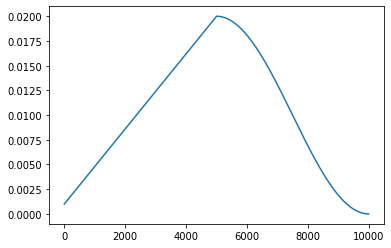

In [ ]:
#| include: false
plt.plot(lr_sche);

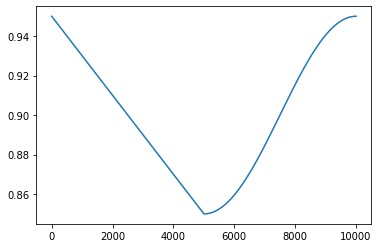

In [ ]:
#| include: false
plt.plot(mom_sche);

In [ ]:
#| include: false
#実験用データ生成
# cust_df = generate_cust(num_locations = 1000, random_seed = 2, prefecture =  None , no_island=True)
# weight=np.random.randint(1,10,len(cust_df))
# durations, distances, node_df  = compute_durations(cust_df, host=host)

### k-メディアン問題の混合整数最適化による求解

In [ ]:
#| include: false
# np.random.seed(123)
# cost = durations 
# m = 10
# n = len(cost)
# #u = np.zeros(n) #Lagrange multiplier
# u = 300000.*np.random.random(n)
# w = np.array(weight)
# c = np.array(cost)
# C = c*w.reshape((n,1))
# capacity = 2

# Cbar = C - u.reshape((n,1))   #被約費用の計算
# I, J = np.where( Cbar < 0 ) #負の被約費用をもつインデックスだけを抽出
# xstar = np.zeros(n)
# ystar = np.zeros(n)
# # 0-1 knapsackを解く（容量制約のとき）
# # 係数 1の場合には，M（容量）個を選択
# # ystar = np.zeros(n)
# # idx = np.argsort(Cbar)
# # for i in range(n):
# #     for j in idx[i][:capacity]: #被約費用の小さい方からcapacity個選択
# #         if Cbar[i,j]>=0.: #被約費用が非負の場合は終了
# #             break
# #         ystar[i] += Cbar[i,j]
# np.sort(np.where(Cbar>0,0.,Cbar), axis=1)[:,:capacity].sum(axis=1)

# # for i,j in zip(I,J): #負の被約費用を施設ごとに集計
# #     ystar[j] += Cbar[i,j] 
# idx = np.argsort(ystar) #小さい順にソート
# open_node = set(idx[:m])#小さい順にm個選択（同じ位置にあるものを選んでいる！）
# for i,j in zip(I,J): #各顧客は，被約費用が負の空いている施設へ接続
#     if j in open_node: 
#         xstar[i] += 1
# ystar

array([-405823.63990039, -148813.48152413, -133046.21380968,
       -315221.09661642, -414062.57372266, -247083.74037376,
       -431186.32530099, -372585.66453982, -280860.38265098,
       -232513.18142787])

In [ ]:
#| include: false
# idx = np.argsort(Cbar)
# Csort = np.sort(Cbar)
# I, J = np.where( Csort[:,:capacity] < 0 ) 
# ystar = np.zeros(n)
# for i,j in zip(I,J): #負の被約費用を施設ごとに集計
#     ystar[idx[i,j]] += Csort[i,j] 
# ystar

array([-0.665932  , -0.31714806, -0.21533258, -0.59555895, -0.94932268,
       -0.74714846, -0.55320009, -0.88816874, -0.53667895, -0.78706272])

In [ ]:
#| include: false
# """kmedian -- minimize total cost of servicing 
# customers from k facilities
# Parameters:
#     - I: set of customers
#     - J: set of potential facilities
#     - c[i,j]: cost of servicing customer i from facility j
#     - k: number of facilities to be used
# Returns a model, ready to be solved.
# """
# I = J = list(cust_df.index)
# c = {}
# for i in I:
#     for j in J:
#         c[i,j] = durations[i][j]
# n = len(cust_df)
# k = 10
# #penalty = 10.
# ave = n/k #平均顧客数
# M = int(n/k*1.2) #容量制約
# #theta = np.max(durations)/1 #移動時間の閾値;
# #単なる距離上限ではうまく動かない
# C = np.array(durations)
# idx = np.argsort(C)
# theta = k*int(ave)+1
# #print(theta,idx)

# model = Model("k-median")
# x,y = {},{}
# #z = {}

# #TotalDev = model.addVar(name="Z")
# for j in J:
#     y[j] = model.addVar(vtype="B", name="y(%s)"%j, ub = 1.)
#     #z[j] = model.addVar(vtype="C", name="z(%s)"%j, lb = -999999999.)

# for j in I:
#     for i in idx[j,:theta]:        
#         #if c[i,j]<=theta:
#         x[i,j] = model.addVar(vtype="B", name="x(%s,%s)"%(i,j))    

# for iter in range(1):
#     print("# of vars=", len(x))
#     model.update()
#     assign, strong, capacity = {},{},{}
#     for i in I:
#         assign[i] = model.addConstr(quicksum(x[i,j] for j in J if (i,j) in x) == 1, "Assign(%s)"%i)
#     for (i,j) in x:
#         strong[i,j] = model.addConstr(x[i,j] <= y[j], "Strong(%s,%s)"%(i,j))
#     #容量制約        
#     for j in J:
#         capacity[j] = model.addConstr(quicksum(x[i,j] for i in I if (i,j) in x) <= M*y[j], f"Capacity{j}" )
#     #for j in J:
#     #    capacity[j] = model.addConstr(quicksum(x[i,j] for i in I if (i,j) in x)-ave==z[j], f"Capacity{j}" )
#     #平均からの逸脱の合計
#     #model.addConstr( quicksum(z[j]**2 for j in J)==TotalDev )

#     facility = model.addConstr(quicksum(y[j] for j in J) == k, "Facilities")

#     #model.setObjective(penalty*quicksum(z[j]**2 for j in J) + quicksum(weight[i]*c[i,j]*x[i,j] for (i,j) in x),
#     #                   GRB.MINIMIZE)
    
#     model.setObjective(quicksum(weight[i]*c[i,j]*x[i,j] for (i,j) in x),
#                        GRB.MINIMIZE)
    
#     #model.update()
#     #relax = model.relax()
#     #relax.Params.Method = 1
#     #relax.optimize()
#     model.optimize()

# #     for i in I:
# #         for j in J:
# #             if (i,j) in x:
# #                 pass
# #             else:
# #                 rc = weight[i]*c[i,j]- assign[i].Pi
# #                 if rc< 0.:
# #                     x[i,j] = model.addVar(vtype="C", name="x(%s,%s)"%(i,j))
                    
# # for j in J:
# #     if y[j].X >=0.98:
# #         y[j].LB = 1.0
    
# # for j in J:
# #     y[j].VType ="B"
# # for (i,j) in x:
# #     x[i,j].VType="B"
# model.optimize()
# # print(model.ObjVal,sum(z[j].X**2 for j in J))
# for j in J:
#     if y[j].X > 0.001:
#         print(j, sum(x[i,j].X for i in I if (i,j) in x))

In [ ]:
#| include: false
# EPS = 1.e-6
# edges = [(i,j) for (i,j) in x if x[i,j].X > EPS]
# facilities = [j for j in y if y[j].X > EPS]
# print ("Optimal value=",model.ObjVal)
# print ("Selected facilities:",facilities)
# position = {}
# for i, row in enumerate(cust_df.itertuples()):
#     position[i] = (row.lon,row.lat)
    
# G = nx.Graph()
# facilities = set(facilities)
# unused = set(j for j in J if j not in facilities)
# client = set(i for i in I if i not in facilities and i not in unused)
# G.add_nodes_from(facilities)
# G.add_nodes_from(client)
# G.add_nodes_from(unused)
# for (i,j) in edges:
#     G.add_edge(i,j)

# nx.draw(G,position,with_labels=False,node_color="b",
#         nodelist=facilities)
# nx.draw(G,position,with_labels=False,node_color="c",
#         nodelist=unused,node_size=50)
# nx.draw(G,position,with_labels=False,node_color="g",
#         nodelist=client,node_size=50)

### 需要量が１の輸送問題を解く関数 transporation

引数
- C: 費用行列 ($n \times m$)
- capacity: 工場の容量（一定を仮定）


返値
- cost: 費用
- flow: フローを表す辞書


In [ ]:
def transportation(C, capacity):
    M = capacity
    n,m = C.shape
    C = np.ceil(C) # for network simplex 
    G =nx.DiGraph()
    sum_ = 0
    for j in range(m):
        sum_ -= M
        G.add_node(f"plant{j}", demand=-M)
    for i in range(n):
        sum_ += 1 
        G.add_node(i, demand= 1)
    #add dummy customer with demand sum_
    G.add_node("dummy", demand= -sum_)
    for i in range(n):
        for j in range(m):
            G.add_edge(f"plant{j}", i, weight=C[i,j])
    for j in range(m):
        G.add_edge(f"plant{j}", "dummy", weight = 0)
    cost, flow = nx.flow.network_simplex(G)

    return cost, flow

#### transportationの使用例

In [ ]:
c = {(1,1):4.5,    (1,2):6,    (1,3):9,
     (2,1):5,    (2,2):4,    (2,3):7, 
     (3,1):6,    (3,2):3,    (3,3):4,
     (4,1):8,    (4,2):5,    (4,3):3,
     (5,1):10,   (5,2):8,    (5,3):4,
     }
n = 5
m = 3
C = np.zeros( (n,m) )
for (i,j) in c:
    C[i-1,j-1] = c[i,j]
cost, flow = transportation(C, capacity=3)

### クラスターの中心をもとめることによる上界の改善

In [ ]:
def find_median(C, flow, n, m):
    total_cost = 0
    for j,f in enumerate(flow):
        if j>=m:
            break
        cluster =[]
        for i in range(n):
            if flow[f][i]==1:
                cluster.append(i)
        if len(cluster)>1:
            #find the best location for the cluster
            nodes = np.array(cluster)
            subC = C[np.ix_(nodes,nodes)]
            best_location = nodes[subC.sum(axis=0).argmin()]
            cost = subC.sum(axis=0).min()
            total_cost+=cost
    return total_cost

In [ ]:
#| include: false
#実験用データ生成
# cust_df = generate_cust(num_locations = 10, random_seed = 2, prefecture =  None , no_island=True)
# weight=np.random.randint(1,10,len(cust_df))
# durations, distances, node_df  = compute_durations(cust_df, host=host)

In [ ]:
# c = np.array(durations)
# C = c*weight.reshape((n,1))
# n = len(C)
# k = 10
# m = k
# M = int(len(cust_df)/k*1.2) #容量制約

# idx = np.array([0,1,2])
# idx = np.array([ 0,72,71,70,69,68,67,66,65,64])

# cost, flow = transportation(C[:,idx], capacity=M)
# find_median(C, flow, n, m)

3794705.000033724

### k-メディアン問題を解くための関数 solve_k_median

引数：
- cust_df : 顧客データフレーム；緯度経度情報を利用する。
- weight : 顧客の需要量
- cost: 移動費用（地図で求めたdurationsを入力する．）
- num_of_facilities : 平面上に配置する施設の数を指定する。
- max_iter =100: 最大反復数
- max_lr =0.01: 最大学習率（ステップサイズ）
- moms=(0.85,0.95): 慣性項の下限と上限
- convergence=1e-5: 収束判定のためのパラメータ
- lr_find = False: 学習率探索を行う場合 True
- adam = False: Adam法によるパラメータの調整を行う場合 True，上界と下界の差をもとに決める場合 False
 
返値：
- X : 施設の緯度のリスト
- Y : 施設の経度のリスト
- partition : 顧客の割り当てられた施設の番号を格納したリスト
- best_ub: 費み付きの費用の総和
- lb_list: 下界値の変化を入れたリスト
- ub_list: 上界値の変化を入れたリスト
- phi_list: 学習率探索の場合の学習率の変化を入れたリスト

In [ ]:
#| export
def solve_k_median(cust_df, weight, cost, num_of_facilities, max_iter=100, max_lr=0.01, moms=(0.85,0.95), 
                   convergence=1e-5, lr_find = False, adam = False, capacity = None):
    """
    k-メディアン問題を解くための関数 solve_k_median
    """
    m = num_of_facilities 
    half_iter = max_iter//2
    lrs = (max_lr/25., max_lr)
    lr_sche =  np.concatenate( [np.linspace(lrs[0],lrs[1],half_iter), lrs[1]/2 + (lrs[1]/2)*np.cos(np.linspace(0,np.pi,half_iter) )])  #cosine annealing
    mom_sche = np.concatenate( [np.linspace(moms[1],moms[0],half_iter), moms[1]-(moms[1]-moms[0])/2 -(moms[1]-moms[0])/2*np.cos(np.linspace(0,np.pi,half_iter))] )

    if lr_find:
        phi = 1e-10   #ステップサイズを決めるためのパラメータ
        report_iter = 1
    else:
        report_iter = 100

    n = len(cost)
    u = np.zeros(n) #Lagrange multiplier
    w = np.array(weight)
    c = np.array(cost)
    C = c*w.reshape((n,1))
    
    m_t = np.zeros(n)
    best_ub = np.inf 
    best_open = {}
    
    #Adam
    if adam:
        beta_2 = 0.999
        epsilon = 1e-8
        m_t = np.zeros(n)
        v_t = np.zeros(n)

    lb_list, ub_list, phi_list = [], [], []
    for t in range(max_iter):
        Cbar = C - u.reshape((n,1))   #被約費用の計算
        xstar = np.zeros(n)
        ystar = np.zeros(n)
        # 0-1 knapsackを解く（容量制約のとき）
        # 係数 1の場合には，M（容量）個を選択
        # I, J = np.where( Cbar < 0 ) #負の被約費用をもつインデックスだけを抽出
        if capacity is not None: #容量制約を考慮（施設に割り当て可能な顧客数がcapacity以下）
            ystar = np.sort(np.where(Cbar>0,0.,Cbar), axis=1)[:,:capacity].sum(axis=1)
#             idx = np.argsort(Cbar)
#             for i in range(n):
#                 for j in idx[i][:capacity]: #被約費用の小さい方からcapacity個選択
#                     if Cbar[i,j]>=0.: #被約費用が非負の場合は終了
#                         break
#                     ystar[i] += Cbar[i,j]
        else:    
#             for i,j in zip(I,J): #負の被約費用を施設ごとに集計
#                 ystar[j] += Cbar[i,j] 
            ystar = np.where(Cbar<0, Cbar, 0.).sum(axis=0)
            
        idx = np.argsort(ystar) #小さい順にソート
        open_node = set(idx[:m])#小さい順にm個選択（同じ位置にあるものを選んでいる！）
        
        #下界の計算
#         lb =u.sum()     
#         for j in open_node:
#             lb +=ystar[j]
        lb = u.sum() + ystar[idx[:m]].sum()
        lb_list.append(lb)

#         for i,j in zip(I,J): #各顧客は，被約費用が負の空いている施設へ接続
#             if j in open_node: 
#                 xstar[i] += 1
        xstar = np.where(Cbar<0,1,0)[:,idx[:m]].sum(axis=1)

        #上界の計算  （容量制約がある場合は，（一般化）割当問題を解く必要がある！）
        if capacity is not None:
            if t%report_iter ==0:
                cost, flow = transportation(C[:,idx[:m]],capacity)
                cost2 = find_median(C, flow, n, m)
                ub = min(cost,cost2)
        else:
            ub = C[:,np.array(list(open_node))].min(axis=1).sum()
        
        if ub<best_ub:
            best_ub = ub
            best_open = open_node.copy()
        ub_list.append(best_ub)

        g_t = 1.-xstar #劣勾配の計算
        norm = np.dot(g_t, g_t) #ノルムの計算
        
        if lb > convergence:
            gap = (best_ub-lb)/lb
            if gap <=convergence:
                print("gap=",gap,best_ub,lb)
                break
        else:
            gap = 10.
            
        if t%report_iter ==0:
            print( f"{t}: {gap:.3f}, {lb:.5f}, {best_ub:.5f}, {norm:.2f}" )
            
        if norm <= convergence and capacity is None: 
            print("norm is 0!")
            break    
            
        if lb < -1e5:
            if lr_find:
                break
                
        if lr_find:
            phi *= 2. 
            beta_1 = moms[1]
        else:
            #fit one cycle 
            phi = lr_sche[t]
            beta_1 = mom_sche[t] 
            
        phi_list.append(phi) # lr_find用
            
        # 移動平均の更新
        m_t = beta_1*m_t + (1-beta_1)*g_t
        
        if adam:
            # 勾配の二乗の移動平均の更新
            v_t = beta_2*v_t + (1-beta_2)*(g_t**2)
            m_cap = m_t/(1-beta_1**(t+1))
            v_cap = v_t/(1-beta_2**(t+1))
            u = u + (phi*m_cap)/(np.sqrt(v_cap)+epsilon)
        else:
            alpha = (1.05*best_ub-lb)/norm 
            u = u + phi*alpha*m_t  # 慣性項あり
        
    #解の構成
    X, Y =[], []
    for i in best_open:
        row = cust_df.iloc[i]
        X.append(row.lat)
        Y.append(row.lon)
    facility_index={}
    for idx, i in enumerate(best_open):
        facility_index[i] = idx 
    partition = np.zeros(n, int)
    ub = 0.
    for i in range(n):
        min_cost = np.inf
        for j in best_open:
            if c[i,j] < min_cost:
                min_cost =  c[i,j] 
                partition[i] = facility_index[j]
            
    return X, Y, partition, best_ub, lb_list, ub_list, phi_list

### solve_k_medianの使用例

In [ ]:
# cust_df = generate_cust(num_locations = 100, random_seed = 3, prefecture =  None , no_island=True)
# weight=np.random.random(len(cust_df))*10
# durations, distances, node_df  = compute_durations(cust_df, host=host)

In [ ]:
#| include: false
# k = 10
# M = int(len(cust_df)/k*1.2) #容量制約
# X, Y, partition, best_ub, lb_list, ub_list, phi_list = solve_k_median(cust_df, weight, durations, num_of_facilities=k, 
#                                  max_iter=10000, max_lr=200., moms=(0.85,0.95), convergence=1e-5, 
#                                                                       lr_find = False, adam=True, capacity = M)

In [ ]:
# %%time
# X, Y, partition, best_ub, lb_list, ub_list, phi_list = solve_k_median(cust_df, weight, durations, num_of_facilities=10, 
#                                  max_iter=10000, max_lr=20., moms=(0.85,0.95), convergence=1e-5,  lr_find = False, adam=True, capacity = None)

### k-メディアンの学習率探索の結果を可視化する関数 plot_k_median_lr_find

引数：
- phi_list: 学習率設定のパラメータ $\Phi$ の変化を入れたリスト
- lb_list: 下界の変化を入れたリスト

返値：
- Plotlyの図オブジェクト

In [ ]:
#| export
def plot_k_median_lr_find(phi_list, lb_list):
    """
    k-メディアンの学習率探索の結果を可視化する関数 plot_k_median_lr_find
    """
    fig = go.Figure()
    fig.add_trace(go.Scatter(
            x = phi_list, 
            y = lb_list,
            mode='markers+lines',
            name= "lb",
            marker=dict(
                size=10,
                color= "red")
    ))

    fig.update_xaxes(type="log")    
    fig.update_layout(title = "Stepsize finder",
                   xaxis_title='Phi (log scale)',
                   yaxis_title='Lower Bound')
    return fig

### plot_k_median_lr_find関数の使用例

In [ ]:
# fig = plot_k_median_lr_find(phi_list, lb_list)
# plotly.offline.plot(fig);

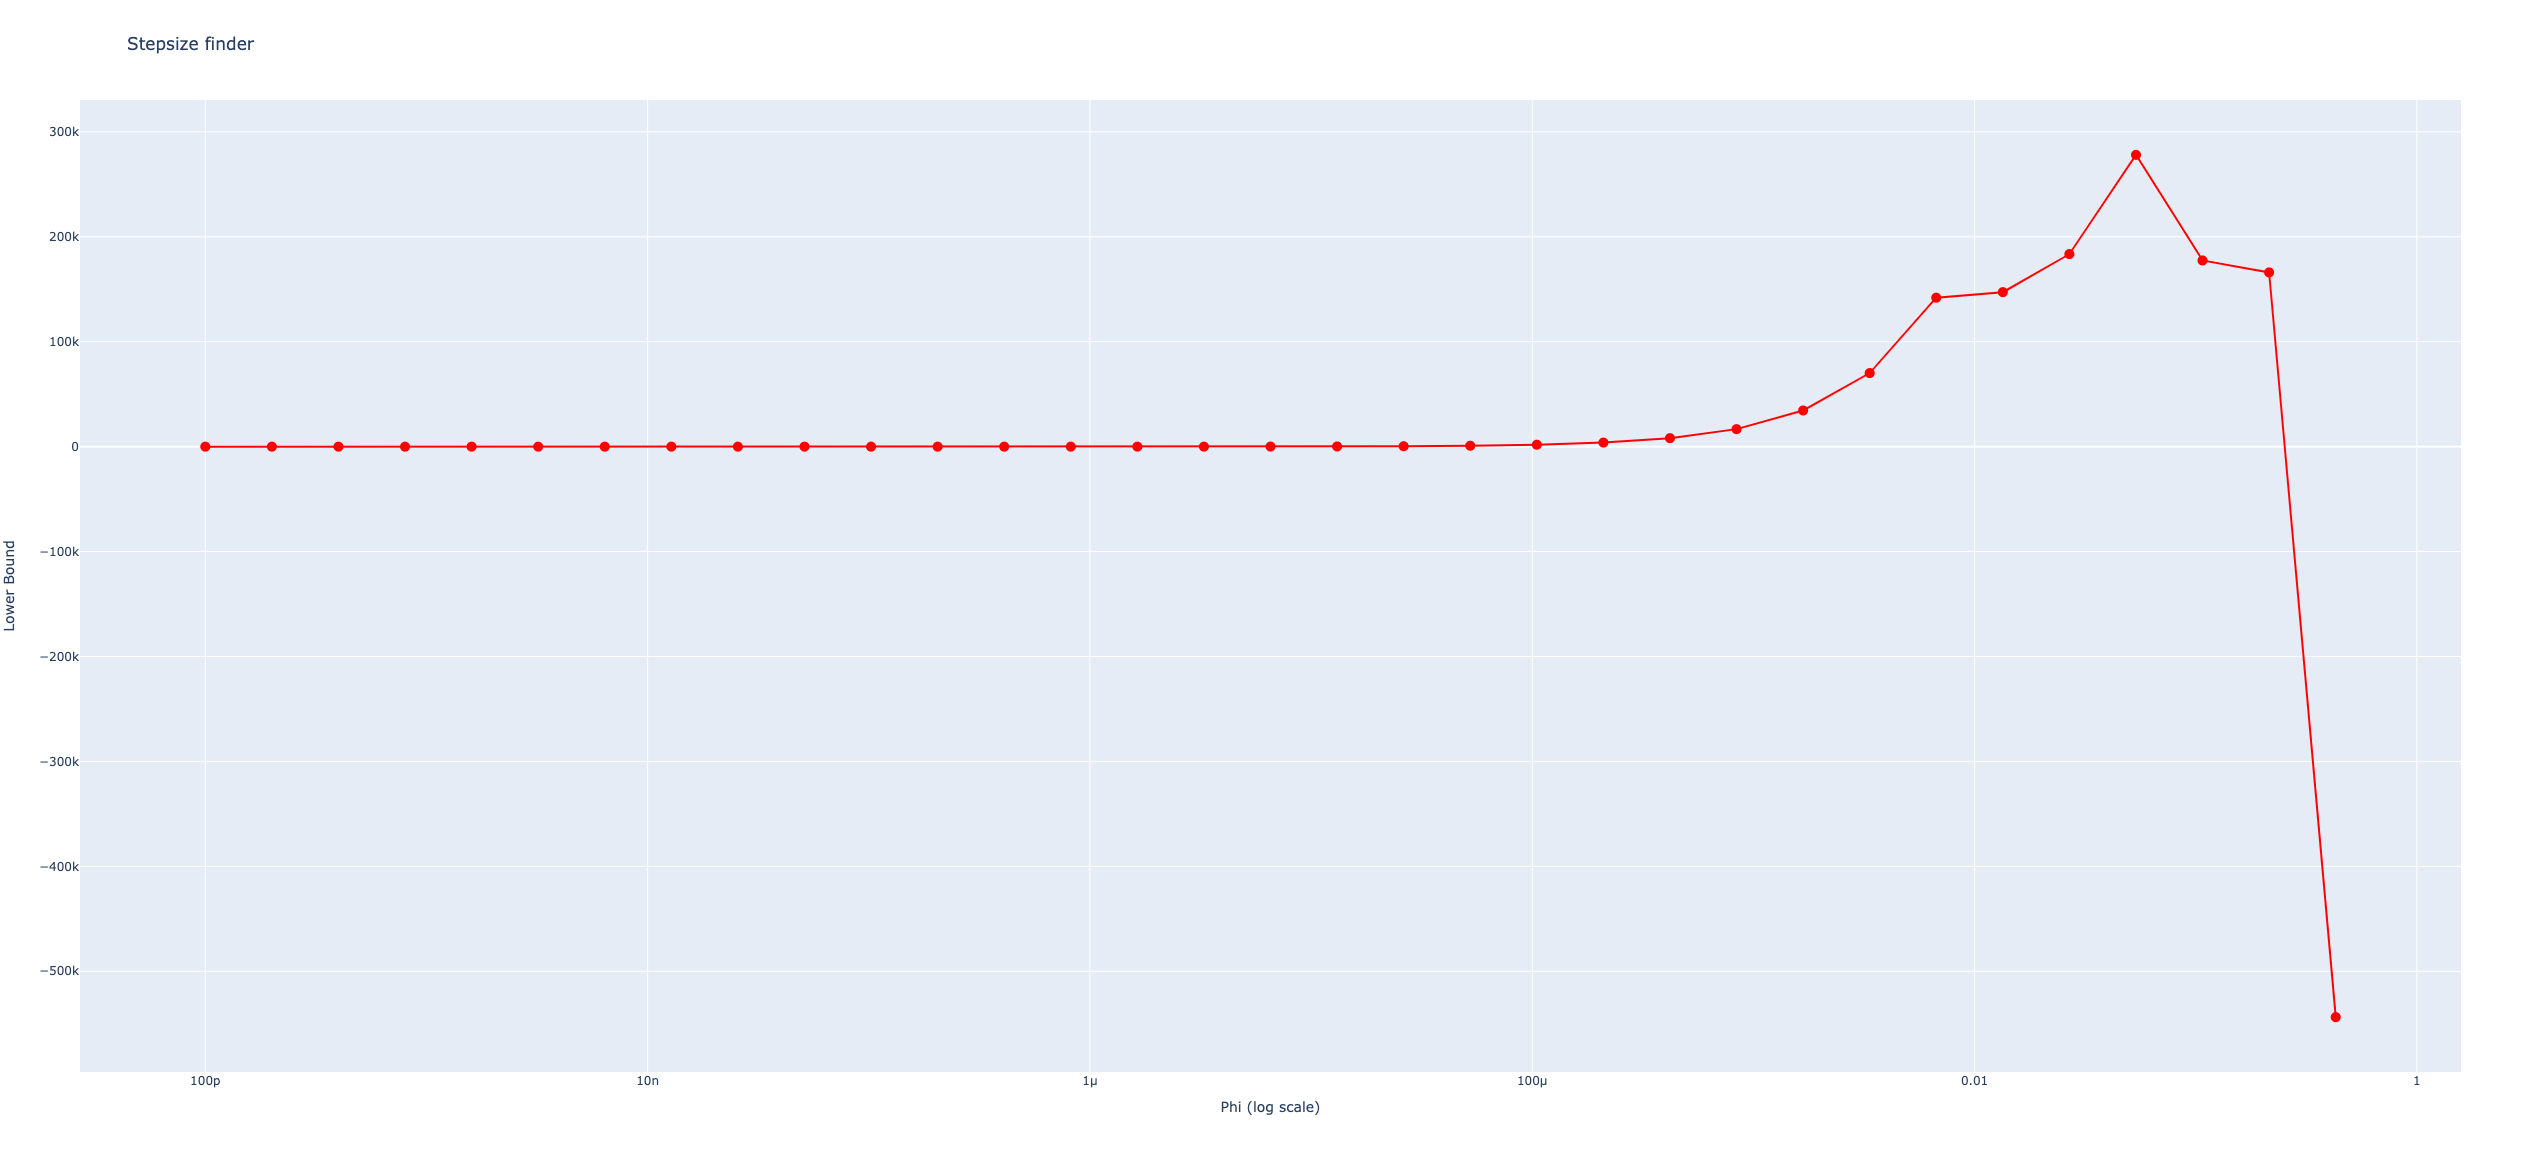

In [ ]:
#| echo: false
Image("../figure/kmedian-maxlr.png")

### k-メディアン最適化の探索を可視化する関数 plot_k_median

引数：
- lb_list: 下界の変化を入れたリスト
- ub_list: 上界の変化を入れたリスト

返値：
- fig: 下界と上界の変化を可視化した図オブジェクト

In [ ]:
#| export
def plot_k_median(lb_list, ub_list):
    #plot subgradient method
    fig = go.Figure()
    xx = np.arange(len(lb_list))
    fig.add_trace(go.Scatter(
            x = xx, 
            y = lb_list,
            mode='markers+lines',
            name= "lb",
            marker=dict(
                size=10,
                color= "red")
    ))
    fig.add_trace(go.Scatter(
            x = xx, 
            y = ub_list,
            mode='markers+lines',
            name= "ub",
            marker=dict(
                size=10,
                color= "blue")
    ))
    fig.update_layout(title = "k-median",
                   xaxis_title='Iteration',
                   yaxis_title='Lower Bound, Upper Bound')
    return fig 

### plot_k_median関数の使用例

In [ ]:
# fig = plot_k_median(lb_list, ub_list)
# plotly.offline.plot(fig);

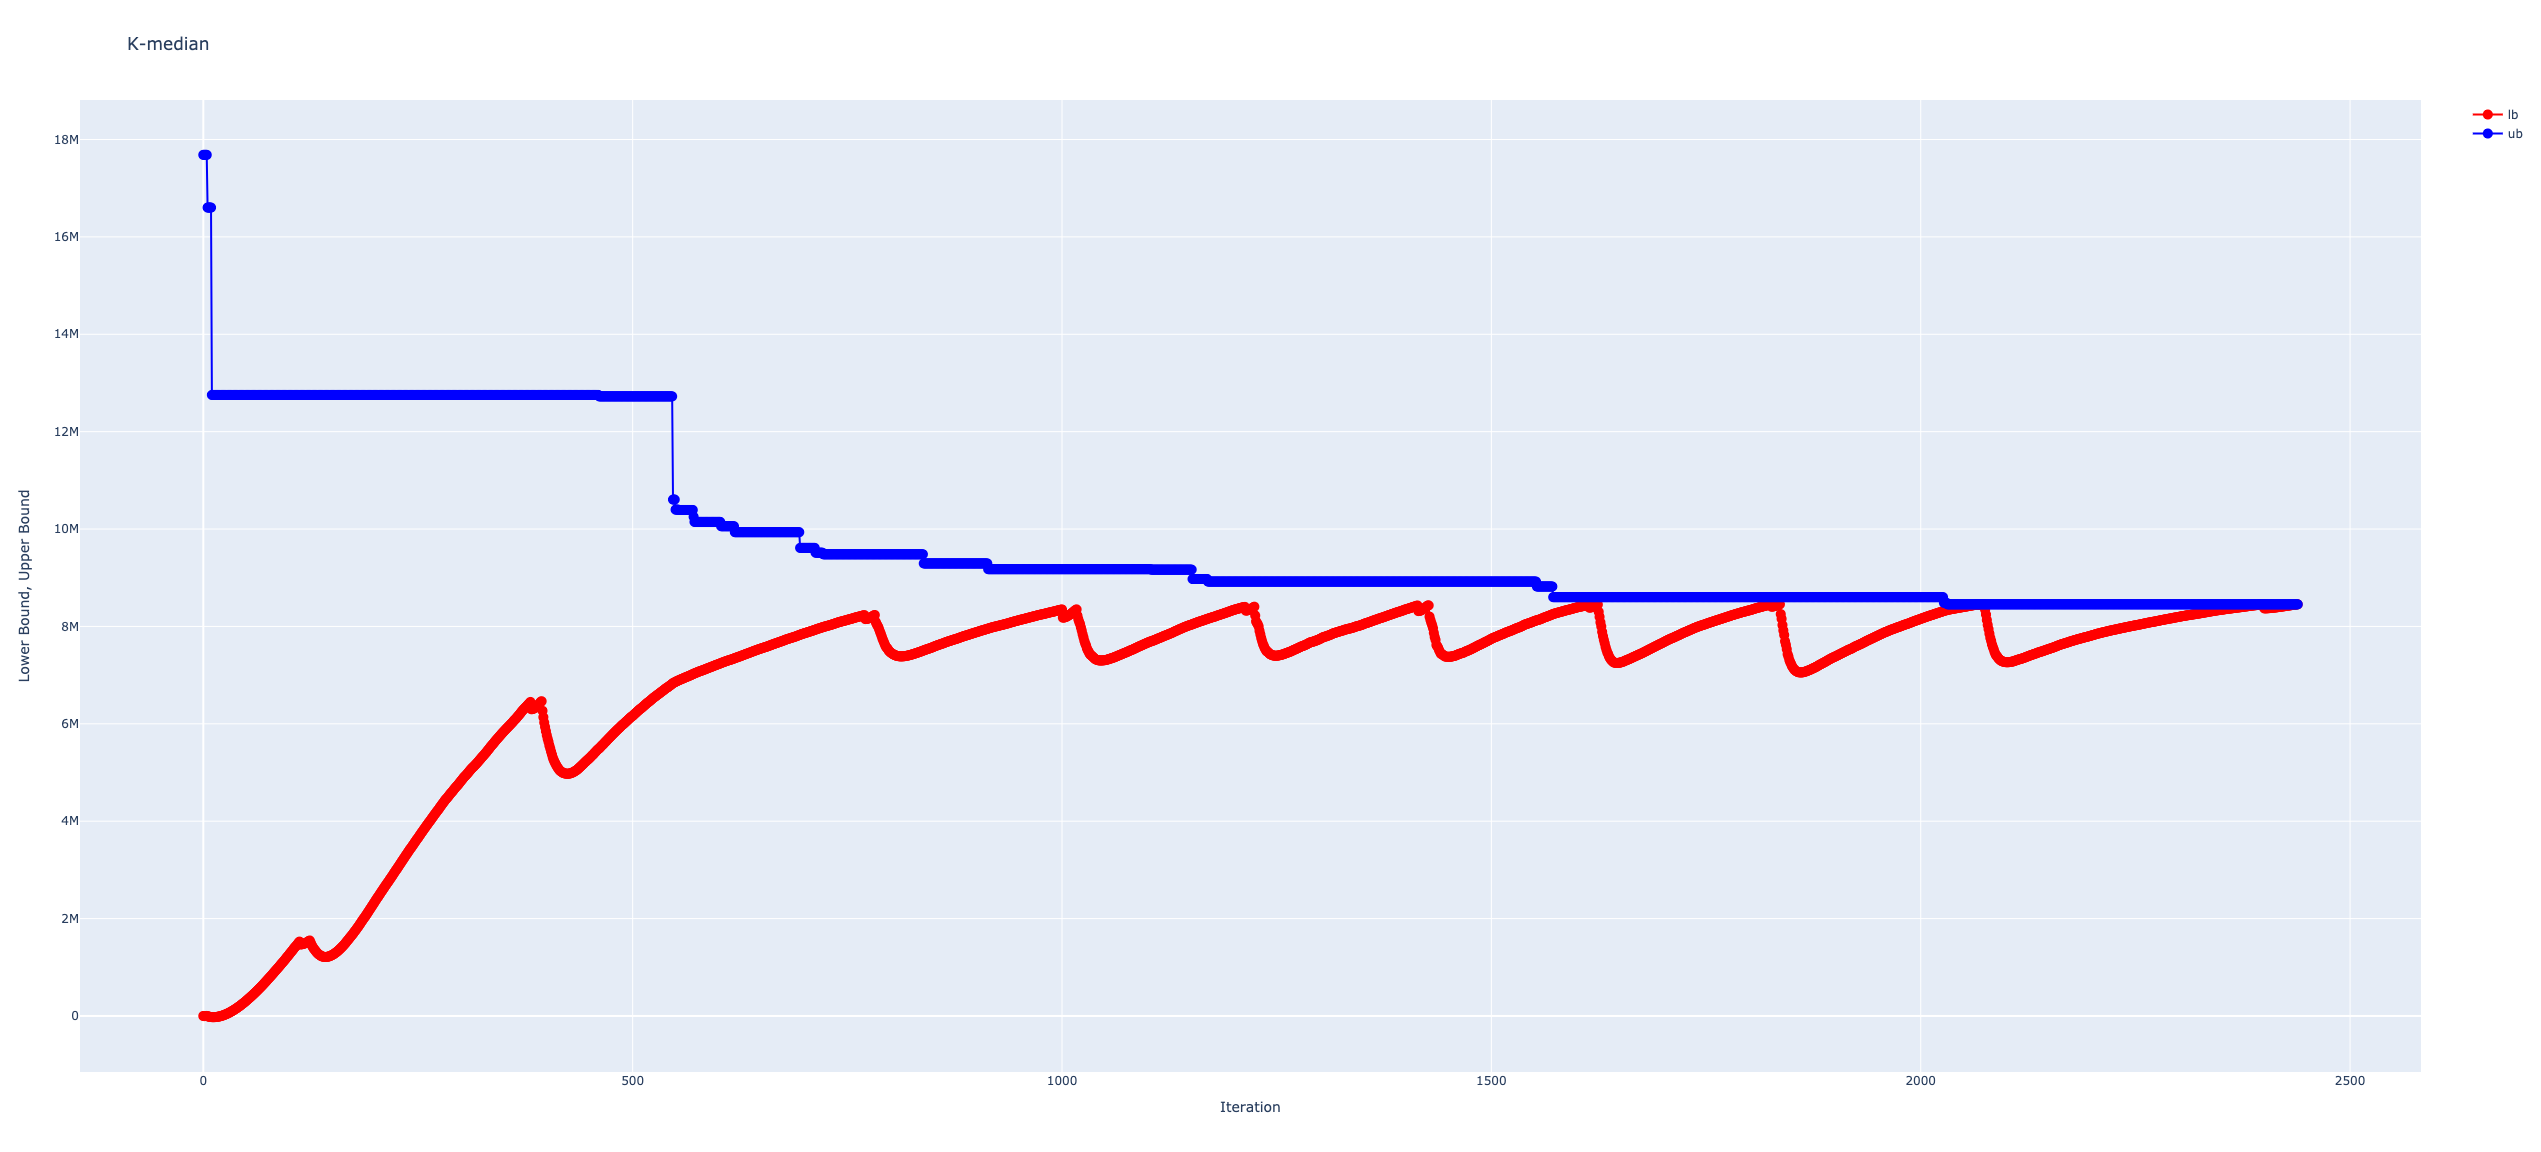

In [ ]:
#| echo: false
Image("../figure/kmedian-search.png")

### k-メディアン法で得られた結果

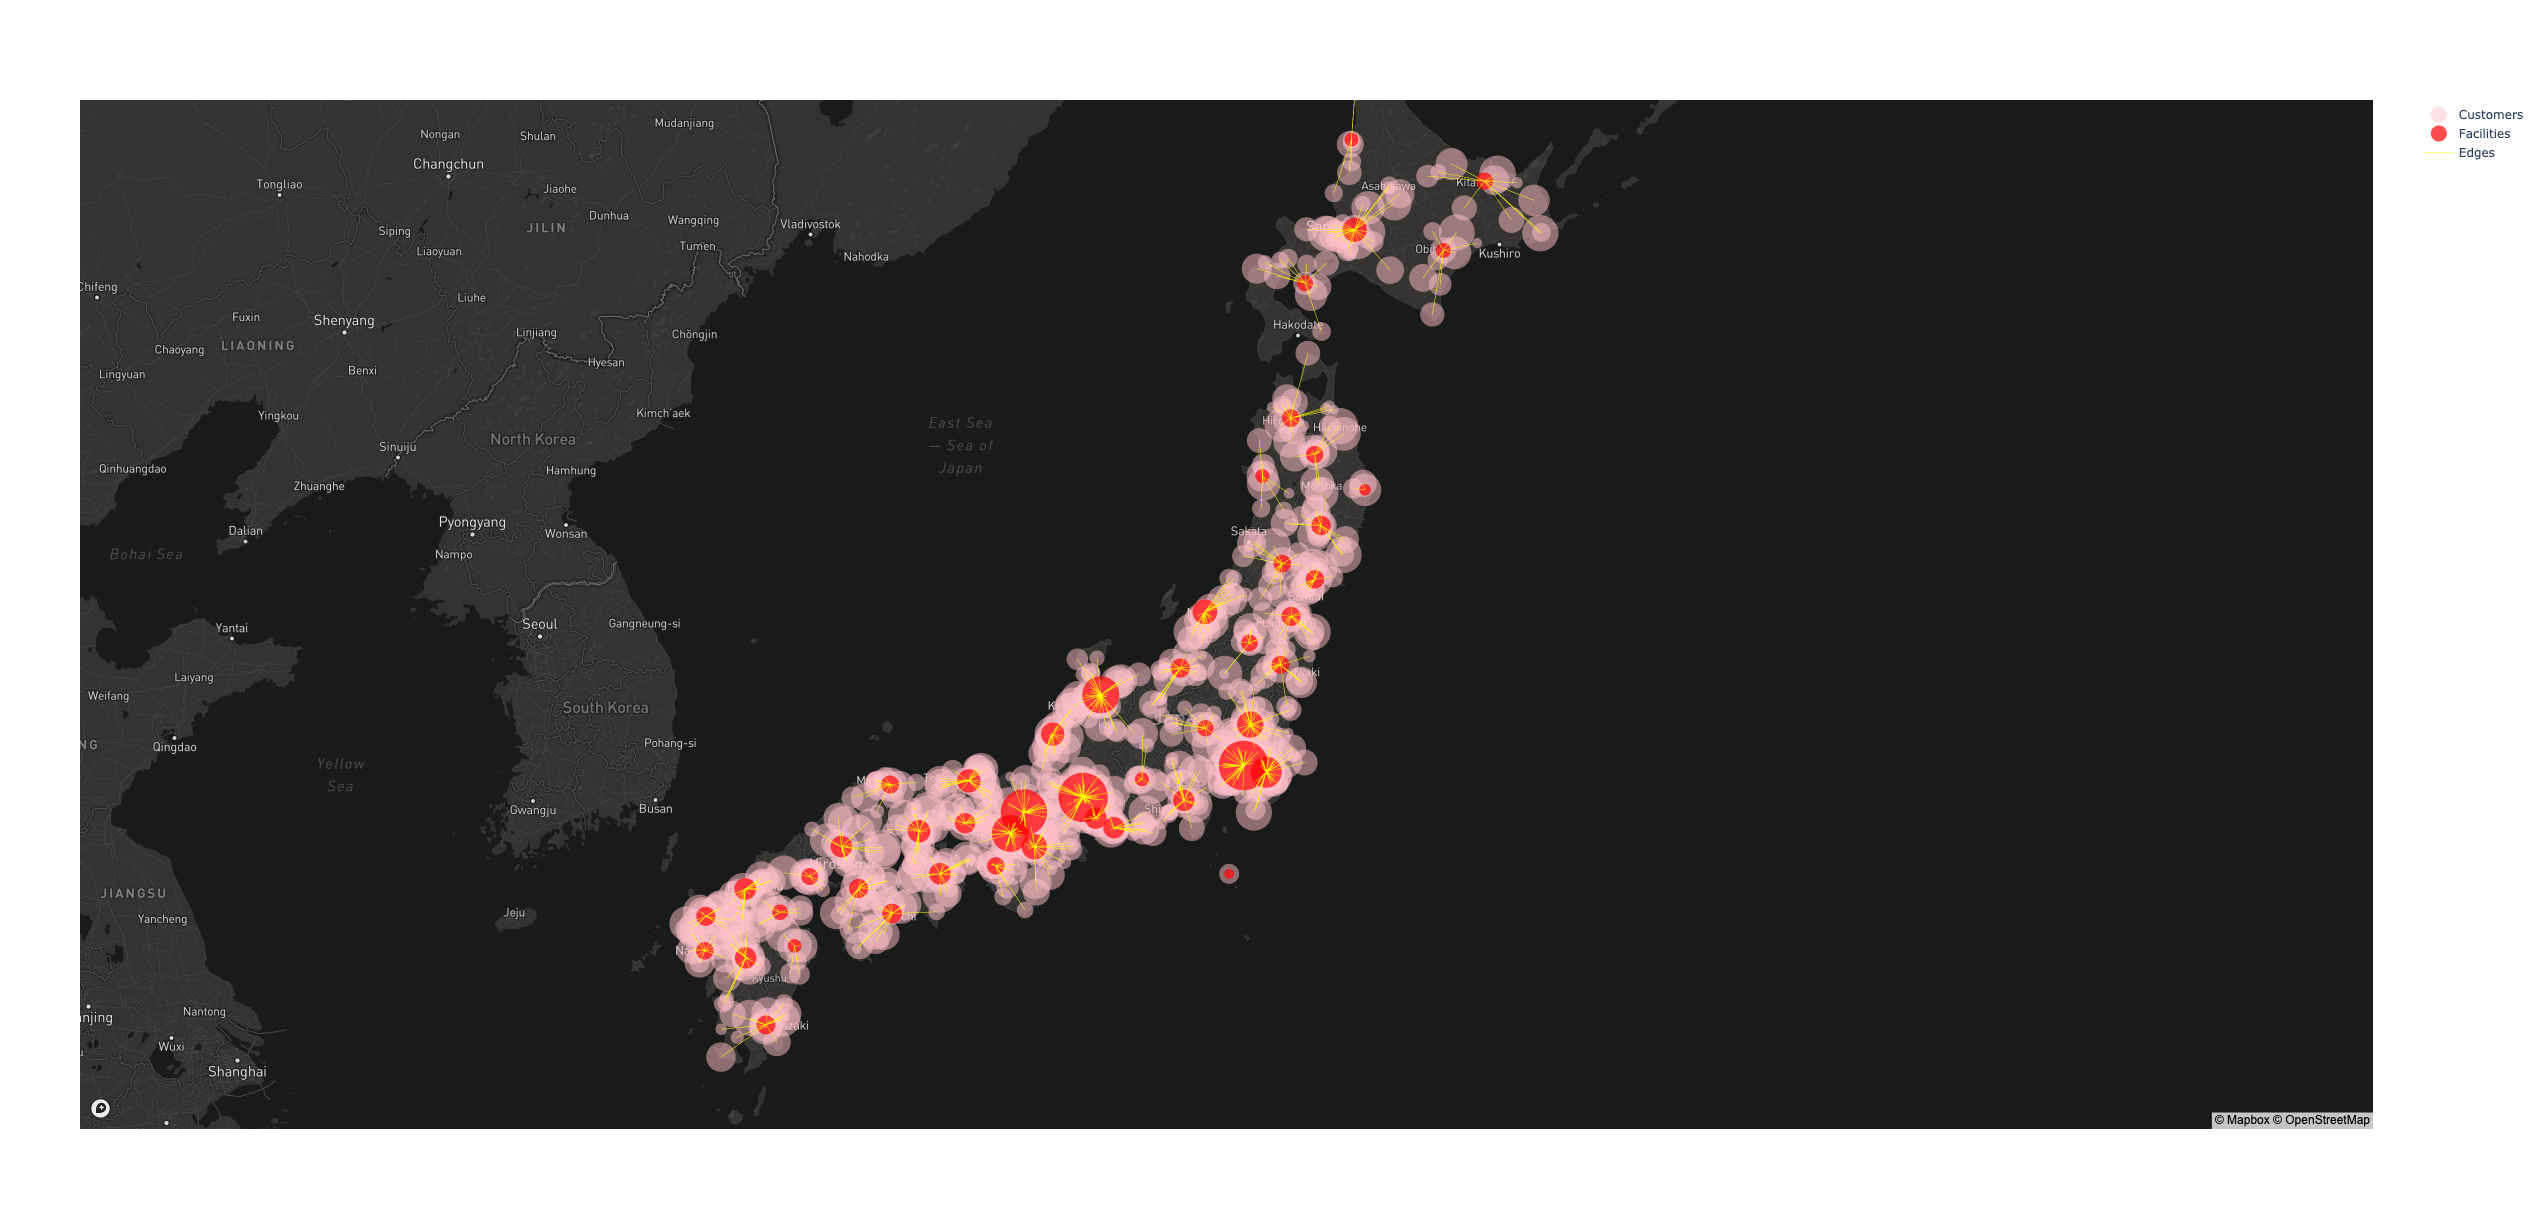

In [ ]:
#| echo: false
# fig = show_optimized_continuous_network(cust_df, X, Y, partition, weight=weight)
# plotly.offline.plot(fig);
Image("../figure/kmedian-opt.png")

### エルボー法を実行する関数 elbow_method

施設数を変化させたときの費用の変化を描画する関数． 費用があまり変化しなくなった点が適切な施設数であると考えられる．
その点が肘を曲げたときの格好に似ていることから，エルボー法と呼ばれるヒューリスティクスである．

引数：
- cust_df : 顧客データフレーム；緯度経度情報を利用する。
- weight : 顧客の重み；重み付きの大圏距離の和を最小化するものとする。
- n_lb: 施設数の下限値
- n_ub: 施設数の上限値
- repetitions: 同一の施設数での実験回数
- method: 施設を求める手法を表す文字列． "kmeans"のときkmeans法，"weiszfeld"のとき反復Weiszfeld法，"hierarchical"のとき階層的クラスタリング法を用いる．
- durations: 階層的クラスタリング法を用いるときの地点間の移動時間行列

返値：
- 施設数を変化させたときの費用の変化を示したPlotlyの図オブジェクト

In [ ]:
#| export
def elbow_method(cust_df, weight, n_lb = 1, n_ub = 10, repetitions=3, method="kmeans", durations=None):
    """
    elbow method
    """
    x, y =[],[]
    for n in range(n_lb, n_ub):
        for r in range(repetitions):
            if method == "kmeans":
                X, Y, partition, cost = kmeans(cust_df, weight, num_of_facilities = n)
            elif method =="weiszfeld":
                X, Y, partition, cost = repeated_weiszfeld(cust_df, weight, num_of_facilities = n, max_iter=1)
            elif method =="hierarchical":
                X, Y, partition, cost = hierarchical_clusterning(cust_df, weight, durations, num_of_facilities = n, linkage="complete")                
            else: 
                print( "Method is incorrect!")
                exit(0)
            x.append(n)
            y.append(cost)
    elbow_df = pd.DataFrame({"num of facilities":x, "cost": y})
    fig = px.scatter(elbow_df, x="num of facilities", y ="cost", title ="Elbow method")
    return fig

###  elbow_method関数の使用例

In [ ]:
# fig = elbow_method(cust_df, weight, n_lb = 10, n_ub = 30, repetitions=1, method="hierarchical", durations=durations)#階層クラスタリングは繰り返しても同じ結果
# #plotly.offline.plot(fig);

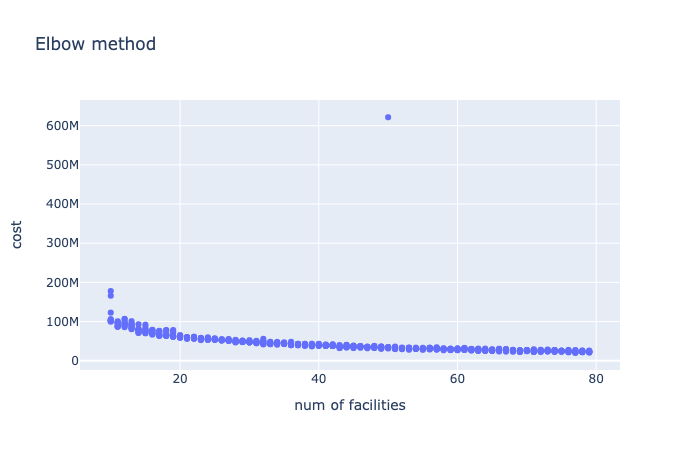

In [ ]:
#| echo: false
Image("../figure/elbow.png")

施設数（集約数）は50程度が良さそうなので，集約した顧客を生成

In [ ]:
#| include: false
#X, Y, partition, cost = repeated_weiszfeld(cust_df, weight, num_of_facilities = 60, max_iter=10)
#X, Y, partition, cost = hierarchical_clusterning(cust_df, weight, durations, num_of_facilities = 50, linkage="complete")       

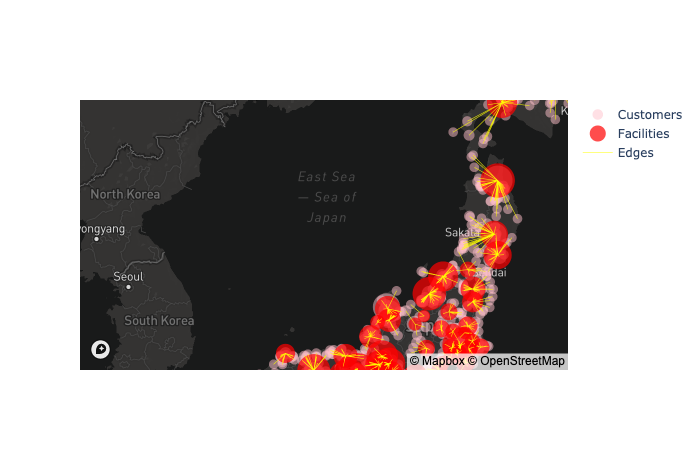

In [ ]:
#| echo: false
#fig = show_optimized_continuous_network(cust_df, X, Y, partition, weight= weight)
#plotly.offline.plot(fig);
Image("../figure/aggregation.png")

### 集約した顧客のデータを生成する関数 make_aggregated_customer_df

引数：
- cust_df : 顧客データフレーム；緯度経度情報を利用する。
- X : 施設の緯度のリスト
- Y : 施設の経度のリスト
- partition : 顧客の割り当てられた施設の番号を格納したリスト
- weight: 顧客の需要量合計

返値：
- aggregated_cust_df: 集約した顧客データフレーム

In [ ]:
#| export
def make_aggregated_cust_df(cust_df, X, Y, partition, weight):
    """
    make aggregated customer dataframe
    """

    cluster ={i:[] for i in range(len(X))}
    for i, row in enumerate(cust_df.itertuples()):
        cluster[ partition[i] ].append(i)

    cluster_list, total_demand = [],[] 
    name_list =[]
    for i in range(len(X)):
        name_list.append( f"cust{i}")
        cluster_list.append( cluster[i] )
        total = 0
        for j in cluster[i]:
            total += weight[j]
        total_demand.append(total)

    aggregated_cust_df = pd.DataFrame({"name":name_list,"lat": X, "lon":Y, "customers":cluster_list, "weight": total_demand})
    return aggregated_cust_df

In [ ]:
aggregated_cust_df = make_aggregated_cust_df(cust_df, X, Y, partition, weight)
aggregated_cust_df.head()

,name,lat,lon,customers,demand
0,cust0,35.170125,136.885273,"[0, 1, 7, 8, 9, 14, 17, 19, 20, 25, 27, 32, 33...",2.442427e+06
1,cust1,33.645909,130.691511,"[30, 47, 80, 93, 104, 106, 111, 122, 130, 131,...",5.168430e+05
2,cust2,34.627574,133.877177,"[5, 12, 38, 50, 61, 73, 74, 82, 89, 94, 95, 11...",7.142208e+05
3,cust3,32.036018,130.764068,"[10, 13, 107, 206, 219, 275, 308, 482, 519, 52...",3.964662e+04
4,cust4,38.208808,140.282584,"[2, 15, 16, 21, 29, 31, 34, 44, 46, 59, 60, 66...",5.405169e+05


### 集約した顧客のデータと需要データを生成する関数 make_aggregated_df

引数：
- cust_df : 顧客データフレーム；緯度経度情報を利用する。
- demand_df: 需要データフレーム（現在は使用していないので，なくても良い）
- total_demand_df: 年間総需要のデータフレーム
- X : 施設の緯度のリスト
- Y : 施設の経度のリスト
- partition : 顧客の割り当てられた施設の番号を格納したリスト
- weight: 顧客の需要量合計

返値：
- aggregated_cust_df: 集約した顧客データフレーム
- aggregated_demand_df: 集約した需要データフレーム （遅いので省いた．）
- aggregated_total_demand_df: 集約した総需要データフレーム

In [ ]:
#| export
def make_aggregated_df(cust_df, demand_df, total_demand_df, X, Y, partition, weight):
    """
    make aggregated dataframe
    """

    cluster ={i:[] for i in range(len(X))}
    for i, row in enumerate(cust_df.itertuples()):
        cluster[ partition[i] ].append(i)

    cluster_list, total_demand = [],[] 
    name_list =[]
    for i in range(len(X)):
        name_list.append( f"cust{i}")
        cluster_list.append( cluster[i] )
        total = 0
        for j in cluster[i]:
            total += weight[j]
        total_demand.append(total)

    aggregated_cust_df = pd.DataFrame({"name":name_list,"lat": X, "lon":Y, "customers":cluster_list, "demand": total_demand})
    
    cust_idx = {}
    for i,row in enumerate(cust_df.itertuples()):
        cust_idx[ str(row.name) ] = i    

# 遅い！
#     cluster_idx =[]
#     try:
#         demand_df.reset_index(inplace=True)
#     except ValueError:
#         pass
#     for row in demand_df.cust:
#         cluster_idx.append( "cust"+ str(partition[ cust_idx[row]]) )
#     demand_df.loc[:,"cluster_idx"] = cluster_idx
#     aggregated_demand_df = pd.pivot_table(demand_df, index=["date", "prod", "cluster_idx"], values="demand", aggfunc=sum)
#     aggregated_demand_df.reset_index(inplace=True)
#     aggregated_demand_df.rename(columns={"cluster_idx":"cust"}, inplace=True)

    cluster_idx =[]    
    for row in total_demand_df.cust:
        cluster_idx.append( "cust"+str(partition[cust_idx[str(row)]]) )

    total_demand_df.loc[:,"cluster_idx"] = cluster_idx
    aggregated_total_demand_df = pd.pivot_table(total_demand_df, index=["prod","cluster_idx"], values="demand", aggfunc=sum)
    aggregated_total_demand_df.reset_index(inplace=True)
    aggregated_total_demand_df.rename(columns={"cluster_idx":"cust"}, inplace=True)

    #return aggregated_cust_df, aggregated_demand_df, aggregated_total_demand_df
    return aggregated_cust_df,  aggregated_total_demand_df

### make_aggregated_df関数の使用例

In [ ]:
aggregated_cust_df, aggregated_total_demand_df = make_aggregated_df(cust_df, demand_df, total_demand_df, X, Y, partition, weight)
#aggregated_cust_df.to_csv(folder+"agg_cust.csv")
aggregated_total_demand_df.head()

,prod,cust,demand
0,A,cust0,79615.123626
1,A,cust1,15948.695055
2,A,cust2,27322.857143
3,A,cust3,9509.052198
4,A,cust4,30050.329670


### 集約データに対する倉庫データ生成

In [ ]:
#| include: false
aggregated_dc_df = generate_dc(aggregated_cust_df, aggregated_total_demand_df, prod_df, num_dc=5, lb_ratio=0.0, ub_ratio=1.3, fc_bounds=(10000,11000))
#aggregated_dc_df.to_csv(folder+"agg_dc.csv")
#aggregated_dc_df.head()

In [ ]:
#| include: false
lead_time_bound= (1,1)
"""
工場データの生成
"""
plnt_list=["Odawara","Osaka","Chiba"]
plnt_lat =[35.2849816, 34.5631009, 35.5434516]
plnt_lon =[139.1961334, 135.4151286, 140.1139081]
plnt_df = pd.DataFrame(data={"name":plnt_list,  "lat":plnt_lat, "lon":plnt_lon} )

products = list(set(aggregated_total_demand_df["prod"]))
num_prod = len(products)

num_prod_osaka = num_prod//2
num_prod_chiba = num_prod - num_prod_osaka
plnt_col = ["Osaka"]*num_prod_osaka + ["Chiba"] * \
    num_prod_chiba + ["Odawara"]*num_prod

prod_col = products[:num_prod_osaka] + products[num_prod_osaka:num_prod] + products[:num_prod]
ub_col = []
lt_col = []
dem = pd.pivot_table(total_demand_df, index="prod", values="demand", aggfunc=sum)
for p in prod_col:
    ub_col.append( dem.loc[p].demand)
    lt_col.append( random.randint(lead_time_bound[0],lead_time_bound[1]))
plnt_prod_df = pd.DataFrame(
    data={"plnt": plnt_col,  "prod": prod_col, "ub": ub_col, "lead_time": lt_col})

## 複数ソースモデルの定式化


集合・パラメータ・変数を以下に示す.

集合：

- $Cust$ : 顧客（群）の集合
- $Dc$ : 倉庫の集合
- $Plnt$ : 工場の集合
- $Prod$ : 製品（群）の集合

パラメータ：

需要量，固定費用，取扱量（生産量）上下限の数値は，単位期間（既定値は365日）に変換してあるものとする．

- $c_{ij}$ : 地点 $ij$ 間の1単位重量あたりの移動費用
- $w_{p}$ : 製品 $p$ の重量
- $vol_{p}$: 製品 $p$ の容量を表す辞書；既定値はNoneでその場合には容量は1に設定される．
- $d_{kp}$ : 顧客 $k$ における製品 $p$ の需要量
- $LB_j, UB_j$ : 倉庫 $j$ の取扱量の下限と上限；入庫する製品量の下限と上限を表す． 
- $NLB, NUB$ : 開設する倉庫数の下限と上限
- $f_j$ : 倉庫 $j$ を開設する際の固定費用
- $v_j$ : 倉庫 $j$ における製品1単位あたりの変動費用
- $PLB_{ip}, PUB_{ip}$ : 工場 $i$ における製品 $p$ の生産量上限

変数：

- $x_{ijp}$ : 地点 $ij$ 間の製品 $p$ のフロー量

- $y_{j}$: 倉庫 $j$ を開設するとき $1$， それ以外のとき $0$ を表す$0$-$1$変数

定式化：

$$
\begin{array}{lll}
 minimize & \sum_{ i \in Plnt, j \in Dc, p \in Prod} (w_p c_{ij} + v_j) x_{ijp} + \sum_{j \in Dc, k \in Cust, p \in Prod} w_p c_{jk} x_{jkp} +  \sum_{j \in Dc} f_j y_j &  \\
s.t. &  \sum_{j \in Dc}  x_{jkp} = d_{kp} & \forall k \in Cust, p \in Prod \\
 & \sum_{ i \in Plnt} x_{ijp}  = \sum_{k \in Cust}  x_{jkp}  &  \forall j \in Dc, p \in Prod \\
 &  x_{jkp} \leq d_{kp} y_j  & \forall j \in Dc, k \in Cust, p \in Prod  \\
 &  LB_j y_j \leq \sum_{i \in Plnt, p \in Prod} vol_{p} x_{ijp} \leq UB_j y_j &  \forall j \in Dc \\
 & \sum_{j \in Dc} x_{ijp}  \leq PUB_{ip} &  \forall i \in Plnt, p \in Prod \\
 & NUB \leq \sum_{j in Dc} y_j \leq NUB &  
\end{array}
$$

In [ ]:
#| export
def lnd_ms(weight, cust, dc, dc_lb, dc_ub, plnt, plnt_ub, demand, tp_cost, del_cost, dc_fc, dc_vc, dc_num, 
           volume = None, fix_y=None, dc_slack_penalty=10000., demand_slack_penalty=10000000.):
#     """
#     Logistics network design, multiple source
#     Gurobi model for multiple-source LND
#     :rtype: object of class `Model`, as defined in `gurobipy`
#     :weight: weight[p] -> unit weight for product `p`
#     :cust: dict associating a customer id to its location as (latitute, longitude)
#     :dc: dict associating a distribution center id to its (latitute, longitude)
#     :dc_lb: dc_lb[k] -> lower bound for distribution center k [not used]
#     :dc_ub: dc_ub[k] -> upper bound for distribution center k
#     :plnt: dict associating a plant id to its (latitute, longitude)
#     :plnt_ub: plnt_ub[k,p] -> upper bound for plant k for p
#     :demand: demand[k,p] -> units of `p` demanded by customer `k`
#     :tp_cost: tp_cost[i,j] -> unit transportation cost from plant `i` to dc `j`
#     :del_cost: tp_cost[i,j] -> unit delivery cost from dc `i` to customer `j`
#     :dc_fc: fixed cost for opening a dc
#     :dc_vc: unit (variable) cost for operating a dc
#     :dc_num: (maximum) number of distribution centers to open
#     """
    prod = set(weight.keys())
    plnt_to_dc = set((i,j,p) for i in plnt for j in dc for p in prod
                     if plnt_ub.get((i,p),0) > 0 and (i,j) in tp_cost)
    dc_to_cust = set((j,k,p) for j in dc for (k,p) in demand if (j,k) in del_cost)
    if volume is None:
        volume ={}
        for p in prod:
            volume[p] = 1. #既定値
    
    model = Model()
    x,y = {}, {}
    for (i,j,p) in plnt_to_dc | dc_to_cust:
        x[i,j,p] = model.addVar(vtype='C', name=f'x[{i},{j},{p}]')

    slack = {}
    for (k,p) in demand:
        if k in cust:
            slack[k,p] = model.addVar(vtype="C", name=f"slack[{k},{p}]")

    for j in dc:
        y[j] = model.addVar(vtype='B', name=f'y[{j}]')

    cost ={}
    for i in range(5):
        cost[i] = model.addVar(vtype="C",name=f"cost[{i}]")

    dc_slack = {}
    for j in dc:
        dc_slack[j] = model.addVar(vtype="C", name=f"dc_slack[{j}]")

    model.update()
    #倉庫変数の固定(fix_y[i]に固定したい値が入っている)
    if fix_y is not None:
        for i,j in enumerate(dc):
            if i in fix_y: #固定すべき倉庫番号が辞書内にある
                model.addConstr( y[j] == fix_y[i], name =f"fix_y[{j}]" )

    Cust_Demand_Cons, DC_Flow_Cons, DC_Strong_Cons, DC_UB_Cons, DC_LB_Cons, Plnt_UB_Cons = {}, {}, {}, {}, {}, {}

    for (k,p) in demand: 
        if k in cust:
            Cust_Demand_Cons[k,p] = model.addConstr(
                quicksum(x[j,k,p] for j in dc if (j,k,p) in dc_to_cust)  + slack[k,p]
                ==
                demand[k,p],
                name=f'Cust_Demand_Cons[{k},{p}]'
            )
    for j in dc:
        for p in prod:
            DC_Flow_Cons[j,p] = model.addConstr(
                quicksum(x[i,j,p] for i in plnt if (i,j,p) in plnt_to_dc)
                ==
                quicksum(x[j,k,p] for k in cust if (j,k,p) in dc_to_cust if k in cust),
                name=f'DC_Flow_Cons[{j},{p}]'
            )
    for (j,k,p) in dc_to_cust:
        if k in cust:
            DC_Strong_Cons[j,k,p] = model.addConstr(
                x[j,k,p]
                <=
                demand[k,p] * y[j],
                name=f'DC_Strong_Cons[{j},{k},{p}]'
            )

    for j in dc:
        DC_UB_Cons[j] = model.addConstr(
            dc_ub[j] * y[j]
            >=
            quicksum(volume[p]*x[i,j,p] for i in plnt for p in prod if (i,j,p) in plnt_to_dc),
            name=f'DC_UB_Cons[{j}]'
        )

    for j in dc:
        DC_LB_Cons[j] = model.addConstr(
            dc_lb[j] * y[j]
            <=
            quicksum(volume[p]*x[i,j,p] for i in plnt for p in prod if (i,j,p) in plnt_to_dc) + dc_slack[j],
            name=f'DC_LB_Cons[{j}]'
        )

    for i,p in plnt_ub:
        Plnt_UB_Cons[i,p] = model.addConstr(
            quicksum(x[i,j,p] for j in dc if (i,j,p) in plnt_to_dc)<=plnt_ub[i,p],
            name=f'Plnt_UB_Cons[{i},{p}]'
        )

    if dc_num is not None:
        if isinstance(dc_num, int):
            dc_lb = dc_num
            dc_ub = dc_num
        else:
            dc_lb = dc_num[0]
            dc_ub = dc_num[1]
        assert dc_lb <= dc_ub
        DC_Num_Cons_LB = model.addConstr(
            quicksum(y[j] for j in dc)
            >=
            dc_lb,
            name='DC_Num_Cons_LB'
        )
        DC_Num_Cons_UB = model.addConstr(
            quicksum(y[j] for j in dc)
            <=
            dc_ub,
            name='DC_Num_Cons_UB'
        )

    model.update()

    model.addConstr( quicksum(weight[p] * tp_cost[i,j] * x[i,j,p] for (i,j,p) in plnt_to_dc) == cost[0] )
    model.addConstr( quicksum(weight[p] * del_cost[j,k] * x[j,k,p] for (j,k,p) in dc_to_cust if k in cust) == cost[1] )
    model.addConstr( quicksum(dc_fc[j] * y[j] for j in dc) == cost[2] )
    model.addConstr( quicksum(dc_vc[j] * x[i,j,p] for (i,j,p) in plnt_to_dc)  == cost[3] )
    model.addConstr( quicksum(dc_slack_penalty*dc_slack[j] for j in dc) +  quicksum(demand_slack_penalty*slack[k,p] for (k,p) in demand if k in cust) == cost[4] )

    model.setObjective( quicksum( cost[i] for i in range(5) ),
        GRB.MINIMIZE
    )

    model.update()
    model.__data = x,y,slack,dc_slack,cost

    return model

## 単一ソースモデルの定式化

集合・パラメータ・変数を以下に示す.

集合：

- $Cust$ : 顧客（群）の集合
- $Dc$ : 倉庫の集合
- $Plnt$ : 工場の集合
- $Prod$ : 製品（群）の集合

パラメータ：

需要量，固定費用，取扱量（生産量）上下限の数値は，単位期間（既定値は365日）に変換してあるものとする．

- $c_{ij}$ : 地点 $ij$ 間の1単位重量あたりの移動費用
- $w_{p}$ : 製品 $p$ の重量
- $vol_{p}$: 製品 $p$ の容量を表す辞書；既定値はNoneでその場合には容量は1に設定される．
- $d_{kp}$ : 顧客 $k$ における製品 $p$ の需要量
- $LB_j, UB_j$ : 倉庫 $j$ の取扱量の下限と上限；入庫する製品量の下限と上限を表す． 
- $NLB, NUB$ : 開設する倉庫数の下限と上限
- $f_j$ : 倉庫 $j$ を開設する際の固定費用
- $v_j$ : 倉庫 $j$ における製品1単位あたりの変動費用
- $PLB_{ip}, PUB_{ip}$ : 工場 $i$ における製品 $p$ の生産量上限

変数：

- $x_{ijp}$ : 地点 $ij$ 間の製品 $p$ のフロー量

- $y_{j}$: 倉庫 $j$ を開設するとき $1$， それ以外のとき $0$ を表す$0$-$1$変数

- $z_{jk}$: 顧客 $k$ が倉庫 $j$ から配送されるとき $1$， それ以外のとき $0$ を表す$0$-$1$変数

定式化：

$$
\begin{array}{lll}
 minimize & \sum_{ i \in Plnt, j \in Dc, p \in Prod} (w_p c_{ij} + v_j) x_{ijp} + \sum_{j \in Dc, k \in Cust, p \in Prod} w_p c_{jk} d_{kp} z_{jk} +  \sum_{j \in Dc} f_j y_j &  \\
s.t. &  \sum_{j \in Dc}  z_{jk} = 1 & \forall k \in Cust \\
 & \sum_{ i \in Plnt} x_{ijp}  = \sum_{k \in Cust}  d_{kp} z_{jk}  &  \forall j \in Dc, p \in Prod \\
 &  z_{jk} \leq y_j  & \forall j \in Dc, k \in Cust  \\
 &  LB_j y_j \leq \sum_{i \in Plnt, p \in Prod} vol_{p} x_{ijp} \leq UB_j y_j &  \forall j \in Dc \\
 & \sum_{j \in Dc} x_{ijp}  \leq PUB_{ip} &  \forall i \in Plnt, p \in Prod \\
 & NUB \leq \sum_{j in Dc} y_j \leq NUB &  
\end{array}
$$

In [ ]:
#| export
def lnd_ss(weight, cust, dc, dc_lb, dc_ub, plnt, plnt_ub, demand, tp_cost, del_cost, dc_fc, dc_vc, dc_num, 
           volume = None, fix_y = None, dc_slack_penalty=10000., demand_slack_penalty=10000000.):
#     """
#     Logistics network design, single source

#     Gurobi model for single-source LND

#     :rtype: object of class `Model`, as defined in `gurobipy`
#     :weight: weight[p] -> unit weight for product `p`
#     :cust: dict associating a customer id to its location as (latitute, longitude)
#     :dc: dict associating a distribution center id to its (latitute, longitude)
#     :dc_lb: dc_lb[k] -> lower bound for distribution center k [not used]
#     :dc_ub: dc_ub[k] -> upper bound for distribution center k
#     :plnt: dict associating a plant id to its (latitute, longitude)
#     :plnt_ub: plnt_ub[k] -> upper bound for plant k
#     :demand: demand[k,p] -> units of `p` demanded by customer `k`
#     :tp_cost: tp_cost[i,j] -> unit transportation cost from plant `i` to dc `j`
#     :del_cost: tp_cost[i,j] -> unit delivery cost from dc `i` to customer `j`
#     :dc_fc: fixed cost for opening a dc
#     :dc_vc: unit (variable) cost for operating a dc
#     :dc_num: (maximum) number of distribution centers to open
#     """
    prod = set(weight.keys())
    plnt_to_dc = set((i,j,p) for i in plnt for j in dc for p in prod
                     if plnt_ub.get((i,p),0) > 0 and (i,j) in tp_cost)
    dc_to_cust = set((j,k,p) for j in dc for (k,p) in demand if (j,k) in del_cost)

    if volume is None:
        volume ={}
        for p in prod:
            volume[p] = 1. #既定値
            
    model = Model()
    x,y = {}, {}
    z = {}

    for (i,j,p) in plnt_to_dc:
        x[i,j,p] = model.addVar(vtype='C', name=f'x[{i},{j},{p}]')

    for j,k in del_cost:
        if k in cust:
            z[j,k] = model.addVar(vtype="B",name=f"z[{j},{k}]")

    slack = {}
    for k in cust:
        slack[k]= model.addVar(vtype="C",name=f"slack[{k}]")

    for j in dc:
        y[j] = model.addVar(vtype='B', name=f'y[{j}]')

    cost ={}
    for i in range(5):
        cost[i] = model.addVar(vtype="C",name=f"cost[{i}]")

    dc_slack = {}
    for j in dc:
        dc_slack[j] = model.addVar(vtype="C", name=f"dc_slack[{j}]")

    model.update()

    #倉庫変数の固定(fix_y[i]に固定したい値が入っている)
    if fix_y is not None:
        for i,j in enumerate(dc):
            if i in fix_y: #固定すべき倉庫番号が辞書内にある
                model.addConstr( y[j] == fix_y[i], name =f"fix_y[{j}]" )
                
    Cust_Demand_Cons, DC_Flow_Cons, DC_Strong_Cons, DC_UB_Cons, DC_LB_Cons, Plnt_UB_Cons = {}, {}, {}, {}, {}, {}

    for k in cust:
        Cust_Demand_Cons[k] = model.addConstr(
                    quicksum(z[j,k] for j in dc if (j,k) in del_cost ) +slack[k]
                    == 1,
                    name=f'Cust_Demand_Cons[{k}]'
        )
        
    for j in dc:
        for p in prod:
            DC_Flow_Cons[j,p] = model.addConstr(
                quicksum(x[i,j,p] for i in plnt if (i,j,p) in plnt_to_dc)
                ==
                quicksum(  demand.get((k,p),0) *z[j,k] for k in cust if (j,k) in del_cost if k in cust),
                name=f'DC_Flow_Cons[{j},{p}]'
            )

    for j,k in del_cost:
        if k in cust:
            DC_Strong_Cons[j,k] = model.addConstr(
                    z[j,k]
                    <=
                    y[j],
                    name=f'DC_Strong_Cons[{j},{k}]'
                )

    for j in dc:
        DC_UB_Cons[j] = model.addConstr(
            dc_ub[j] * y[j]
            >=
            quicksum(volume[p]*x[i,j,p] for i in plnt for p in prod if (i,j,p) in plnt_to_dc),
            name=f'DC_UB_Cons[{j}]'
        )

    for j in dc:
        DC_LB_Cons[j] = model.addConstr(
           dc_lb[j] * y[j]
           <=
           quicksum(volume[p]*x[i,j,p] for i in plnt for p in prod if (i,j,p) in plnt_to_dc)+dc_slack[j],
           name=f'DC_LB_Cons[{j}]'
      )

    for i,p in plnt_ub:
        Plnt_UB_Cons[i,p] = model.addConstr(
            quicksum(x[i,j,p] for j in dc if (i,j,p) in plnt_to_dc) <= plnt_ub[i,p],
            name=f'Plnt_UB_Cons[{i},{p}]'
        )

    if dc_num is not None:
        if isinstance(dc_num, int):
            dc_lb = dc_num
            dc_ub = dc_num
        else:
            dc_lb = dc_num[0]
            dc_ub = dc_num[1]
        assert dc_lb <= dc_ub
        DC_Num_Cons_LB = model.addConstr(
            quicksum(y[j] for j in dc)
            >=
            dc_lb,
            name='DC_Num_Cons_LB'
        )
        DC_Num_Cons_UB = model.addConstr(
            quicksum(y[j] for j in dc)
            <=
            dc_ub,
            name='DC_Num_Cons_UB'
        )

    model.update()

    total_demand = { }
    for k in cust:
        total = 0.
        for p in prod:
            if (k,p) in demand:
                total += weight[p] * demand[k,p]
        total_demand[k] = total 

    model.addConstr( quicksum(weight[p] * tp_cost[i,j] * x[i,j,p] for (i,j,p) in plnt_to_dc) == cost[0] )
    model.addConstr( quicksum(del_cost[j,k] * total_demand[k]* z[j,k] for j,k in del_cost if k in cust) == cost[1] )
    model.addConstr( quicksum(dc_fc[j] * y[j] for j in dc) == cost[2] )
    model.addConstr( quicksum(dc_vc[j] * x[i,j,p] for (i,j,p) in plnt_to_dc)  == cost[3] )
    model.addConstr( quicksum(dc_slack_penalty*dc_slack[j] for j in dc) +  quicksum(demand_slack_penalty*slack[k] for k in cust) == cost[4] )

    model.setObjective( quicksum( cost[i] for i in range(5) ),
        GRB.MINIMIZE
    )
    model.update()
    model.__data = x,y,z,slack,dc_slack,cost

    return model

## 地点間の距離の分布の可視化関数 distance_histgram

実際問題においては、あまり遠い倉庫から顧客に配送することは少なく、同じように、工場から倉庫への輸送もあまり遠いものは行わない。
そのため、遠い距離の輸送・配送経路は、あらかじめ削除しておいた方が効率的だ。
ただし、特定の工場でしか生産されたいないものは、その工場から運ぶしかないので、経路を削除しすぎると実行不能になってしまう。

以下では、そのための指針になるような可視化を考える。まずは、距離のヒストグラムを表示する。

In [ ]:
#| export
def distance_histgram(cust_df, dc_df, plnt_df, distances=None):
    """
    工場・倉庫間と倉庫・顧客間の距離のヒストグラムを返す関数
    """
    dist, kind = [], []
    if distances is None:
        #直線距離
        for plnt_row in plnt_df.itertuples():
            for dc_row in dc_df.itertuples():
                dist.append( distance((plnt_row.lat,plnt_row.lon),(dc_row.lat,dc_row.lon)).kilometers )
                kind.append("plnt-dc")
        for cust_row in cust_df.itertuples():
            for dc_row in dc_df.itertuples():
                dist.append( distance((cust_row.lat,cust_row.lon),(dc_row.lat,dc_row.lon)).kilometers )
                kind.append("dc-cust")

    else:
        #顧客と倉庫は同じと仮定し，道路距離で計算
        n = len(cust_df)
        m = len(plnt_df)
        for i in range(n,n+m):
            for j in range(n):
                if  distances[i][j] < 99999999:
                    dist.append( distances[i][j]/1000.) 
                    kind.append("plnt-dc")
                
        for i in range(n):
            for j in range(n):
                if  distances[i][j] < 99999999:
                    dist.append( distances[i][j]/1000.) 
                    kind.append("dc-cust")
                
    df = pd.DataFrame({"dist": dist, "kind":kind})
    fig = px.histogram(df, x="dist", color="kind")       
    return fig

### distance_histgram関数の使用例

In [ ]:
# cust_df = pd.read_csv(folder+"cust.csv", index_col="id")
# dc_df = pd.read_csv(folder+"DC.csv", index_col=0)
# plnt_df = pd.read_csv(folder+"Plnt.csv", index_col=0)
# fig = distance_histgram(cust_df, dc_df, plnt_df, distances=distances)
# plotly.offline.plot(fig);

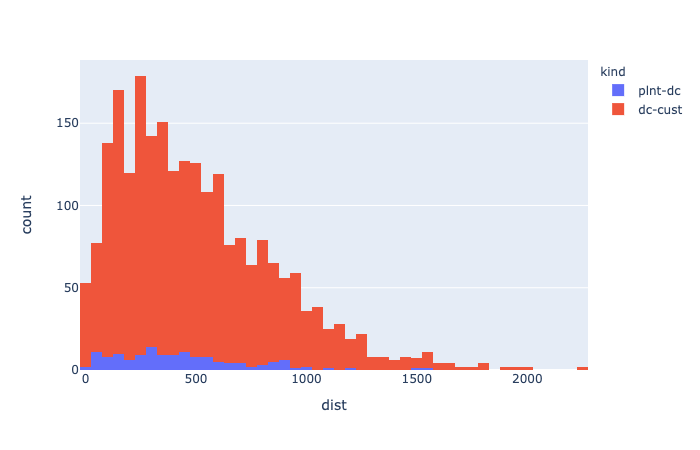

In [ ]:
#| echo: false
Image("../figure/distance_histgram.png")

## 輸送・配送経路の生成関数　make_network_using_road

輸送経路（工場と倉庫間）と配送経路（倉庫と顧客間）を生成する関数（道路距離と移動時間で計算する場合）

引数：
- cust_df : 顧客データフレーム
- dc_df : 倉庫データフレーム
- plnt_df : 工場データフレーム
- durations: 移動時間を入れた配列（最初は顧客=倉庫，その後に工場）；単位は秒 （パスがない場合に大圏距離から算出；時速50kmと仮定）
- distances: 移動距離を入れた配列（最初は顧客=倉庫，その後に工場）；単位はm （パスがない場合には大圏距離の10倍と設定）
- plnt_dc_threshold : 工場・倉庫間の距離の上限 (km)
- dc_cust_threshold : 倉庫・顧客間の距離の上限 (km)
- tc_per_dis : 工場・倉庫間の単位距離・重量あたりの輸送費用 （円/km/単位重量）
- dc_per_dis : 倉庫・顧客間の単位距離・重量あたりの輸送費用 （円/km/単位重量)
- tc_per_time : 工場・倉庫間の単位時間・重量あたりの輸送費用 （円/h/単位重量）
- dc_per_time : 倉庫・顧客間の単位時間・重量あたりの輸送費用 （円/h/単位重量)
- lt_lb : リード時間（単位は日で自然数）を決めるためのパラメータで、最短リード時間（発注から到着までの最短日数）を与える。
- lt_threshold: リード時間（単位は日で自然数）を決めるためのパラメータ；移動距離がこの値を超えたときには、1日を加算する。
- stage_time_bound: 点上での処理に必要な時間（生産時間、処理時間）を生成のための下限と上限のタプル

返値：
-  trans_df : 輸配送ネットワークのデータフレーム；列は以下の通り。
 - from_node : 出発地点 
 - to_node : 到着地点  
 - dist : 距離 （km）
 - time : 移動時間 (h) 
 - cost : 費用 （円）
 - lead_time : リード時間
 - stage_time: 点上での処理に必要な時間（生産時間、処理時間）
 - kind: 経路の種類 ("plnt-dc", "dc-cust"のいずれかの文字列)
- graph : networkXのグラフインスタンス
- position : networkXの点の位置（経度、緯度のタプル）

点を表す辞書のキーに対しては、同名の工場，倉庫，顧客がある場合にエラーするので，
工場は "Plnt_"、倉庫は "DC_"、顧客は "Cust_"を先頭に負荷して区別するものとする。

In [ ]:
#| export
def make_network_using_road(cust_df, dc_df, plnt_df, durations, distances, plnt_dc_threshold = 999999., dc_cust_threshold = 999999.,
                 tc_per_dis = 20./20000, dc_per_dis = 10./4000, tc_per_time = 8000./20000, dc_per_time = 8000./4000, lt_lb =1, lt_threshold = 800., stage_time_bound=(1,1)):
    """
    輸送・配送経路の生成
    """
    assert lt_threshold > 0.001
    # 名称が数字の場合困るので文字列に変換
    cust_df["name"] = cust_df["name"].astype(str)
    dc_df["name"] = dc_df["name"].astype(str)
    plnt_df["name"] = plnt_df["name"].astype(str)
    #描画用に座標positionに保管
    graph = nx.Graph()
    graph.add_nodes_from("Plnt_"+ plnt_df.name)
    graph.add_nodes_from("DC_"+ dc_df.name )
    graph.add_nodes_from("Cust_"+ cust_df.name )
    position={}
    for row in plnt_df.itertuples():
        position["Plnt_"+ str(row.name)] =(row.lon, row.lat)
    for row in dc_df.itertuples():
        position["DC_"+ str(row.name) ] =(row.lon, row.lat)
    for row in cust_df.itertuples():
        position["Cust_"+ str(row.name) ] =(row.lon, row.lat)

    dist, kind, time_list, cost, lead_time, stage_time = [], [], [], [], [], []
    from_node, to_node = [], []
    
    n = len(cust_df)
    for i, plnt_row in enumerate(plnt_df.itertuples()):
        for j, dc_row in enumerate(dc_df.itertuples()):

            if distances[n+i][j] < 9999999:
                dis = distances[n+i][j]/1000.
                time = durations[n+i][j]/3600.
            else:
                dis = 10*distance((plnt_row.lat,plnt_row.lon),(dc_row.lat,dc_row.lon)).kilometers
                time = dis/50. #時速
            if dis <= plnt_dc_threshold:
                from_node.append(plnt_row.name)
                to_node.append(dc_row.name)
                dist.append( dis )
                time_list.append( time )
                kind.append("plnt-dc")
                cost.append( dis*tc_per_dis + time*tc_per_time )
                lead_time.append( math.ceil(dis/lt_threshold) + lt_lb )
                stage_time.append( random.randint(stage_time_bound[0], stage_time_bound[1]) )
                if dis < 9999999:
                    graph.add_edge("Plnt_"+ str(plnt_row.name), "DC_"+ str(dc_row.name))

    for i, cust_row in enumerate(cust_df.itertuples()):
        for j, dc_row in enumerate(dc_df.itertuples()):

            if distances[i][j] < 9999999:
                dis = distances[i][j]/1000.
                time = durations[i][j]/3600.
            else:
                dis = 10*distance((cust_row.lat,cust_row.lon),(dc_row.lat,dc_row.lon)).kilometers
                time = dis/50. #時速
            if dis <= dc_cust_threshold:
                from_node.append(dc_row.name)
                to_node.append(cust_row.name)
                dist.append( dis )
                time_list.append( time ) 
                kind.append("dc-cust")
                cost.append( dis*dc_per_dis + time*dc_per_time  )
                lead_time.append( math.ceil(dis/lt_threshold) + lt_lb )
                stage_time.append( random.randint(stage_time_bound[0], stage_time_bound[1]) )
                if dis < 9999999:
                    graph.add_edge("DC_"+str(dc_row.name), "Cust_"+ str(cust_row.name))

    trans_df = pd.DataFrame({"from_node":from_node, "to_node":to_node, "dist": dist, "time":time_list, "cost":cost, "lead_time": lead_time, "stage_time":stage_time, "kind":kind})
    return trans_df, graph, position

In [ ]:
# cust_df = pd.read_csv(folder + "cust.csv")
# dc_df = pd.read_csv(folder + "DC.csv")
# plnt_df = pd.read_csv(folder + "Plnt.csv")
# durations,  distances, node_df = compute_durations(cust_df, plnt_df, host=host)
# trans_df, graph, position  = make_network_using_road(cust_df, dc_df, plnt_df, durations, distances, plnt_dc_threshold = 10000., dc_cust_threshold = 200. )
# #trans_df.to_csv(folder + "trans_cost.csv")
# trans_df.head()

In [ ]:
#| include: false
# time_df = make_time_df(node_df, durations, distances)
# time_df.to_csv(folder+"time.csv")

In [ ]:
#| include: false
# cust_df = generate_cust(num_locations = 1000, random_seed = 1, prefecture = None )
# plnt_df = pd.read_csv(folder + "Plnt.csv")
# durations,  distances = compute_durations(cust_df, plnt_df)
# dc_df = cust_df.copy()
# trans_df, graph, position  = make_network_using_road(cust_df, dc_df, plnt_df, durations, distances, plnt_dc_threshold = 10000., dc_cust_threshold = 200 )

In [ ]:
#| include: false
#集約データに対する場合
#durations,  distances = compute_durations(aggregated_cust_df, plnt_df)
#trans_df, graph, position  = make_network_using_road(aggregated_cust_df, aggregated_dc_df, plnt_df, durations, distances, plnt_dc_threshold = 10000., dc_cust_threshold = 300.)

### 生成したネットワークの簡易可視化

Plotlyでの描画は，後で述べるplot_scmを使う．

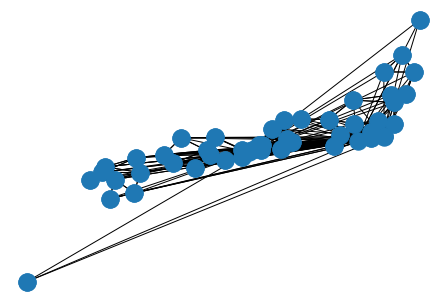

In [ ]:
# %matplotlib inline
# nx.draw(graph,pos=position)

In [ ]:
#| include: false
#fig = plot_scm(aggregated_cust_df, aggregated_dc_df, plnt_df, graph, position)
#plotly.offline.plot(fig);
#Image("../figure/connected_components.png", width=800)

## 輸送・配送経路の生成関数　make_network

輸送経路（工場と倉庫間）と配送経路（倉庫と顧客間）を生成する関数（大圏距離で近似する場合）

引数：
- cust_df : 顧客データフレーム
- dc_df : 倉庫データフレーム
- plnt_df : 工場データフレーム
- plnt_dc_threshold : 工場・倉庫間の距離の上限 (km)
- dc_cust_threshold : 倉庫・顧客間の距離の上限 (km)
- unit_tp_cost : 工場・倉庫間の単位距離・重量あたりの輸送費用 （円/km/単位重量）
- unit_del_cost : 倉庫・顧客間の単位距離・重量あたりの配送費用 （円/km/単位重量)
- lt_lb : リード時間（単位は日で自然数）を決めるためのパラメータで、最短リード時間（発注から到着までの最短日数）を与える。
- lt_threshold: リード時間（単位は日で自然数）を決めるためのパラメータ；移動距離がこの値を超えたときには、1日を加算する。
- stage_time_bound: 点上での処理に必要な時間（生産時間、処理時間）を生成のための下限と上限のタプル

返値：
- trans_df : 輸配送ネットワークのデータフレーム；列は以下の通り。
 - from_node : 出発地点 
 - to_node : 到着地点  
 - dist : 距離 （km）
 - cost : 費用 （円）
 - lead_time : リード時間
 - stage_time: 点上での処理に必要な時間（生産時間、処理時間）
 - kind: 経路の種類 ("plnt-dc", "dc-cust"のいずれかの文字列)
- graph : networkXのグラフインスタンス
- position : networkXの点の位置（経度、緯度のタプル）

点を表す辞書のキーに対しては、同名の工場，倉庫，顧客がある場合にエラーするので，
工場は "Plnt_"、倉庫は "DC_"、顧客は "Cust_"を先頭に負荷して区別するものとする。

In [ ]:
#| export
def make_network(cust_df, dc_df, plnt_df, plnt_dc_threshold = 999999., dc_cust_threshold = 999999.,
                 unit_tp_cost = 1., unit_del_cost = 1.,lt_lb =1, lt_threshold = 800., stage_time_bound=(1,1)):
    """
    輸送・配送経路の生成: 
    """
    assert lt_threshold > 0.001
    # 名称が数字の場合困るので文字列に変換
    cust_df["name"] = cust_df["name"].astype(str)
    dc_df["name"] = dc_df["name"].astype(str)
    plnt_df["name"] = plnt_df["name"].astype(str)
    #描画用に座標positionに保管
    graph = nx.Graph()
    graph.add_nodes_from("Plnt_"+ plnt_df.name)
    graph.add_nodes_from("DC_"+ dc_df.name )
    graph.add_nodes_from("Cust_"+ cust_df.name )
    position={}
    for row in plnt_df.itertuples():
        position["Plnt_"+ str(row.name)] =(row.lon, row.lat)
    for row in dc_df.itertuples():
        position["DC_"+ str(row.name) ] =(row.lon, row.lat)
    for row in cust_df.itertuples():
        position["Cust_"+ str(row.name) ] =(row.lon, row.lat)

    dist, kind, cost, lead_time, stage_time = [], [], [], [], []
    from_node, to_node = [], []
    for plnt_row in plnt_df.itertuples():
        for dc_row in dc_df.itertuples():
            dis = distance((plnt_row.lat,plnt_row.lon),(dc_row.lat,dc_row.lon)).kilometers
            if dis <= plnt_dc_threshold:
                from_node.append(plnt_row.name)
                to_node.append(dc_row.name)
                dist.append( dis )
                kind.append("plnt-dc")
                cost.append( dis*unit_tp_cost )
                lead_time.append( math.ceil(dis/lt_threshold) + lt_lb )
                stage_time.append( random.randint(stage_time_bound[0], stage_time_bound[1]) )
                graph.add_edge("Plnt_"+ str(plnt_row.name), "DC_"+ str(dc_row.name))

    for cust_row in cust_df.itertuples():
        for dc_row in dc_df.itertuples():
            dis = distance((cust_row.lat,cust_row.lon),(dc_row.lat,dc_row.lon)).kilometers
            if dis <= dc_cust_threshold:
                from_node.append(dc_row.name)
                to_node.append(cust_row.name)
                dist.append( dis )
                kind.append("dc-cust")
                cost.append( dis*unit_del_cost )
                lead_time.append( math.ceil(dis/lt_threshold) + lt_lb )
                stage_time.append( random.randint(stage_time_bound[0], stage_time_bound[1]) )
                graph.add_edge("DC_"+str(dc_row.name), "Cust_"+ str(cust_row.name))

    trans_df = pd.DataFrame({"from_node":from_node, "to_node":to_node, "dist": dist, "cost":cost, "lead_time": lead_time, "stage_time":stage_time, "kind":kind})
    return trans_df, graph, position

### make_network関数の使用例

In [ ]:
# cust_df = pd.read_csv(folder + "cust.csv")
# dc_df = pd.read_csv(folder + "DC.csv")
# plnt_df = pd.read_csv(folder + "Plnt.csv")
# prod_df = pd.read_csv(folder + "Prod.csv")
# plnt_prod_df = pd.read_csv(folder + "Plnt-Prod.csv")

# trans_df, graph, position = make_network(cust_df, dc_df, plnt_df, plnt_dc_threshold = 10000.,
#                                          dc_cust_threshold = 200.,unit_tp_cost = 1., unit_del_cost = 10., lt_lb =3, lt_threshold = 800.,stage_time_bound=(1,2))
# #trans_df.to_csv(folder + "trans_cost.csv")
# trans_df.head()

,from_node,to_node,dist,cost,lead_time,stage_time,kind
0,Odawara,札幌市,884.563252,884.563252,5,2,plnt-dc
1,Odawara,青森市,630.586550,630.586550,4,2,plnt-dc
2,Odawara,盛岡市,520.723595,520.723595,4,1,plnt-dc
3,Odawara,仙台市,363.801278,363.801278,4,2,plnt-dc
4,Odawara,秋田市,499.430315,499.430315,4,2,plnt-dc


In [ ]:
#| include: false
# aggregated_cust_df = pd.read_csv(folder + "agg_cust.csv")
# aggregated_dc_df = pd.read_csv(folder + "agg_dc.csv")

# aggregated_trans_df, graph, position = make_network(aggregated_cust_df, aggregated_dc_df, plnt_df, plnt_dc_threshold = 10000.,
#                                          dc_cust_threshold = 200.,unit_tp_cost = 1., unit_del_cost = 10., lt_lb =3, lt_threshold = 800.,stage_time_bound=(1,2))
# aggregated_trans_df.to_csv(folder + "agg_trans_cost.csv")
# aggregated_trans_df.head()

### 需要が0の地点を除く関数　remove_zero_cust

実際問題では、年間需要が全くない顧客がいる可能性がある。これは、データベースに登録された顧客だが、１年間全く発注しなかったものや、
統廃合によってすでにない顧客などがあげられる。これをあらかじデータからのぞいておく関数が、以下のremove_zero_custである。

引数：
- cust_df: 顧客データフレーム
- demand_df: 需要データフレーム

返値：
- 新しい（需要が0の顧客を除いた）顧客データフレーム（需要量の合計を表す列が追加されている）。


倉庫の配置候補地点を顧客上としている場合には、倉庫の候補地点からも除くべきであるが、必ずしも除く必要がない場合もあるので、除く必要がある場合には、手作業で削除するものとする。

In [ ]:
#| export
def remove_zero_cust(cust_df, demand_df):
    """
    需要が０の地点を除く関数
    """
    #顧客ごとの需要量の計算
    demand_pivot = pd.pivot_table(demand_df,index="cust",values="demand")
    dic = {}
    for row in demand_pivot.itertuples():
        dic[ row.Index ] = row.demand
    total_demand = []
    for row in cust_df.itertuples():
        total_demand.append( dic[ row.name ] )
    #total_demand[-1] = 0. # 例として最後の顧客の需要を0に設定する。
    cust_df["total_demand"] = total_demand
    new_cust_df = cust_df[  cust_df.total_demand > 0.]
    #new_cust_df.tail() #那覇市が除かれたデータフレーム
    return new_cust_df

In [ ]:
# demand_df = pd.read_csv(folder+"demand.csv")
# new_cust_df = remove_zero_cust(cust_df, demand_df)
# new_cust_df.head()

,id,name,lat,lon,total_demand
0,1,札幌市,43.06417,141.34694,0.229589
1,2,青森市,40.82444,140.74000,0.331507
2,3,盛岡市,39.70361,141.15250,0.166849
3,4,仙台市,38.26889,140.87194,0.198630
4,5,秋田市,39.71861,140.10250,0.210959


### 総需要が0の顧客を除く関数 remove_zero_total_demand

In [ ]:
#| export
def remove_zero_total_demand(total_demand_df, cust_df):
    
    td = pd.pivot_table(total_demand_df, index="cust", values="demand")
    td.reset_index(inplace=True)
    nonzero = td[ td.demand >0 ]
    
    try:
        cust_df.set_index("name", inplace=True)
    except:
        pass
    try: #顧客のインデックスが文字列の場合
        idx =  list( map(str, nonzero.cust) )
        cust_df = cust_df.loc[ idx, :]
    except: #顧客のインデックスが整数の場合
        idx =  nonzero.cust
        cust_df = cust_df.loc[ idx, :]
    cust_df.reset_index(inplace=True)
    return cust_df

### remove_zero_total_demand関数の使用例

In [ ]:
# total_demand_df = pd.read_csv("Cust-Prod.csv")
# total_demand_df.columns=["cust","prod","demand"]
# cust_df = pd.read_csv("cust.csv")
# cust_df.columns= ["name","lat","lon"]
# cust_df["lat"] = cust_df["lat"].astype(float)
# cust_df["lon"] = cust_df["lon"].astype(float)
# new_cust_df = remove_zero_total_demand(total_demand_df, cust_df)
# new_cust_df

,name,lat,lon
0,191,43.055874,141.367475
1,221,43.036309,141.439051
2,396,41.826084,140.725339
3,560,36.031805,139.630817
4,590,43.797487,142.403188
...,...,...,...
758,9905855,34.471059,132.387806
759,9908978,33.687982,130.486641
760,9909893,35.672854,139.817410
761,9921389,35.325564,136.917991


## サプライ・チェイン全体の可視化関数　plot_scm

引数：
- cust_df : 顧客データフレーム
- dc_df : 倉庫データフレーム
- plnt_df : 工場データフレーム
- graph : NetworkXのグラフインスタンス
- position : NetworkXの点の位置（経度、緯度のタプル）
- node_only: 点だけを表示するとき True

返値：
- PlotlyのFigureオブジェクト（顧客、倉庫、工場と輸配送経路）

In [ ]:
#| export
def plot_scm(cust_df, dc_df, plnt_df, graph, position, node_only=False):
    """
    顧客、倉庫、工場データフレームを入れると、PlotlyのFigureオブジェクトに地図を入れて返す関数
    """
    data = [
        go.Scattermapbox(
            lat=cust_df.iloc[:,1],
            lon=cust_df.iloc[:,2],
            mode='markers',
            marker=dict(
                size=10, color="blue", opacity=0.9
            ),
            text=cust_df.iloc[:,0],
            name="Customers"
        ),
        go.Scattermapbox(
            lat=dc_df.iloc[:,1],
            lon=dc_df.iloc[:,2],
            mode='markers',
            marker=dict(
                size=20, color="red", opacity=0.6
            ),
            text=dc_df.iloc[:,0],
            name="Warehouses"
        ),
        go.Scattermapbox(
            lat=plnt_df.iloc[:,1],
            lon=plnt_df.iloc[:,2],
            mode='markers',
            marker=dict(
                size=30, color="orange", opacity=0.8
            ),
            text=plnt_df.iloc[:,0],
            name="Plants"
        ),
    ]
    
    if node_only == False:
        edge_trace_lat, edge_trace_lon = [], []
        for (i,j) in graph.edges():
            edge_trace_lat += [position[i][1], position[j][1], None]
            edge_trace_lon += [position[i][0], position[j][0], None]
            
        data.append(    
            go.Scattermapbox(
                lat=edge_trace_lat,
                lon=edge_trace_lon,
                line=dict(width=0.5, color='yellow'),
                hoverinfo='none',
                mode='lines',
                name="Edges"
            )
        )

    layout = go.Layout(
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=dict(
                lat=35.8573157,
                lon=139.64696
            ),
            pitch=0,
            zoom=5,
            style="dark"  # 'satellite-streets'
        ),
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

### plot_scm関数の使用例

In [ ]:
#cust_df = pd.read_csv("cust.csv")
#dc_df = pd.read_csv("DC.csv")
#plnt_df = pd.read_csv("Plnt.csv")
# fig = plot_scm(cust_df, dc_df, plnt_df, graph, position)
# plotly.offline.plot(fig);

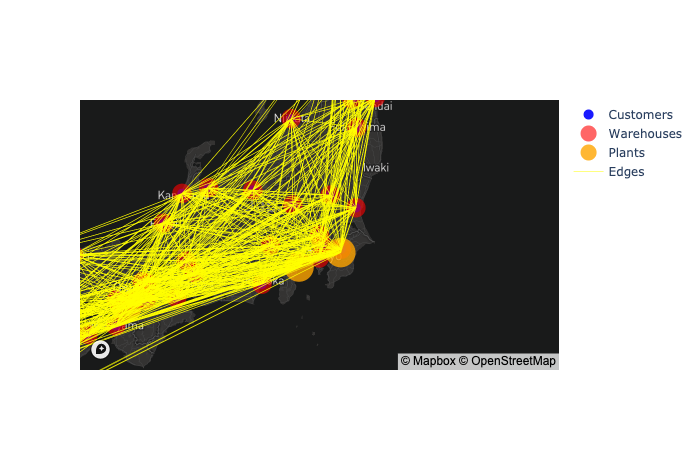

In [ ]:
#| echo: false
Image("../figure/plot_scm.png")

### 数値の桁数を表示する関数 digit_histgram

需要データと輸配送費用の数値の桁数（ならびに小数点以下の桁数）をヒストグラムで表示する。

In [ ]:
#| export
def digit_histgram(df, col_name = ""):
    """
     数値の桁数のヒストグラムを返す関数
    """
    num_digit, num_float_digit = [], []
    for d in df[col_name]:
        nd, nfd = map(len, str(d).split(".") )
        num_digit.append(nd)
        num_float_digit.append(nfd)

    digit_df = pd.DataFrame( {col_name+"_digits":num_digit, col_name+ "_float_digits":num_float_digit})

    digit_stack = pd.DataFrame(digit_df.stack(), columns=["digits"]).reset_index()
    max_digits = digit_stack.digits.max()
    fig = px.histogram(digit_stack, x= "digits", color="level_1", opacity =0.5, range_x= (1,max_digits) )
    return fig

### digit_histgram関数の使用例

- 年間需要データフレームの需要列の桁数

- 輸配送データフレームの費用列の桁数

In [ ]:
#fig = digit_histgram(total_demand_df, "demand")
#plotly.offline.plot(fig);

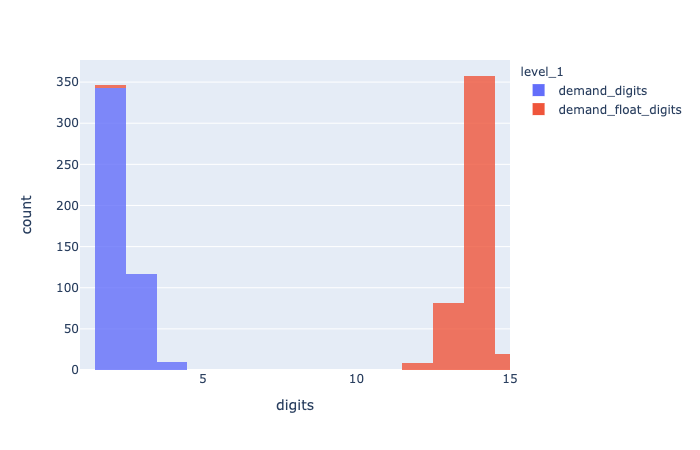

In [ ]:
#| echo: false
Image("../figure/digit_hist_demand.png")

In [ ]:
# fig = digit_histgram(trans_df, "cost")
# plotly.offline.plot(fig);

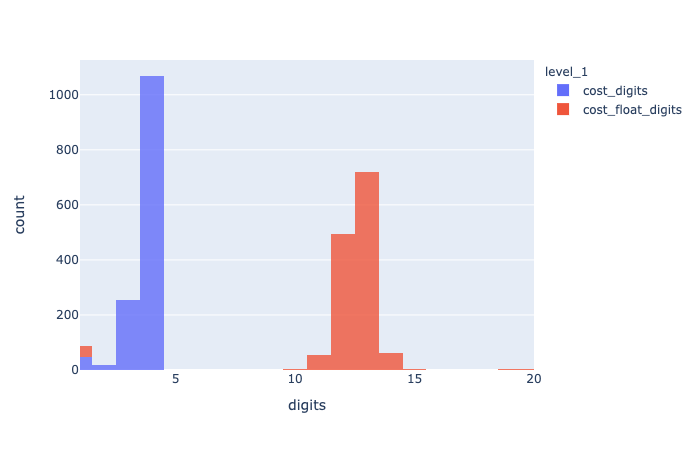

In [ ]:
#| echo: false
Image("../figure/digit_hist_trans.png")

### 桁数を丸め

小数以下の桁数を丸めることによって、最適化が高速になる。以下では、需要を小数点２以下２桁で丸め、輸配送費用を整数に丸めている。

In [ ]:
# rounded_total_demand_df = total_demand_df.round({"demand":2})
# rounded_trans_df = trans_df.round({"cost":0})

In [ ]:
#rounded_total_demand_df.head()

,prod,cust,demand
0,A,さいたま市,85.23
1,A,京都市,67.18
2,A,仙台市,75.21
3,A,佐賀市,84.23
4,A,前橋市,67.18


### 年間需要量 total_demand.csv ならびに輸送費用 trans_cost.csv として保管

In [ ]:
#| include: false
#rounded_total_demand_df.to_csv(folder + "total_demand.csv")
#rounded_trans_df.to_csv(folder + "trans_cost.csv")

In [ ]:
#| include: false
#rounded_total_demand_df.head()

In [ ]:
#| include: false
#rounded_total_demand_df.tail()

## データフレームからロジスティクス・ネットワーク設計モデルを解く関数

引数：
- prod_df: 製品データフレーム
- cust_df : 顧客データフレーム
- dc_df : 倉庫データフレーム（固定費用、変動費用を追加）
- plnt_df : 工場データフレーム
- plnt_prod_df: 工場・製品データフレーム
- total_demand_df: 総需要データフレーム
- trans_df: 輸送ネットワークデータフレーム
- dc_num: 開設したい倉庫数；下限と上限を指定したい場合にはタプル． 既定値は None で指定なし．
- single_sourcing: 単一ソースの場合にTrue、それ以外のときFalse
- max_cpu: 計算時間上限

返値：

- flow_df: 輸・配送量が正の経路を入れたデータフレーム
- dc_df: 倉庫の開設の有無を表す列 (open_close) を追加
- cost_df: 費用の内訳を入れたデータフレーム
- violation_df: 制約の逸脱量を入れたデータフレーム
- Status: 最適化の状態（2でない場合は最適でない）

In [ ]:
#| export
def solve_lnd(prod_df, cust_df, dc_df, plnt_df, plnt_prod_df, total_demand_df, trans_df, dc_num=None, single_sourcing=True, max_cpu = 100):
    """
    データフレームからロジスティック・ネットワーク設計モデルを解く関数
    """
    weight = {str(p):w for p,w in zip(prod_df.name, prod_df.weight)}
    cust = {str(c):(lat,lon) for c,lat,lon in zip(cust_df.name, cust_df.lat, cust_df.lon)}
    dc = {str(c):(lat,lon) for c,lat,lon in zip(dc_df.name, dc_df.lat, dc_df.lon)}
    dc_lb = {str(c):lb for c,lb in zip(dc_df.name, dc_df.lb) }
    dc_ub = {str(c):ub for c,ub in zip(dc_df.name, dc_df.ub) }
    plnt = {str(c):(lat,lon) for c,lat,lon in zip(plnt_df.name, plnt_df.lat, plnt_df.lon)}
    plnt_ub = {(str(p), str(pro)):ub  for p,pro,ub in zip(plnt_prod_df.plnt, plnt_prod_df["prod"], plnt_prod_df.ub) }
    demand = {(str(c), str(pro)):d  for c,pro,d in zip(total_demand_df.cust, total_demand_df["prod"], total_demand_df.demand) }

    tp_df = trans_df[ trans_df.kind =="plnt-dc"]
    del_df = trans_df[ trans_df.kind =="dc-cust"]

    tp_cost = { (str(f),str(t)):c for f,t,c in zip(tp_df.from_node, tp_df.to_node, tp_df.cost)}
    del_cost = { (str(f),str(t)):c for f,t,c in zip(del_df.from_node, del_df.to_node, del_df.cost)}

    dc_fc = {str(dc):dc_fc for dc,dc_fc in zip(dc_df.name, dc_df.fc)}
    dc_vc = {str(dc):dc_vc for dc,dc_vc in zip(dc_df.name, dc_df.vc)}
    
    prod_set = set(weight.keys())
    plnt_to_dc = set((i,j,p) for i in plnt for j in dc for p in prod_set
                     if plnt_ub.get((i,p),0) > 0 and (i,j) in tp_cost)
    dc_to_cust = set((j,k,p) for j in dc for (k,p) in demand if (j,k) in del_cost)

    if single_sourcing:
        model = lnd_ss(weight, cust, dc, dc_lb, dc_ub, plnt, plnt_ub, demand, tp_cost, del_cost, dc_fc, dc_vc, dc_num)
    else:
        model = lnd_ms(weight, cust, dc, dc_lb, dc_ub, plnt, plnt_ub, demand, tp_cost, del_cost, dc_fc, dc_vc, dc_num)

    if GUROBI:
        #model.Params.NumericFocus = 3
        model.optimize()
    else:
        solver = PULP_CBC_CMD(timeLimit=max_cpu, presolve=True, msg=1)
        try:
            model.optimize(solver)  #pulpのバージョンが違う場合のため
        except:
            model.optimize()
    
    if model.Status !=2: #最適解でないときの処理
        raise SolverError(f"Falied to solve the problem! Status Code is {model.Status}.")

    epsilon = 1.00e-4
    if single_sourcing:
        x, y, z, slack, dc_slack, cost = model.__data
    else:
        x, y, slack, dc_slack, cost = model.__data
        
    from_node, to_node, prod, flow = [],[],[],[]
    #需要不足量の計算
    slack_list = [ ]
    cust_list = [ ]
    prod_list =[ ]
    if single_sourcing:
        for i in slack:
            #print(i,slack[i].X)
            if slack[i].X>epsilon:
                #print(i,slack[i].X)
                for p in prod_set:
                    if (i,p) in demand:
                        slack_list.append(demand[i,p])
                        cust_list.append(i)
                        prod_list.append(p)
    else:
        for (i,p) in slack:
            if slack[i,p].X>epsilon:
                #print(i,p,slack[i,p].X)
                slack_list.append(slack[i,p].X)
                cust_list.append(i)
                prod_list.append(p)
    violation_df = pd.DataFrame({"cust":cust_list, "prod":prod_list, "value":slack_list})

    #倉庫の下限の逸脱
    lb_dev = []
    for j in dc_slack:
        lb_dev.append( dc_slack[j].X )
    dc_df["lower_bound_violation"] = lb_dev

    cost_list =[cost[i].X for i in range(5)]
    total_cost = sum(cost_list)
    cost_list.insert(0, total_cost)
    cost_name =["total cost", "transportation (plant to dc)", "delivery (dc to customer)", "dc fixed", "dc variable", "infeasible penalty" ]
    cost_df = pd.DataFrame.from_dict({"cost": cost_name, "value":cost_list})
    #for j in y:
    #    print(dc_ub[j], quicksum(x[i,j,p].X for i in plnt for p in prod_df.name if (i,j,p) in x))
    if single_sourcing:
        for (i,j,p) in x:
            if x[i,j,p].X > epsilon:
                #print(i,j,p,x[i,j,p].X)
                from_node.append("Plnt_"+str(i))
                to_node.append("DC_"+str(j))
                prod.append(p)
                flow.append(x[i,j,p].X)
        for (j,k) in z:
            if z[j,k].X > epsilon:
                for p in weight:
                    if (k,p) in demand:
                        #print(j,k,p,demand[k,p])
                        from_node.append("DC_"+str(j))
                        to_node.append("Cust_"+str(k))
                        prod.append(p)
                        flow.append(demand[k,p])
    else: #multi-soucing
        for (i,j,p) in plnt_to_dc:
            if x[i,j,p].X > epsilon:
                from_node.append("Plnt_"+str(i))
                to_node.append("DC_"+str(j))
                prod.append(p)
                flow.append(x[i,j,p].X)
        for (j,k,p) in dc_to_cust:
            if x[j,k,p].X > epsilon:
                from_node.append("DC_"+str(j))
                to_node.append("Cust_"+str(k))
                prod.append(p)
                flow.append(x[j,k,p].X)

    flow_df = pd.DataFrame.from_dict({"from_node":from_node, "to_node":to_node, "prod":prod, "flow":flow})
    #flow_df.to_csv("flow.csv")
    #flow_df.head()
    open_close = []
    for j in y:
        #print(DC[j],y[j].X)
        open_close.append( int(y[j].X) )
    dc_df["open_close"] = open_close

    return flow_df, dc_df, cost_df, violation_df, model.Status

### solve_lnd関数の使用例

In [ ]:
#| include: false
# folder = "../data/case/"

# #dfs = [prod_df, aggregated_cust_df, aggregated_dc_df, plnt_df, plnt_prod_df, aggregated_total_demand_df, aggregated_trans_df]
# names =["case-prod.csv", "case-cust.csv", "case-dc.csv", "case-plnt.csv", "case-plnt-prod.csv", "case-total-demand.csv", "case-trans.csv"]
# prod_df = pd.read_csv(folder+names[0])
# cust_df = pd.read_csv(folder+names[1])
# dc_df = pd.read_csv(folder+names[2])
# plnt_df  = pd.read_csv(folder+names[3])
# plnt_prod_df  = pd.read_csv(folder+names[4])
# total_demand_df  = pd.read_csv(folder+names[5])
# trans_df  = pd.read_csv(folder+names[6])

In [ ]:
#| include: false
# #集約データの場合
# flow_df, dc_df, cost_df, violation_df, status = solve_lnd(prod_df, aggregated_cust_df, aggregated_dc_df, plnt_df, plnt_prod_df, aggregated_total_demand_df, 
#                            trans_df, dc_num= (8,10), single_sourcing=False, max_cpu =10)
# if status != 1:
#     if status == 3:
#         print("Infeasible solution")
#     elif status == 4:
#         print( "Infeasible or unbounded")
#     elif status == 5:
#         print("Unbounded solution")
#     else:
#         print("Failed to find an optimal solution")
# else:
#     print(cost_df)

In [ ]:
# cust_df = pd.read_csv(folder + "cust.csv")
# plnt_df = pd.read_csv(folder + "Plnt.csv")
# total_demand_df = pd.read_csv(folder + "demand.csv")
# trans_df = pd.read_csv(folder + "trans_cost.csv")
# dc_df = pd.read_csv(folder + "DC.csv")
# prod_df = pd.read_csv(folder + "Prod.csv")
# plnt_prod_df = pd.read_csv(folder + "Plnt-Prod.csv")
# try:
#     flow_df, dc_df, cost_df, violation_df, status = solve_lnd(prod_df, cust_df, dc_df, plnt_df, plnt_prod_df, total_demand_df, 
#                            trans_df, dc_num= (5,10), single_sourcing=True, max_cpu = 10)

# except SolverError as e:
#         print(e)

# if status != 2:
#     if status == 3:
#         print("Infeasible solution")
#     elif status == 4:
#         print( "Infeasible or unbounded")
#     elif status == 5:
#         print("Unbounded solution")
#     else:
#         print("Failed to find an optimal solution")
# else:
#     print(cost_df)

                           cost         value
0                    total cost  5.096749e+07
1  transportation (plant to dc)  2.836256e+07
2     delivery (dc to customer)  2.249198e+07
3                      dc fixed  1.055960e+05
4                   dc variable  7.356548e+03
5            infeasible penalty  0.000000e+00


In [ ]:
#費用の可視化
# fig = px.bar(cost_df, y="cost", x="value", orientation='h')
# plotly.offline.plot(fig);

### 結果の可視化関数 show_optimized_network

引数：
- cust_df: 顧客データフレーム
- dc_df: 倉庫データフレーム
- plnt_df: 工場データフレーム
- prod_df: 製品データフレーム
- flow_df: 最適化されたフロー量を保管したデータフレーム
- position : NetworkXの点の位置（経度、緯度のタプル）

返値：
- Plotlyの図オブジェクト


In [ ]:
#| export
def show_optimized_network(cust_df, dc_df, plnt_df, prod_df, flow_df, position):
    """
    顧客、倉庫、工場、輸・配送データフレームを入れると、PlotlyのFigureオブジェクトに地図を描画
    """

    pd.set_option('mode.chained_assignment',None)
    
    data = [
        go.Scattermapbox(
            lat=cust_df.iloc[:,1],
            lon=cust_df.iloc[:,2],
            mode='markers',
            marker=dict(
                size=10, color="blue", opacity=0.9
            ),
            text=cust_df.iloc[:,0],
            name="Customers"
        ),
        go.Scattermapbox(
            lat=dc_df.iloc[:,1][ dc_df.open_close==1 ] ,
            lon=dc_df.iloc[:,2][ dc_df.open_close==1 ] ,
            mode='markers',
            marker=dict(
                size=20, color="red", opacity=0.6
            ),
            text=dc_df.iloc[:,0],
            name="Warehouses"
        ),
        go.Scattermapbox(
            lat=plnt_df.iloc[:,1],
            lon=plnt_df.iloc[:,2],
            mode='markers',
            marker=dict(
                size=30, color="orange", opacity=0.8
            ),
            text=plnt_df.iloc[:,0],
            name="Plants"
        ),
    ]

    for p in prod_df.iloc[:,0]:
        edge_trace_lat, edge_trace_lon = [], []
        temp_df = flow_df[ flow_df["prod"]==str(p) ]
        for row in temp_df.itertuples():
            i = row.from_node
            j = row.to_node
            edge_trace_lat += [position[i][1], position[j][1], None]
            edge_trace_lon += [position[i][0], position[j][0], None]
        data.append(
            go.Scattermapbox(
                lat=edge_trace_lat,
                lon=edge_trace_lon,
                line=dict(width=0.5),
                hoverinfo='none',
                mode='lines',
                name= str(p)
            )
        )
    layout = go.Layout(
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=dict(
                lat=35.8573157,
                lon=139.64696
            ),
            pitch=0,
            zoom=5,
            style="dark"  # 'satellite-streets'
        ),
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

### show_optimized_network関数の使用例

In [ ]:
#fig = show_optimized_network(cust_df, dc_df, plnt_df, prod_df, flow_df, position)
#plotly.offline.plot(fig);

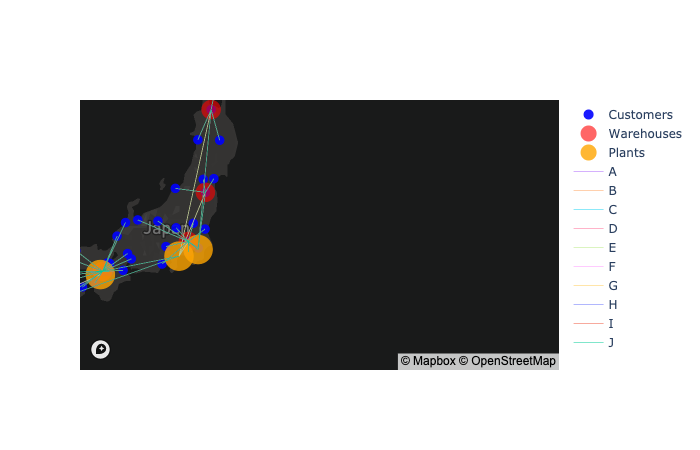

In [ ]:
#| echo: false
Image("../figure/network_design.png")

## Excelインターフェィス

### Excelのテンプレートを生成する関数 make_excel_melos

返値:
- wb: ExcelのWorkBook；以下のシートと列をもつ．

倉庫候補地点

- lb: 容量下限
- ub: 容量上限
- fc: 固定費用
- vc: 変動費用

製品

- name: 製品の名称
- weight: 製品の重量 (単位はkg)
- volume: 製品の容量 (単位は 𝑚3 ）

In [ ]:
#| export
def make_excel_melos():
    #テンプレ生成
    wb = Workbook()
    ws = wb.active
    wb.remove(ws)
    ws = wb.create_sheet(title="顧客")
    ws.append(["顧客名称（ID）","緯度(小数)","経度（小数)"])
    #コメント
    ws.cell(1,1).comment = Comment("顧客の名称（住所などの付加情報）", "logopt")
    ws.cell(1,2).comment = Comment("顧客の緯度．形式例 40.268． Google Mapで右クリック", "logopt")
    ws.cell(1,3).comment = Comment("顧客の経度．形式例 135.6983 Google Mapで右クリック", "logopt")

    #データチェック
    dv = DataValidation(type="decimal", allow_blank=False)
    ws.add_data_validation(dv)
    dv.add('B2:C1048576') 
    
    ws = wb.create_sheet(title="倉庫候補地点")
    ws.append(["倉庫候補地点名称（ID）","緯度(小数)","経度（小数)", "容量下限(m3)", "容量上限(m3)", "固定費用（円）", "変動費用（円/unit)"])
    #コメント
    ws.cell(1,1).comment = Comment("倉庫候補地点の名称（住所などの付加情報）", "logopt")
    ws.cell(1,2).comment = Comment("倉庫候補地点の緯度．形式例 35.6983 Google Mapで右クリック", "logopt")
    ws.cell(1,3).comment = Comment("倉庫候補地点の経度．形式例 140.268． Google Mapで右クリック", "logopt")
    ws.cell(1,4).comment = Comment("倉庫を開設したときの使用容量の下限(m3)", "logopt")
    ws.cell(1,5).comment = Comment("倉庫を開設したときの使用容量の上限(m3)", "logopt")  
    ws.cell(1,6).comment = Comment("倉庫の開設にかかる年間固定費用（円）", "logopt")   
    ws.cell(1,7).comment = Comment("倉庫を通過した製品1単位にかかる費用（円/unit）", "logopt")   
    
    #データチェック
    dv = DataValidation(type="decimal", allow_blank=False)
    ws.add_data_validation(dv)
    dv.add('B2:G1048576') 
    
    ws = wb.create_sheet(title="工場")
    ws.append(["工場名称（ID）","緯度(小数)","経度（小数)"])
    #コメント
    ws.cell(1,1).comment = Comment("工場の名称（住所などの付加情報）", "logopt")
    ws.cell(1,2).comment = Comment("工場の緯度．形式例 35.6983 Google Mapで右クリック", "logopt")
    ws.cell(1,3).comment = Comment("工場の経度．形式例 140.268 Google Mapで右クリック", "logopt")

    #データチェック
    dv = DataValidation(type="decimal", allow_blank=False)
    ws.add_data_validation(dv)
    dv.add('B2:C1048576') 
    
    
    ws = wb.create_sheet(title="製品")
    ws.append(["製品名称（ID）","重量(kg/unit)","容量(m3/unit)"])
    #コメント
    ws.cell(1,1).comment = Comment("製品の名称", "logopt")
    ws.cell(1,2).comment = Comment("製品の重量（輸配送費用の計算に用いる）", "logopt")
    ws.cell(1,3).comment = Comment("製品の容量（倉庫の容量制約で用いる）", "logopt")

    #データチェック
    dv = DataValidation(type="decimal", allow_blank=False)
    ws.add_data_validation(dv)
    dv.add('B2:C1048576')  
    
    return wb

In [ ]:
wb = make_excel_melos()
wb.save("melos-templete.xlsx")

### 需要（顧客・製品）と生産（工場・製品）シートの生成関数 make_demand_production_sheets

基本テンプレートにデータを入力後に，需要（顧客・製品）と生産（工場・製品）シートを追加する．

引数：
- wb: 基本テンプレートのExcel Workbook

返値：
- wb: 需要シートと生産シートを追加した Excel Workbook

In [ ]:
#| export
def make_demand_production_sheets(wb):
    #製品データ読み込み
    data = wb["製品"].values
    cols = next(data)[:]
    data = list(data)
    prod_df = pd.DataFrame(data, columns=cols).dropna(how="all") 
    products = prod_df.iloc[:,0]

    data = wb["顧客"].values
    cols = next(data)[:]
    data = list(data)
    cust_df = pd.DataFrame(data, columns=cols).dropna(how="all") 
    customers = cust_df.iloc[:,0]

    data = wb["工場"].values
    cols = next(data)[:]
    data = list(data)
    plnt_df = pd.DataFrame(data, columns=cols).dropna(how="all") 
    plants = plnt_df.iloc[:,0]

    ws_demand = wb.create_sheet("需要")
    if len(products) >=1:
        ws_demand.append(["顧客/製品"] + list(products))
        for c in customers:
            ws_demand.append([str(c)])
        #data validation
        dv = DataValidation(type="decimal",
                            operator="greaterThanOrEqual",
                            formula1=0.)
        cell = ws_demand.cell(1,len(products)+1)
        col_name = cell.column_letter
        dv.add(f'B2:{col_name}1048576') 
        ws_demand.add_data_validation(dv)

    ws_production = wb.create_sheet("生産")
    if len(products)>=1:
        ws_production.append(["工場/製品"] + list(products))
        for p in plants:
            ws_production.append([str(p)])
        ws_production.add_data_validation(dv)   
    
    return wb

In [ ]:
# wb = load_workbook("melos-templete.xlsx", data_only=True)
# wb = make_demand_production_sheets(wb)
# wb.save("melos-ex2.xlsx")    

### Excel Workbookからデータフレームを生成する関数 prepare_df_for_melos

データを入力したExcel Workbookからデータフレームを生成する．

引数：
- wb: データ入力済みExcel Workbook

返値：
- cust_df : 顧客データフレーム
- dc_df : 倉庫データフレーム
- plnt_df : 工場データフレーム
- prod_df: 製品データフレーム
- demand_df: 需要データフレーム
- production_df: 生産データフレーム

In [ ]:
#| export
def prepare_df_for_melos(wb): 
    #基本wbのシートの読み込みとデータフレームの準備
    data = wb["顧客"].values
    cols = next(data)[:]
    data = list(data)
    cust_df = pd.DataFrame(data, columns=["name","lat","lon"]).dropna(how="all") 
    #cust_df = pd.DataFrame(data, columns=cols).dropna(how="all") 
    
    data = wb["倉庫候補地点"].values
    cols = next(data)[:]
    data = list(data)
    dc_df = pd.DataFrame(data, columns=cols).dropna(how="all") 
    
    data = wb["工場"].values
    cols = next(data)[:]
    data = list(data)
    #plnt_df = pd.DataFrame(data, columns=["name","lat","lon"]).dropna(how="all") 
    plnt_df = pd.DataFrame(data, columns=cols).dropna(how="all") 
    
    data = wb["製品"].values
    cols = next(data)[:]
    data = list(data)
    #prod_df = pd.DataFrame(data, columns=["name", "weight", "volume"]).dropna(how="all") 
    prod_df = pd.DataFrame(data, columns=cols).dropna(how="all") 
    
    data = wb["需要"].values
    cols = next(data)[:]
    data = list(data)
    demand_df = pd.DataFrame(data, columns=cols).dropna(how="all")
    
    data = wb["生産"].values
    cols = next(data)[:]
    data = list(data)
    production_df = pd.DataFrame(data, columns=cols).dropna(how="all")
    return  cust_df, dc_df, plnt_df, prod_df, demand_df, production_df

In [ ]:
# wb = load_workbook("melos-final-ex2.xlsx", data_only=True)
# cust_df, dc_df, plnt_df, prod_df, demand_df, production_df = prepare_df_for_melos(wb)

### ルートデータフレームの生成と描画用のグラフの準備 prepare_trans_df

引数：
- wb: データ入力済みExcel Workbook（輸配送ルートシートを含むものとする）
- plnt_df : 工場データフレーム
- dc_df : 倉庫データフレーム
- cust_df : 顧客データフレーム

返値：

- trans_df : 輸配送ネットワークのデータフレーム
- graph : networkXのグラフインスタンス
- position : networkXの点の位置（経度、緯度のタプル）

点を表す辞書のキーに対しては、同名の工場，倉庫，顧客がある場合にエラーするので，
工場は "Plnt_"、倉庫は "DC_"、顧客は "Cust_"を先頭に負荷して区別するものとする。

In [ ]:
#| export
def prepare_trans_df(wb, plnt_df, dc_df, cust_df): 
    data = wb["輸配送ルート"].values
    cols = next(data)[:]
    data = list(data)
    trans_df = pd.DataFrame(data, columns=cols).dropna(how="all") 
    
    graph = nx.Graph()
    position={}
    for row in plnt_df.itertuples():
        graph.add_node("Plnt_"+ str(row[1]))
        position["Plnt_"+ str(row[1])] =(row[3], row[2])
    for row in dc_df.itertuples():
        graph.add_node("DC_"+ str(row[1]))
        position["DC_"+ str(row[1])] =(row[3], row[2])
    for row in cust_df.itertuples():
        graph.add_node("Cust_"+ str(row[1]))
        position["Cust_"+ str(row[1])] =(row[3], row[2])
        
    for row in trans_df.itertuples():
        if row[10] == "plnt-dc":
            graph.add_edge("Plnt_"+ str(row[1]), "DC_"+ str(row[4]))
        else:
            graph.add_edge("DC_"+ str(row[1]), "Cust_"+ str(row[4]))
            
    return trans_df, graph, position

#### prepare_trans_dfの使用例

In [ ]:
# wb = load_workbook("melos-ex1-result.xlsx", data_only=True)
# cust_df, dc_df, plnt_df, prod_df, demand_df, production_df = prepare_df_for_melos(wb)
# trans_df, graph, position = prepare_trans_df(wb, plnt_df, dc_df, cust_df)

### 顧客の集約を行う関数 customer_aggregation

顧客数が多い場合には，道路距離をもとに集約する．集約した顧客と需要データは，集約顧客シートに書き出す．

引数：
- wb: データ入力済みExcel Workbook
- cust_df : 顧客データフレーム
- prod_df: 製品データフレーム
- demand_df: 需要データフレーム
- num_of_facilities: 集約後の顧客群数

返値：

- wb: 集約顧客シートを追加したExcel Workbook
- fig: 集約したネットワークの図


In [ ]:
#| export
def customer_aggregation(wb, cust_df, prod_df, demand_df, num_of_facilities):   
    #集約のためのweightの計算
    weight_of_prod = prod_df.iloc[:,1]
    dem = demand_df.iloc[:,1:].values
    n_cust = len(cust_df)
    n_prod = len(prod_df)
    weight = np.zeros(shape=n_cust)
    for i in range(n_cust):
        for p in range(n_prod):
            weight[i] += dem[i][p]*weight_of_prod[p]
    #道路距離と時間の計算
    durations,  distances, node_df = compute_durations(cust_df, toll=True, host= host)                
    X, Y, partition, cost = hierarchical_clusterning(cust_df, weight, durations, num_of_facilities, linkage="complete")
    fig = show_optimized_continuous_network(cust_df, X, Y, partition, weight=weight)
    aggregated_cust_df = make_aggregated_cust_df(cust_df, X, Y, partition, weight)
    dem_agg = np.zeros(shape =(num_of_facilities, n_prod))
    for i, row in enumerate(aggregated_cust_df.itertuples()):
        for c in row[4]:
            for p in range(n_prod):
                dem_agg[i,p] += dem[c, p]
    ws = wb.create_sheet(title="集約顧客")
    ws.append(["集約顧客","緯度(小数)", "経度（小数)","顧客リスト"] + list(prod_df.iloc[:,0]))
    for i in range(num_of_facilities):
        ws.append( list(aggregated_cust_df.iloc[i,:3]) +[str(aggregated_cust_df.iloc[i,3])]+ list(dem_agg[i]) )
    return wb, fig

#### customer_aggregation関数の使用例

In [ ]:
# wb, fig = customer_aggregation(wb, cust_df, prod_df, demand_df, num_of_facilities=10)
# plotly.offline.plot(fig);
# #wb.save("melos-ex2-agg.xlsx")

### 輸配送ネットワークシートを生成する関数 make_network_for_excel

顧客もしくは集約した顧客情報をもとに，ネットワークを構築する．

引数：

- wb: データ入力済みExcel Workbook
- cust_df : 顧客データフレーム
- dc_df : 倉庫データフレーム
- plnt_df : 工場データフレーム
- plnt_dc_threshold : 工場・倉庫間の距離の上限 (km)
- dc_cust_threshold : 倉庫・顧客間の距離の上限 (km)
- tc_per_dis : 工場・倉庫間の単位距離・重量あたりの輸送費用 （円/km/kg）
- dc_per_dis : 倉庫・顧客間の単位距離・重量あたりの配送費用 （円/km/kg)
- tc_per_time : 工場・倉庫間の単位時間・重量あたりの輸送費用 （円/h/kg）
- dc_per_time : 倉庫・顧客間の単位時間・重量あたりの配送費用 （円/h/kg)
- default_mult: 地点間に道路が存在しない場合に，移動距離を計算する際に，大圏距離に乗じる値
- default_velocity: 地点間に道路が存在しない場合の平均時速

返値：
- wb: 輸配送ルートシートを追加したExcel Workbook
- trans_df : 輸配送ネットワークのデータフレーム
- graph : networkXのグラフインスタンス
- position : networkXの点の位置（経度、緯度のタプル）

点を表す辞書のキーに対しては、同名の工場，倉庫，顧客がある場合にエラーするので，
工場は "Plnt_"、倉庫は "DC_"、顧客は "Cust_"を先頭に負荷して区別するものとする。


In [ ]:
#| export
def make_network_for_excel(wb, cust_df, dc_df, plnt_df, plnt_dc_threshold = 999999., dc_cust_threshold = 999999.,
                 tc_per_dis = 20./20000, dc_per_dis = 10./4000, tc_per_time = 8000./20000, dc_per_time = 8000./4000,
                 default_mult=10.,default_velocity = 30. ):

    #距離と時間の計算
    ROUTE =[]
    for row in plnt_df.iloc[:,:3].itertuples():
        ROUTE.append( [row[2], row[3]] )
    for row in dc_df.iloc[:,:3].itertuples():
        ROUTE.append( [row[2], row[3]] )
    for row in cust_df.iloc[:,:3].itertuples():
        ROUTE.append( [row[2], row[3]] )
    route_str =""
    for (i,j) in ROUTE[:]:
        route_str += str(j)+","+str(i)+";"
    response = requests.get(f'http://{host}:5000/table/v1/driving/'+route_str[:-1]+"?annotations=distance,duration")
    result = response.json()
    try:
        durations = result["durations"]
        distances = result["distances"]
    except:
        raise ValueError 
    n = len(ROUTE)
    for i in range(n):
        for j in range(n):
            if durations[i][j] is None:
                #print(i,j)
                durations[i][j] = 999999999
                distances[i][j] = 999999999

    #描画用に座標positionに保管
    graph = nx.Graph()
    position={}
    for row in plnt_df.itertuples():
        graph.add_node("Plnt_"+ str(row[1]))
        position["Plnt_"+ str(row[1])] =(row[3], row[2])
    for row in dc_df.itertuples():
        graph.add_node("DC_"+ str(row[1]))
        position["DC_"+ str(row[1])] =(row[3], row[2])
    for row in cust_df.itertuples():
        graph.add_node("Cust_"+ str(row[1]))
        position["Cust_"+ str(row[1])] =(row[3], row[2])

    dist, kind, time_list, cost = [], [], [], [], 
    from_node, to_node = [], []
    from_lat, to_lat = [], []
    from_lon, to_lon = [], []

    n_plnt = len(plnt_df)
    n_dc = len(dc_df)
    n_cust = len(cust_df)
    for i, plnt_row in enumerate(plnt_df.itertuples()):
        for j, dc_row in enumerate(dc_df.itertuples()):
            if distances[i][n_plnt+j] < 9999999:
                dis = distances[i][n_plnt+j]/1000.  # km 
                time = durations[i][n_plnt+j]/3600. # h
            else:
                dis = default_mult*distance((plnt_row[2],plnt_row[3]),(dc_row[2],dc_row[3])).kilometers
                time = dis/default_velocity #時速

            if dis <= plnt_dc_threshold:
                from_node.append(plnt_row[1])
                from_lat.append(plnt_row[2])
                from_lon.append(plnt_row[3])
                to_node.append(dc_row[1])
                to_lat.append(dc_row[2])
                to_lon.append(dc_row[3])
                dist.append( dis )
                time_list.append( time )
                kind.append("plnt-dc")
                cost.append( dis*tc_per_dis + time*tc_per_time )
                graph.add_edge("Plnt_"+ str(plnt_row[1]), "DC_"+ str(dc_row[1]))

    for i, dc_row in enumerate(dc_df.itertuples()):
        for j,cust_row in enumerate(cust_df.itertuples()):
            ii = n_plnt+i
            jj = n_plnt+n_dc+j
            if distances[ii][jj] < 9999999:
                dis = distances[ii][jj]/1000.
                time = durations[ii][jj]/3600.
            else:
                dis = default_mult*distance((plnt_row[2],plnt_row[3]),(dc_row[2],dc_row[3])).kilometers
                time = dis/default_velocity #時速

            if dis <= dc_cust_threshold:
                from_node.append(dc_row[1])
                from_lat.append(dc_row[2])
                from_lon.append(dc_row[3])
                to_node.append(cust_row[1])
                to_lat.append(cust_row[2])
                to_lon.append(cust_row[3])
                dist.append( dis )
                time_list.append( time ) 
                kind.append("dc-cust")
                cost.append( dis*dc_per_dis + time*dc_per_time)
                graph.add_edge("DC_"+ str(dc_row[1]), "Cust_"+ str(cust_row[1]))

    trans_df = pd.DataFrame({"発地":from_node, "発地緯度": from_lat, "発地経度": from_lon, "着地":to_node, "着地緯度": to_lat, "着地経度": to_lon,
                             "距離(km)": dist, "時間(h)":time_list, "費用(円/kg)":cost,  "種類":kind})
    
    ws = wb.create_sheet(title="輸配送ルート")
    for r in dataframe_to_rows(trans_df, index=False, header=True):
        ws.append(r)
    
    return wb, trans_df, graph, position 

#### make_network_for_excel関数の使用例

In [ ]:
# wb = load_workbook("melos-ex1.xlsx", data_only=True)
# #wb = load_workbook("melos-ex2-agg.xlsx", data_only=True)
# cust_df, dc_df, plnt_df, prod_df, demand_df, production_df = prepare_df_for_melos(wb)

# plnt_dc_threshold = 20000 #999999.
# dc_cust_threshold = 1000 #999999.
# tc_per_dis = 20./20000
# dc_per_dis = 10./4000
# tc_per_time = 8000./20000
# dc_per_time = 8000./4000
# default_mult = 3.      #大圏距離から道路距離を推定する際の倍率（迂回係数）；離島に立地しないように大きめに設定しておく
# default_velocity = 30. #大圏距離の場合の平均時速

# # data = wb["集約顧客"].values
# # cols = next(data)[:]
# # data = list(data)
# # cust_df = pd.DataFrame(data, columns=cols).dropna(how="all") 

# wb, trans_df , graph, position = make_network_for_excel(wb, cust_df, dc_df, plnt_df, plnt_dc_threshold, dc_cust_threshold,
#                                                    tc_per_dis, dc_per_dis, tc_per_time, dc_per_time, default_mult,default_velocity )
# trans_df.head()
# wb.save("melos-ex1-agg.xlsx")

In [ ]:
# fig = plot_scm(cust_df, dc_df, plnt_df, graph, position, node_only=False)
# plotly.offline.plot(fig);

### Excelファイルを読んで求解する関数 solve_lnd_for_excel

すべてのデータを入力したExcel Workbookとデータフレームをもとに，最適化を行う関数；結果はWorkbookに保存される．

引数：
- wb: 結果を入れるためのExcel workbook
- prod_df: 製品データフレーム
- cust_df : 顧客データフレーム
- dc_df : 倉庫データフレーム（固定費用、変動費用を追加）
- plnt_df : 工場データフレーム
- demand_df: 需要データフレーム
- production_df: 生産データフレーム
- trans_df: 輸配送データフレーム
- dc_num: 開設したい倉庫数；下限と上限を指定したい場合にはタプル． 既定値は None で指定なし．
- single_sourcing: 単一ソースの場合にTrue、それ以外のときFalse
- max_cpu: 計算時間上限
- aggregation: 集約した顧客に対して最適化を行う場合True
- fix_y: 倉庫の固定のための辞書；倉庫の番号をキー，固定したい数値（0か１）を値とする．
- dc_slack_penalty: 倉庫の下限量逸脱のペナルティ；既定値は10000.
- demand_slack_penalty: 需要を満たせない場合のペナルティ；既定値は10000000.

返値：

- flow_df: 輸・配送量が正の経路を入れたデータフレーム
- dc_df: 倉庫の開設の有無を表す列 (open_close) を追加した倉庫データフレーム
- cost_df: 費用の内訳を入れたデータフレーム
- violation_df: 制約の逸脱量を入れたデータフレーム
- Status: 最適化の状態（2でない場合は最適でない）

In [ ]:
#| export
def solve_lnd_for_excel(wb, prod_df, cust_df, dc_df, plnt_df, demand_df, production_df, trans_df, dc_num=None, single_sourcing=True, 
                        max_cpu = 100, aggregation = False, 
                        fix_y = None, dc_slack_penalty=10000., demand_slack_penalty=10000000.):
    #nanの処理
    prod_df.fillna(0, inplace=True)
    dc_df.fillna(0, inplace=True)

    tp_df = trans_df[ trans_df.種類 =="plnt-dc"]
    del_df = trans_df[ trans_df.種類 =="dc-cust"]

    tp_cost = { (str(f),str(t)):c for f,t,c in zip(tp_df.iloc[:,0], tp_df.iloc[:,3], tp_df.iloc[:,8])}
    del_cost = { (str(f),str(t)):c for f,t,c in zip(del_df.iloc[:,0], del_df.iloc[:,3], del_df.iloc[:,8])}
    weight = {str(p): float(w) for p,w in zip(prod_df.iloc[:,0], prod_df.iloc[:,1])}
    volume = {str(p): float(w) for p,w in zip(prod_df.iloc[:,0], prod_df.iloc[:,2])}
    prod_list = list(weight.keys())
    prod_set = set(prod_list)
    cust = {str(c):(lat,lon) for c,lat,lon in zip(cust_df.iloc[:,0], cust_df.iloc[:,1], cust_df.iloc[:,2])}
    dc = {str(c):(lat,lon) for c,lat,lon in zip(dc_df.iloc[:,0], dc_df.iloc[:,1], dc_df.iloc[:,2])}
    dc_lb = {str(c):lb for c,lb in zip(dc_df.iloc[:,0], dc_df.iloc[:,3]) }
    dc_ub = {str(c):ub for c,ub in zip(dc_df.iloc[:,0], dc_df.iloc[:,4]) }
    dc_fc = {str(dc):dc_fc for dc,dc_fc in zip(dc_df.iloc[:,0], dc_df.iloc[:,5])}
    dc_vc = {str(dc):dc_vc for dc,dc_vc in zip(dc_df.iloc[:,0], dc_df.iloc[:,6])}
        
    plnt = {str(c):(lat,lon) for c,lat,lon in zip(plnt_df.iloc[:,0], plnt_df.iloc[:,1], plnt_df.iloc[:,1])}
    production_df.fillna(0, inplace=True)
    production_array = production_df.iloc[:,1:].values
    plnt_ub ={}
    for i, pl in enumerate(plnt):
        for j, pr in enumerate(prod_list):
            plnt_ub[pl, pr] = production_array[i,j]
    
    demand ={} 
    if aggregation: #集約顧客の場合
        cust_df.fillna(0, inplace=True)
        demand_array = cust_df.iloc[:,4:].values
        for i,c in enumerate(cust):
            for j,p in enumerate(prod_list):
                demand[c,p] = demand_array[i,j]
    else:  #もとの顧客の場合
        demand_df.fillna(0, inplace=True)
        demand_array = demand_df.iloc[:,1:].values
        for i,c in enumerate(cust):
            for j,p in enumerate(prod_list):
                demand[c,p] = demand_array[i,j]    
    
    plnt_to_dc = set((i,j,p) for i in plnt for j in dc for p in prod_set
             if plnt_ub.get((i,p),0) > 0 and (i,j) in tp_cost)
    dc_to_cust = set((j,k,p) for j in dc for (k,p) in demand if (j,k) in del_cost)
    
    if single_sourcing:
        model = lnd_ss(weight, cust, dc, dc_lb, dc_ub, plnt, plnt_ub, demand, tp_cost, del_cost, dc_fc, dc_vc, dc_num, volume, fix_y, dc_slack_penalty, demand_slack_penalty)
    else:
        model = lnd_ms(weight, cust, dc, dc_lb, dc_ub, plnt, plnt_ub, demand, tp_cost, del_cost, dc_fc, dc_vc, dc_num, volume, fix_y, dc_slack_penalty, demand_slack_penalty)
        
    if GUROBI:
        #model.Params.NumericFocus = 3
        model.optimize()
    else:
        solver = PULP_CBC_CMD(timeLimit=max_cpu, presolve=True, msg=1)
        try:
            model.optimize(solver)  #pulpのバージョンが違う場合のため
        except:
            model.optimize()

    if model.Status !=2: #最適解でないときの処理
        raise SolverError(f"Falied to solve the problem! Status Code is {model.Status}.")

    epsilon = 1.00e-4
    if single_sourcing:
        x, y, z, slack, dc_slack, cost = model.__data
    else:
        x, y, slack, dc_slack, cost = model.__data

    from_node, to_node, prod, flow = [],[],[],[]
    #需要不足量の計算
    slack_list = [ ]
    cust_list = [ ]
    prod_list =[ ]
    if single_sourcing:
        for i in slack:
            #print(i,slack[i].X)
            if slack[i].X>epsilon:
                #print(i,slack[i].X)
                for p in prod_set:
                    if (i,p) in demand:
                        slack_list.append(demand[i,p])
                        cust_list.append(i)
                        prod_list.append(p)
    else:
        for (i,p) in slack:
            if slack[i,p].X>epsilon:
                #print(i,p,slack[i,p].X)
                slack_list.append(slack[i,p].X)
                cust_list.append(i)
                prod_list.append(p)
    violation_df = pd.DataFrame({"cust":cust_list, "prod":prod_list, "value":slack_list})

    #倉庫の下限の逸脱
    lb_dev = []
    for j in dc_slack:
        lb_dev.append( dc_slack[j].X )
    dc_df["lower_bound_violation"] = lb_dev

    cost_list =[cost[i].X for i in range(5)]
    total_cost = sum(cost_list)
    cost_list.insert(0, total_cost)
    cost_name =["total cost", "transportation (plant to dc)", "delivery (dc to customer)", "dc fixed", "dc variable", "infeasible penalty" ]
    cost_df = pd.DataFrame.from_dict({"cost": cost_name, "value":cost_list})
    #for j in y:
    #    print(dc_ub[j], quicksum(x[i,j,p].X for i in plnt for p in prod_df.name if (i,j,p) in x))
    if single_sourcing:
        for (i,j,p) in x:
            if x[i,j,p].X > epsilon:
                #print(i,j,p,x[i,j,p].X)
                from_node.append("Plnt_"+str(i))
                to_node.append("DC_"+str(j))
                prod.append(p)
                flow.append(x[i,j,p].X)
        for (j,k) in z:
            if z[j,k].X > epsilon:
                for p in weight:
                    if (k,p) in demand:
                        #print(j,k,p,demand[k,p])
                        from_node.append("DC_"+str(j))
                        to_node.append("Cust_"+str(k))
                        prod.append(p)
                        flow.append(demand[k,p])
    else: #multi-soucing

        for (i,j,p) in plnt_to_dc:
            if x[i,j,p].X > epsilon:
                from_node.append("Plnt_"+str(i))
                to_node.append("DC_"+str(j))
                prod.append(p)
                flow.append(x[i,j,p].X)
        for (j,k,p) in dc_to_cust:
            if x[j,k,p].X > epsilon:
                from_node.append("DC_"+str(j))
                to_node.append("Cust_"+str(k))
                prod.append(p)
                flow.append(x[j,k,p].X)

    flow_df = pd.DataFrame.from_dict({"from_node":from_node, "to_node":to_node, "prod":prod, "flow":flow})
    open_close = []
    for j in y:
        #print(DC[j],y[j].X)
        open_close.append( int(y[j].X) )
    dc_df["open_close"] = open_close

    return flow_df, dc_df, cost_df, violation_df, model.Status

#### solve_lnd_for_excel関数の使用例

In [ ]:
# wb = load_workbook("melos-ex1-agg.xlsx", data_only=True)
# cust_df, dc_df, plnt_df, prod_df, demand_df, production_df = prepare_df_for_melos(wb)
# trans_df, graph, position = prepare_trans_df(wb, plnt_df, dc_df, cust_df)
# #倉庫固定
# wb_out = load_workbook("melos-result.xlsx", data_only=True)
# fix_y = extract_fix_dc_info(wb_out)
# #求解
# flow_df, dc_df, cost_df, violation_df, model_status = solve_lnd_for_excel(wb, prod_df, cust_df, dc_df, plnt_df, 
#                                                                           demand_df, production_df, trans_df, dc_num=None, single_sourcing=False, max_cpu = 100, 
#                                                                           aggregation = False, fix_y=fix_y)
# fig = show_optimized_network(cust_df, dc_df, plnt_df, prod_df, flow_df, position)
# plotly.offline.plot(fig);

### 求解結果をシートに追加する関数 add_result_for_melos

引数：
- wb: 結果を入れるためのExcel workbook
- flow_df: 輸・配送量が正の経路を入れたデータフレーム
- cost_df: 費用の内訳を入れたデータフレーム
- violation_df: 制約の逸脱量を入れたデータフレーム
- dc_df: 倉庫の開設の有無を表す列 (open_close) を追加した倉庫データフレーム

返値：
- wb: 費用内訳，制約逸脱，最適流量を追加したExcel workbook；倉庫シートには下限逸脱量と開設の列を追加


In [ ]:
#| export
def add_result_for_melos(wb, flow_df, cost_df, violation_df, dc_df):
    ws = wb.create_sheet(title="費用内訳")
    for r in dataframe_to_rows(cost_df, index=False, header=True):
        ws.append(r)
    ws = wb.create_sheet(title="制約逸脱")
    for r in dataframe_to_rows(violation_df, index=False, header=True):
        ws.append(r)
    ws = wb.create_sheet(title="最適流量")
    for r in dataframe_to_rows(flow_df, index=False, header=True):
        ws.append(r)
    ws = wb["倉庫候補地点"]
    ws.cell(1,8).value = "下限逸脱量"
    ws.cell(1,9).value = "開設（=1)"
    for i,row in enumerate(dc_df.itertuples()):
        ws.cell(i+2, 8).value = row.lower_bound_violation
        ws.cell(i+2, 9).value = row.open_close
    return wb

#### add_result_for_melos関数の使用例

In [ ]:
# wb = add_result_for_melos(wb, flow_df, cost_df, violation_df, dc_df)
# wb.save("melos-result.xlsx")

### 最適化結果Workbookの色情報を元に変数の固定情報を抽出する関数 extract_fix_dc_info

結果のWorkbookの倉庫候補地点シートの開設列に何らかの色を付けることによって，変数の固定を行う．

引数：
- 最適化結果を入れたExcel Workbook

返値：
- 倉庫の開設変数を固定する情報を含んだ辞書； 倉庫の番号をキー，固定したい数値（0か１）を値とする．

In [ ]:
#| export
def extract_fix_dc_info(wb):
    ws = wb["倉庫候補地点"]
    fix_y = {}
    for i, row in enumerate(ws.iter_rows(min_row=2, min_col=9)):
        for cell in row:
            if cell.fill.fgColor.rgb != "00000000": #白以外の色の行を抽出
                val = int(cell.value)
                fix_y[i] = val
    return fix_y

#### extract_fix_dc_info関数の使用例

In [ ]:
# wb = load_workbook("melos-result.xlsx", data_only=True)
# #wb = load_workbook("melos-ex1.xlsx", data_only=True)
# fix_y = extract_fix_dc_info(wb)
# fix_y

### ネットワーク設計モデルの結果をもとに配送最適化モデルを構築する関数 make_vrp

ネットワーク設計モデルの結果をもとに配送最適化モデルを構築する．

開設した倉庫ごとに，そこに割り当てられた顧客の集合 assigned_customers を保持する．

Excelファイルをもとに作成する．
結果のExcelファイル，集約の有無をもとに，配送最適化のジョブデータを生成する．工場からの輸送も同様に生成できる． 重量・容量の両者を考慮．


In [ ]:
#| export
def make_vrp(cust_df, aggregated_cust_df, aggregated_dc_df, aggregated_flow_df, agg_df_cust):
    """
    ネットワーク設計モデルの結果をもとに配送最適化モデルを構築する関数
    """
    
    open_dc = [ ]
    for row in aggregated_dc_df.itertuples():
        if row.open_close > 0:
            open_dc.append( "DC_"+row.name )
    #print(open_dc)

    assigned_customers ={dc_name:[] for dc_name in open_dc}
    cluster ={}
    for row in aggregated_cust_df.itertuples():
        cluster[ row.name ] = ast.literal_eval( str(row.customers) ) #集約した顧客のクラスターに含まれる顧客番号のリスト
        
    flow_df = pd.pivot_table(aggregated_flow_df, index=["from_node", "to_node"], values="flow")
    flow_df.reset_index(inplace=True)
    for row in flow_df.itertuples():
        if row.to_node[:5] =="Cust_": #倉庫に割り当てられている集約した顧客のクラスターを追加
            assigned_customers[ row.from_node ].extend( cluster[ row.to_node[5:] ] )
    #print(assigned_customers)
    
    #顧客の需要を入れた辞書を準備
    demand_dic = {}
    try:
        agg_df_cust.reset_index(inplace=True)
    except:
        pass
    for row in agg_df_cust.itertuples():
        demand_dic[row.cust] = int(row.demand)
    
    #顧客データに需要を追加
    dem_list = []
    for row in cust_df.itertuples():
        dem_list.append( demand_dic[ row.name ] )
    cust_df["demand"] = dem_list
    
    #デポごとに顧客を入れた辞書
    customer_df_dic = {}
    for i in assigned_customers:
        customer_df_dic[i] = cust_df.iloc[ assigned_customers[i],:]
        
    depots = list(customer_df_dic.keys())
    
    return cust_df, assigned_customers, customer_df_dic, depots

### 集約された顧客（クラスター）に対する製品ごとの需要データを作成する関数 aggregate_demand_by_cluster

aggregated_cust_dfから作成する．

これを用いて，クラスタリングと集約されたデータに対するロジスティクス・ネットワーク設計モデルの橋渡しをする． 


In [ ]:
#| export 
def aggregate_demand_by_cluster(cust_df, aggregated_cust_df, demand_df):
    """
    集約された顧客（クラスター）に対する需要データを作成する関数
    """
    #顧客が含まれている分割（クラスター番号）を作る
    partition = np.zeros(len(cust_df), int)
    for j,row in enumerate(aggregated_cust_df.itertuples()):
        for i in ast.literal_eval(row.customers):
            partition[i] = j

    #顧客データフレームに集約したクラスターの顧客番号を入れる
    cust_idx = {}
    for i,row in enumerate(cust_df.itertuples()):
        cust_idx[ row.name ] = i    

    cluster_idx =[]
    try:
        demand_df.reset_index(inplace=True)
    except ValueError:
        pass
    for row in demand_df.cust:
        cluster_idx.append( "cust"+ str(partition[ cust_idx[row]]) )
    demand_df.loc[:,"cluster_idx"] = cluster_idx
    #集約した顧客（クラスター）に対する製品別需要量
    aggregated_cluster_df = pd.pivot_table(demand_df, index=["date", "prod", "cluster_idx"], values="demand", aggfunc=sum)
    aggregated_cluster_df.reset_index(inplace=True)
    aggregated_cluster_df.rename(columns={"cluster_idx":"cust"}, inplace=True)
    
    return aggregated_cluster_df

## 抽象ロジスティクス・オブジェクトを用いたロジスティクス・ネットワーク設計モデル

注：区分的線形関数をSOSで解くのでGurobiのみ

集合：

-  $N$: 点の集合．原料供給地点，工場，倉庫の配置可能地点，顧客群の集合などのすべての地点を総称して点とよぶ．

-  $A$: 枝の集合．
少なくとも1つの製品が移動する可能性のある点の対を枝とよぶ．

-  $Prod$: 製品の集合．
製品は，ロジスティクス・ネットワーク内を流れる「もの」の総称である． 

以下に定義する $Child_p$， $Parent_p$ は，製品の集合の部分集合である．

- $Child_p$: 部品展開表における製品 $p$ の子製品の集合．言い換えれば，製品 $p$ を製造するために必要な製品の集合．

- $Parent_p$: 部品展開表における製品 $p$ の親製品の集合．言い換えれば，製品 $p$ を分解することによって生成される製品の集合．

- $Res$: 資源の集合．
製品を処理（移動，組み立て，分解）するための資源の総称．
基本モデルでは枝上で定義される．
たとえば，工場を表す枝における生産ライン（もしくは機械）や
輸送を表す枝における輸送機器（トラック，船，鉄道，飛行機など）が資源の代表的な要素となる．

-  $NodeProd$: 需要もしくは供給が発生する点と製品の $2$つ組の集合．

- $ArcRes$: 枝と資源の可能な $2$つ組の集合．
枝 $a \in A$ 上で資源 $r \in Res$ が利用可能なとき，$(a,r)$ の組が
集合 $ArcRes$ に含まれるものとする．

- $ArcResProd$: 枝と資源と製品の可能な $3$つ組の集合．
枝 $a \in A$ 上の資源 $r \in Res$ で製品 $p \in Prod$ の処理が利用可能なとき， $(a,r,p)$ の組が
集合 $ArcResProd$ に含まれるものとする．

以下に定義する $Assemble$，$Disassemble$ および $Transit$ は $ArcResProd$ の部分集合である．

- $Assemble$: 組み立てを表す枝と資源と製品の可能な $3$ つ組の集合．
枝 $a \in A$ 上の資源 $r \in Res$ で製品 $p \in Prod$ の組み立て処理が利用可能なとき，$(a,r,p)$ の組が
集合 $Assemble$ に含まれるものとする．ここで製品 $p$ の組み立て処理とは，子製品の集合 $Child_p$ を用いて $p$ を
製造することを指す．

- $Disassemble$: 分解を表す枝と資源と製品の可能な $3$ つ組の集合．
枝 $a \in A$ 上の資源 $r \in Res$ で製品 $p \in Prod$ の分解処理が利用可能なとき，$(a,r,p)$ の組が
集合 $Disassemble$ に含まれるものとする．ここで製品 $p$ の分解処理とは，$p$ から親製品の集合 $Parent_p$ を
生成することを指す．

- $Transit$: 移動を表す枝と資源と製品の可能な $3$ つ組の集合．
枝 $a \in A$ 上の資源 $r \in Res$ で製品 $p \in Prod$ が形態を変えずに流れることが可能なとき，
$(a,r,p)$ の組は集合 $Transit$ に含まれるものとする．

- $ResProd$: 資源と製品の可能な $2$ つ組の集合．
集合 $ArcResProd$ から生成される．

- $ArcProd$: 枝と製品の可能な $2$ つ組の集合．
集合 $ArcResProd$ から生成される．


入力データ：


-  $D_i^p$: 点  $i$ における製品 $p$ の需要量（$p$-units $/$ 単位期間）；
負の需要は供給量を表す．ここで，$p$-unit とは，製品 $p$ の $1$ 単位を表す．

-  $DPENALTY_{ip}^{+}$: 
  点  $i$ における製品 $p$ の $1$ 単位あたりの需要超過（供給余裕）ペナルティ
（円 $/$ 単位期間・$p$-unit）；通常は小さな値 

-  $DPENALTY_{ip}^{-}$:
点  $i$ における製品 $p$ の $1$ 単位あたりの需要不足（供給超過）ペナルティ
（円 $/$ 単位期間・$p$-unit）； 通常は大きな値

-  $AFC_{ij}$: 枝 $(i,j)$ を使用するときに発生する固定費用（円 $/$ 単位期間）

-  $ARFC_{ijr}:$ 枝 $(i,j)$ 上で資源 $r$ を使用するときに発生する固定費用（円 $/$ 単位期間）

-  $ARPVC_{ijr}^p$: 枝 $(i,j)$ 上で資源 $r$ を利用して製品 $p$ を $1$ 単位処理するごとに発生する変動費用
（円 $/$ 単位期間・$p$-unit）

- $\phi_{pq}$ : $q \in Parent_p$ のとき， 品目 $q$ を $1$ 単位生成するのに必要な品目 $p$ の数 （$p$-units）； ここで， $p$-unitsとは，品目 $q$ の $1$単位と混同しないために導入された単位であり， 品目 $p$ の $1$単位を表す．$\phi_{pq}$ は，部品展開表を有向グラフ表現したときには，枝の重みを表す．
この値から以下の$U_{p q}$と$\bar{U}_{p q}$を計算する．

-  $U_{p q}$: 製品 $p$ の $1$ 単位を組み立て処理するために必要な製品 $q \in Child_p$ の量（$q$-units）
-  $\bar{U}_{p q}$: 製品 $p$ の $1$ 単位を分解処理して生成される製品 $q \in Parent_p$ の量（$q$-units）

-  $RUB_r$: 資源 $r$ の利用可能量上限（$r$-units）

<!---
-  $RLB_r$: 資源 $r$ の利用可能量下限（$r$-units）；資源を使用しないときには $0$ だが，使用した場合の最低量を表す．
--->

-  $R_{r}^{p}$: 製品 $p$ の $1$ 単位を（組み立て，分解，移動）処理する際に必要な資源 $r$ の量（$r$-units）；
ここで，$r$-unit とは，資源 $r$ の $1$ 単位を表す．

-  $CT_{ijr}^p$: 枝 $(i,j)$ 上で資源 $r$ を利用して製品 $p$ を処理する際のサイクル時間（単位期間）

-  $LT_{ijr}^p$: 枝 $(i,j)$ 上で資源 $r$ を利用して製品 $p$ を処理する際のリード時間（単位期間）

-  $VAL_{i}^p$: 点  $i$ 上での製品 $p$ の価値（円）

-  $SSR_i^p$: 点 $i$ 上での製品 $p$ の安全在庫係数．（無次元） 

-  $VAR_p$: 製品 $p$ の変動比率（$p$-units）；これは，製品ごとの需要の分散と平均の比が一定と仮定したとき，
「需要の分散 $/$ 需要の平均」と定義される値である． 

-  $ratio$: 利子率（\% $/$ 単位期間）

-  $EIC_{ij}^p$: 枝 $(i,j)$ 上で資源 $r$ を用いて処理（組み立て，分解，輸送）される
製品 $p$ に対して定義されるエシェロン在庫費用（円 $/$単位期間）；
この値は，以下のように計算される．
$$
 EIC_{ijr}^p =\max\{ ratio \times \left(VAL_{j}^p- \sum_{q \in Child_p} \phi_{qp} VAL_{i}^q \right)/ 100, 0 \} \ \ \  (i,j,r,p) \in Assemble
$$
$$
 EIC_{ijr}^p =\max\{ ratio \times \left(\sum_{q \in Parent_p} \phi_{pq} VAL_{j}^q -VAL_{i}^p \right)/ 100, 0 \} \ \ \  (i,j,r,p) \in Disassemble
$$
$$
 EIC_{ijr}^p =\max\{ ratio \times \left(VAL_{j}^p -VAL_{i}^p\right)/ 100, 0 \} \ \ \  (i,j,r,p) \in Transit
$$

- $CFP_{ijr}$: 枝 $(i,j)$ で資源 $r$ を使用したときの$CO_2$排出量 （g)； 輸送の場合には，資源 $r$ の排出原単位 (g/km) に，枝 $(i,j)$ の距離 (km) を乗　じて計算しておく．
- $CFPV_{ijr}$: 資源 $r$ の使用量（輸送の場合には積載重量）あたりの$CO_2$排出原単位（g $/$ $r$-units)
- $CFPUB$: $CO_2$排出量上限（g）

変数は実数変数と$0$-$1$整数変数を用いる．

まず，実数変数を以下に示す．

-  $w_{ijr}^p (\geq 0)$: 枝 $(i,j)$ で資源 $r$ を利用して製品 $p$ を処理する量を表す実数変数（$p$-units $/$ 単位期間）

-  $v_{ip}^+ (\geq 0)$:  点  $i$ における製品 $p$ の需要の超過量（需要が負のときには供給の超過量）
を表す実数変数（$p$-units $/$ 単位期間）

-  $v_{ip}^- (\geq 0)$:  点  $i$ における製品 $p$ の需要の不足量（需要が負のときには供給の不足量）
を表す実数変数（$p$-units $/$ 単位期間）


$0$-$1$整数変数は，枝および枝上の資源の利用の有無を表現する．

-  $y_{ij} (\in \{0,1\})$:  枝$(i,j)$ を利用するとき $1$，それ以外のとき $0$ 
-  $z_{ijr} (\in \{0,1\})$: 枝$(i,j)$ 上で資源 $r$ を利用するとき $1$，それ以外のとき $0$ 

定式化：

\begin{eqnarray*}
 \mbox{最小化} & \mbox{枝固定費用}+\mbox{枝・資源固定費用} +  \\
               &  \mbox{枝・資源・製品変動費用}+ \mbox{供給量超過費用}+ \\
               &  \mbox{供給量不足費用}+ \mbox{需要量超過費用}+\mbox{需要量不足費用}+ \\
               &  \mbox{サイクル在庫費用} +\mbox{安全在庫費用}+\mbox{需要逸脱ペナルティ} \\
   \mbox{条件} & \mbox{フロー整合条件} \\
               & \mbox{資源使用量上限} \\
               & \mbox{枝と枝上の資源の繋ぎ条件} \\
               & \mbox{$CO_2$排出量上限制約}
\end{eqnarray*}


- 目的関数の構成要素 
$$
 \mbox{枝固定費用} =  \sum_{(i,j) \in A}  AFC_{ij} y_{ij}
$$
$$
 \mbox{枝・資源固定費用} =  \sum_{(i,j,r) \in ArcRes}  ARFC_{ijr} z_{ijr}
$$

$$
 \mbox{枝・資源・製品変動費用}=  \sum_{(i,j,r,p) \in ArcResProd}  ARPVC_{ijr}^p w_{ijr}^p
$$

$$
 \mbox{需要量超過費用}= \sum_{(i,p) \in NodeProd %: D_{i}^{p}>0
  } DPENALTY_{ip}^+ v_{ip}^+  
$$
$$
 \mbox{需要量不足費用}= \sum_{(i,p) \in NodeProd %: D_{i}^{p}>0
 } DPENALTY_{ip}^- v_{ip}^-  
$$
$$
 \mbox{サイクル在庫費用} = \sum_{(i,j,r,p) \in ArcResProd} \frac{EIC_{ijr}^p CT_{ijr}^p }{2} w_{ijr}^p
$$
$$
 \mbox{安全在庫費用} = \sum_{(i,j,r,p) \in ArcResProd} 
   ratio \times VAL_j^p SSR_i^p \sqrt{VAR_p LT_{ijr}^p  w_{ijr}^p}
$$
上式における平方根は区分的線形関数で近似するものとする．
$$
 \mbox{需要逸脱ペナルティ} = \sum_{(i,p) \in NodeProd}  DPENALTY_{ip}^{+} v_{ip}^+  + DPENALTY_{ip}^{-} v_{ip}^-
$$


- 一般化フロー整合条件
$$
  \sum_{r \in Res, j \in N: (j,i,r,p) \in Transit \cup Assemble} w_{jir}^p+ 
  \sum_{r \in Res, j \in N: (j,i,r,q) \in Disassemble, p \in Parent_q} \phi_{qp} w_{jir}^q \\
  =
   \sum_{r \in Res, k \in N: (i,k,r,p) \in Transit \cup Disassemble} w_{ikr}^p+ 
 \sum_{r \in Res, k \in N: (i,k,r,q) \in Assemble, p \in Child_q} \phi_{pq} w_{ikr}^q+ \\
(\mbox{ if  } (i,p) \in NodeProd \mbox{ then  } D_i^p -v_{ip}^{-} +v_{ip}^{+}
 \mbox{ else }  0) \ \ \  \forall i \in N, p \in Prod
$$

- 資源使用量上限
$$
\sum_{p \in Prod: (i,j,r,p) \in ArcResProd} R_{r}^p w_{ijr}^p \leq RUB_{r} z_{ijr} 
\ \ \  \forall (i,j,r) \in ArcRes
$$

- 枝と枝上の資源の繋ぎ条件
$$
 z_{ijr} \leq y_{ij} \ \ \  \forall (i,j,r) \in ArcRes
$$

- $CO_2$排出量上限制約

$$
\sum_{(i,j,r) \in ArcRes} CFP_{ijr} z_{ijr} +  \sum_{ (i,j,r,p) \in ArcResProd} CFPV_{ijr}  R_r^p w_{ijr}^p \leq CFPUB
$$


### 抽象ロジスティクス・ネットワーク設計モデルを解く関数 LNDP

引数：

- Node: list of nodes
- ArcData: fixed cost (ArcFC) and Diatance (km)
- ProdData: weight (ton), variability of product (VAR)= variance/mean
- ResourceData: corbon foot print (CFP) data (kg/km), variable term of corbon foot print (VFPV) (kg/ton km)
- ResourceProdData: resource usage
- ArcResourceData: fixed cost (ArcResourceFC)
- ArcResourceProdData: type: 0=transport, 1=assemble, 2=dis-assemble, variable cost, cycle time, lead time (LT), and upper bound of flow volume (UB)
- NodeProdData: value, demand (negative values are supply), DPENALTY+, DPENALTY- (demand violation penalties)
- phi: BOM

返値：
- model: __data に w,y,z,TotalArcFC,TotalArcResourceFC,TotalVC,TotalCycleIC,TotalSafetyIC を保持

In [ ]:
#| export
def convex_comb_sos(model, a, b):
    """convex_comb_sos -- add piecewise relation with gurobi's SOS constraints
    Parameters:
        - model: a model where to include the piecewise linear relation
        - a[k]: x-coordinate of the k-th point in the piecewise linear relation
        - b[k]: y-coordinate of the k-th point in the piecewise linear relation
    Returns the model with the piecewise linear relation on added variables x, f, and z.
    """
    K = len(a)-1
    z = {}
    for k in range(K+1):
        z[k] = model.addVar(ub=1) # do not name variables for avoiding clash
    x = model.addVar(lb=a[0],ub=a[K])
    f = model.addVar(lb=-GRB.INFINITY)
    model.update()

    model.addConstr(x == quicksum(a[k]*z[k] for k in range(K+1)))
    model.addConstr(f == quicksum(b[k]*z[k] for k in range(K+1)))

    model.addConstr(quicksum(z[k] for k in range(K+1)) == 1)
    model.addSOS(GRB.SOS_TYPE2, [z[k] for k in range(K+1)])

    return x, f, z

def LNDP(Node, ArcData, ProdData, ResourceData, ResourceProdData, ArcResourceData, ArcResourceProdData, NodeProdData, phi):
    
    Arc, ArcFC, Distance= multidict(ArcData)     
    Prod, Weight, VAR = multidict(ProdData)
    Child, Parent ={}, {}
    for (p,q) in phi:
        if q in Child:
            Child[q].append(p)
        else:
            Child[q] = [p] 
        if p in Parent:
            Parent[p].append(q)
        else:
            Parent[p] = [q]

    Resource, ResourceFC, ResourceUB, CFP, CFPV = multidict(ResourceData)
         
    ResourceProd, R= multidict(ResourceProdData)

    ArcResource, ArcResourceFC = multidict(ArcResourceData)
    ArcResourcePair=tuplelist([(i,j,r) for (i,j,r) in ArcResource])
    
    ArcResourceProd, Type, VariableCost, CycleTime, LT, UB = multidict(ArcResourceProdData)
    ArcResourceProdPair=tuplelist(ArcResourceProd)
    TransPair, AsmblPair, DisasmblPair =[],[],[]
    for (i,j,r,p) in Type:
        if Type[i,j,r,p]==1:
            AsmblPair.append( (i,j,r,p) )
        elif Type[i,j,r,p]==2:
            DisasmblPair.append( (i,j,r,p) )
        else:
            TransPair.append( (i,j,r,p) )
            
    NodeProd, VAL, Demand, DP_plus, DP_minus =multidict(NodeProdData)
    NodeProdPair=tuplelist(NodeProd)
    DemandNodeProdPair=[(i,p) for (i,p) in Demand if Demand[i,p]>0]
    SupplyNodeProdPair=[(i,p) for (i,p) in Demand if Demand[i,p]<0]
        
    EIC={} #echelon inventory cost
    for (i,j,r,p) in AsmblPair:
        EIC[i,j,r,p]=max(float(ratio)*(VAL[j,p]-sum(phi[q,p]*VAL[i,q] for q in Child[p]))/100.0,0)
    for (i,j,r,p) in DisasmblPair:
        EIC[i,j,r,p]=max(float(ratio)*(sum(phi[p,q]*VAL[j,q] for q in Parent[p])-VAL[i,p])/100.0,0)
    for (i,j,r,p) in TransPair:
        EIC[i,j,r,p]=max( float(ratio)*(VAL[j,p]-VAL[i,p])/100.0,0)
    #print i,j,p,r,EIC[i,j,r,p]
    
    model = Model()
    #variables
    z, y, w = {}, {}, {}
    for (i,j) in Arc:
        y[i,j] = model.addVar(vtype="B", name="y(%s,%s)"%(i,j))
    for (i,j,r) in ArcResourcePair:
        z[i,j,r] = model.addVar(vtype="B", name="z(%s,%s,%s)"%(i,j,r))
    v_minus, v_plus = {}, {}
    for (i,p) in Demand:
        if Demand[i,p] !=0:
            v_minus[i,p] = model.addVar(vtype="C", name= f"v_minus(i,p)")
            v_plus[i,p] = model.addVar(vtype="C", name= f"v_plus(i,p)")
        
    #prepare the nonlinear function
    a,b={},{}
    w,F,Z={},{},{}
    for (i,j,r,p) in ArcResourceProdPair:
        a[i,j,r,p]=[k for k in range(UB[i,j,r,p]+1)]
        b[i,j,r,p]=[ratio/100.0*VAL[j,p]*SSR*math.sqrt(VAR[p]*LT[i,j,r,p]*k) for k in range(UB[i,j,r,p]+1)]
        w[i,j,r,p],F[i,j,r,p],Z[i,j,r,p]=convex_comb_sos(model,a[i,j,r,p],b[i,j,r,p])
        w[i,j,r,p].ub=UB[i,j,r,p]

    TotalArcFC=model.addVar(vtype="C", name="Arc fixed cost")
    TotalArcResourceFC=model.addVar(vtype="C", name="Arc resource fixed cost")
    TotalVC=model.addVar(vtype="C", name="Variable cost")
    TotalCycleIC=model.addVar(vtype="C", name="Cycle inventory cost")
    TotalSafetyIC=model.addVar(vtype="C", name="Safety inventory cost")
    TotalPenalty=model.addVar(vtype="C", name="Violation penalty cost")
    
    model.update()

    # flow conservation constraints
    for i in Node:
        for p in Prod:        
            LHS=LinExpr()
            for j,ii,r,pp in TransPair+AsmblPair:
                if i==ii and p==pp:
                    LHS.addTerms(1,w[j,i,r,p])
            for j,ii,r,q in DisasmblPair:
                if i==ii and (p in Parent[q]):
                    LHS.addTerms(phi[q,p],w[j,i,r,q])
            for ii,k,r,pp in TransPair+DisasmblPair:
                if i==ii and p==pp:
                    LHS.addTerms(-1,w[i,k,r,p])
            for ii,k,r,q in AsmblPair:
                if i==ii and p in Child[q]:
                    LHS.addTerms(-phi[p,q],w[i,k,r,q])           
            if LHS.size()>0:
                if (i,p) in DemandNodeProdPair:
                    model.addConstr(LHS==Demand[i,p]+v_plus[i,p]-v_minus[i,p],"Flow(%s,%s)"%(i,p)) #demand constraint
                elif (i,p) in SupplyNodeProdPair:
                    model.addConstr(LHS==Demand[i,p]+v_plus[i,p]-v_minus[i,p],"Flow(%s,%s)"%(i,p)) #supply upper bound
                else:
                    model.addConstr(LHS==0.,"Flow(%s,%s)"%(i,p))           #flow conservation
                    
    #capacity constraint                         
    for i,j,r in ArcResourcePair:
        model.addConstr(quicksum(R[r,p]*w[i,j,r,p] for i,j,r,p in ArcResourceProdPair.select(i,j,r,"*"))<=ResourceUB[r]*z[i,j,r],
                        "Capacity(%s,%s,%s)"%(i,j,r))

    #connection between z and y
    for i,j,r in ArcResourcePair:
        model.addConstr(z[i,j,r]<=y[i,j],
                        "Connect(%s,%s,%s)"%(i,j,r))

    #carbon foot print constraint
    model.addConstr(quicksum(CFP[r]*Distance[i,j]*z[i,j,r] for i,j,r in ArcResourcePair) +
                    quicksum(CFPV[r]*Distance[i,j]*Weight[p]*w[i,j,r,p] for i,j,r,p in ArcResourceProdPair) <=CFPUB,
                        "Corbon Foot Print Upper Bound")
        
    #cost declaration
    model.addConstr(TotalArcFC == quicksum(ArcFC[i,j]*y[i,j] for i,j in Arc),"Total Arc Fixed Cost")
    model.addConstr(TotalArcResourceFC == quicksum(ArcResourceFC[i,j,r]*z[i,j,r] for i,j,r in ArcResourcePair),"Total Arc Resource Fixed Cost")
    model.addConstr(TotalVC == quicksum(VariableCost[i,j,r,p]*w[i,j,r,p] for i,j,r,p in ArcResourceProdPair),"Total Variable Cost")
    model.addConstr(TotalCycleIC == quicksum(EIC[i,j,r,p]*CycleTime[i,j,r,p]/2.0*w[i,j,r,p] for i,j,r,p in ArcResourceProdPair),"Total Cycle Inventory Cost")
    model.addConstr(TotalSafetyIC == quicksum(F[i,j,r,p] for i,j,r,p in ArcResourceProdPair),"Total Safety Inventory Cost")
    model.addConstr(TotalPenalty == quicksum( DP_minus[i,p]*v_minus[i,p] + DP_plus[i,p]*v_plus[i,p]
                                             for i,p in Demand if Demand[i,p] !=0),"Total Penalty Cost")
 
    
    #set objective function
    model.setObjective(TotalArcFC+TotalArcResourceFC+TotalVC+TotalCycleIC+TotalSafetyIC+TotalPenalty,
                       GRB.MINIMIZE)    
    model.update()
    model.__data=w,y,z,TotalArcFC,TotalArcResourceFC,TotalVC,TotalCycleIC,TotalSafetyIC,TotalPenalty
   
    model.write("tmp.lp")
    model.optimize()
   
    print("Opt.value=", model.ObjVal)

    print("Total Arc Fixed Cost",TotalArcFC.X)
    print("Total Arc Resource Fixed Cost",TotalArcResourceFC.X)
    print("Total Variable Cost",TotalVC.X)
    print("Total Cycle Inventory Cost",TotalCycleIC.X)
    print("Total Safety Inventory Cost",TotalSafetyIC.X)
 
    print()
    print("Arc") 
    for (i,j) in y:
        if y[i,j].X >0:
            print("y(%s,%s)"%(i,j)," Fixed Cost = ", ArcFC[i,j])
    print()
    print("Arc Resource")
    for (i,j,r) in z:
        if z[i,j,r].X >0:
            print("z(%s,%s,%s)"%(i,j,r)," = ",z[i,j,r].X, " Fixed Cost = ",ArcResourceFC[i,j,r]*z[i,j,r].X)

    print()
    print("Arc Resource Prod")
    for (i,j,r,p) in w:
        if w[i,j,r,p].X >0:
            print( "w(%s,%s,%s,%s)"%(i,j,r,p)," = ", w[i,j,r,p].X, " Var. Cost =", VariableCost[i,j,r,p]*w[i,j,r,p].X,
                   " Cycle IC =", EIC[i,j,r,p]*CycleTime[i,j,r,p]/2.0*w[i,j,r,p].X,
                   " Safety IC =", ratio/100.0*VAL[j,p]*SSR*math.sqrt(VAR[p]*LT[i,j,r,p]*w[i,j,r,p].X)
                 )

    print()
    print("Corbon Foot Print Usage", sum(CFP[r]*Distance[i,j]*z[i,j,r].X for i,j,r in z))
    
    print()
    print("Total Violation Penalty", TotalPenalty.X)
    for (i,p) in v_plus:
        if v_plus[i,p].X > 0:
            print(f"v_plus({i},{p})=", v_plus[i,p].X)
            
    for (i,p) in v_minus:
        if v_minus[i,p].X > 0:
            print(f"v_minus({i},{p})=", v_minus[i,p].X)
    return model
    

### LNDPの使用例

In [ ]:
#Node list 
Node=[ "source1", "source2", "plantin", "plantout", "customer", "sink" ]
#Arc list, fixed cost (ArcFC) and Diatance (km)
ArcData={("source1", "plantin"):  [100,200],
        ("source2", "plantin"):  [100,500],
        ("plantin", "plantout"):  [100,0],
        ("plantout", "customer"): [100,20],
        ("customer", "plantout") : [100,20],
        ("plantout", "plantin")  : [100,0],
        ("plantin", "sink")     : [100,300]  
      }
#Prod data
#weight (ton), variability of product (VAR)= variance/mean
ProdData={
      "apple": [0.01,0],
      "melon": [0.012,0],
      "bottle":[0.03,0],
      "juice1":[0.05,2],
      "juice2":[0.055,3],
      "retbottle":[0.03,5],
      "glass":[0.01,0] 
    }
#resource list, fixed cost, upper bound
#corbon foot print (CFP) data (kg/km), variable term of corbon foot print (CFPV) (kg/ton km)
ResourceData={
      "line1": [100,100,0, 0],
      "line2": [20,100,0, 0],
      "line3": [10,100,0, 0],
      "vehicle": [100,100,0.8, 0.1],
      "ship": [30,180, 0.2, 0.1]
    }

#Resource-Prod data (resource usage)
ResourceProdData = {
        ("line1", "juice1"):  1,
        ("line2", "juice1"):  1,
        ("line1", "juice2"):  1,
        ("line2", "juice2"):  1,
        ("vehicle", "juice1"):  1,
        ("ship", "juice1"):     1,
        ("vehicle", "juice2"):  1,
        ("ship", "juice2"):     1,
        ("vehicle", "apple"):   1,
        ("vehicle", "melon"):  1,
        ("ship", "bottle"):     1,
        ("line3", "retbottle"):    1,
        ("vehicle", "retbottle"):  1,
        ("ship", "retbottle"):     1,
        ("ship", "glass"):         1,
}

#ArcResource list, fixed cost (ArcResourceFC)
ArcResourceData={
        ("source1", "plantin","vehicle"):  10,
        ("source2", "plantin","ship"):  30,
        ("plantin", "plantout","line1"):  50,
        ("plantin", "plantout","line2"):  100,
        ("plantout", "customer","vehicle"):  20,
        ("plantout", "customer","ship"):  40,
        ("customer", "plantout","vehicle"): 20,
        ("customer", "plantout","ship"):  40,
        ("plantout", "plantin","line3"):  80,
        ("plantin", "sink","ship"):      0
    }

#ArcResourceProd data,
# type: 0=transport, 1=assemble, 2=dis-assemble,
# variable cost, cycle time, lead time (LT), and upper bound of flow volume (UB)
ArcResourceProdData=    {
        ("source1", "plantin","vehicle","apple"): [0,1,1,10,50],
        ("source1", "plantin","vehicle","melon"): [0,2,2,20,50],
        ("source2", "plantin","ship","bottle"): [0,3,3,15,50],

        ("plantin", "plantout","line1","juice1"): [1,10,5,1,10],
        ("plantin", "plantout","line1","juice2"): [1,10,5,1,10],
        ("plantin", "plantout","line2","juice1"): [1,5,3,1,10],
        ("plantin", "plantout","line2","juice2"): [1,5,3,1,10],

        ("plantout", "customer","vehicle","juice1"): [0,10,5,3,10],
        ("plantout", "customer","vehicle","juice2"): [0,10,5,4,10],
        ("plantout", "customer","ship","juice1"): [0,2,2,10,10],
        ("plantout", "customer","ship","juice2"): [0,2,2,12,10],

        ("customer", "plantout","vehicle","retbottle"): [0,2,4,5,10],
        ("customer", "plantout","ship","retbottle"): [0,2,8,14,10],
        ("plantout", "plantin","line3","retbottle"): [2,5,2,1,10],
        ("plantin", "sink","ship","glass"): [0,1,8,20,10]
    }

#Node-Prod data; value, demand (negative values are supply), DPENALTY+, DPENALTY- (demand violation penalties)
NodeProdData ={
        ("source1", "apple"):  [10,-100,0,10000],
        ("source1", "melon"):  [10,-50,0,10000],
        ("source2", "bottle"): [5,-100,0,10000],

        ("plantin", "apple"): [15,0,0,0],
        ("plantin", "melon"): [15,0,0,0],
        ("plantin", "bottle"): [8,0,0,0],

        ("plantout", "juice1"): [150,0,0,0],
        ("plantout", "juice2"): [160,0,0,0],
        ("customer", "juice1"): [170,10,0,10000],
        ("customer", "juice2"): [180,10,0,10000],

        ("customer", "retbottle"): [1,-10,10000,10000], 
        ("plantout", "retbottle") : [2,0,0,0],
        ("plantin", "retbottle") : [9,0,0,0],
        ("plantin", "glass")  : [1,0,0,0],
        ("sink", "glass")     : [3,10,10000,0]
}

#BOM
Unit = {
        ("juice1", "apple"):  2,
        ("juice1", "melon"):  1,
        ("juice1", "bottle"):  1,
        ("juice2", "apple"):  2,
        ("juice2", "melon"):  2,
        ("juice2", "bottle"):  1
}
RevUnit ={
        ("retbottle", "bottle"):   0.9,
        ("retbottle", "glass"):    0.5
} 
phi = {}
for (q,p) in Unit:
    phi[p,q] = Unit[q,p]
for (p,q) in RevUnit:
    phi[p,q] = RevUnit[p,q]  

ratio = 5.0  #interest ratio
SSR=1.65   #safety stock ratio
CFPUB =400.0 #upper bound of carbon foot print (kg)

# model=LNDP(Node,ArcData,ProdData,ResourceData,ResourceProdData,ArcResourceData, ArcResourceProdData,NodeProdData,phi)
# w,y,z,TotalArcFC,TotalArcResourceFC,TotalVC,TotalCycleIC,TotalSafetyIC,TotalPenalty=model.__data

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 86 rows, 352 columns and 885 nonzeros
Model fingerprint: 0x7acc7b34
Model has 15 SOS constraints
Variable types: 335 continuous, 17 integer (17 binary)
Coefficient statistics:
  Matrix range     [6e-02, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 5e+01]
  RHS range        [1e+00, 4e+02]
Presolve removed 32 rows and 39 columns
Presolve time: 0.00s
Presolved: 54 rows, 313 columns, 655 nonzeros
Presolved model has 15 SOS constraint(s)
Variable types: 300 continuous, 13 integer (13 binary)
Found heuristic solution: objective 300000.00000

Root relaxation: objective 1.906563e+03, 36 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1975.96529    0   10 30

### クラスによるLNDPの表現

- 点クラス
- 枝クラス
- 製品クラス
- 資源クラス


### 温室化ガス排出量

生産部門では，電力，蒸気に対して原単位が設定されている．

廃棄に対しても，物別に原単位が設定されている．

調達に対しては，調達費用に対して原単位が設定されている．

輸送部門：

|  輸送手段  |  $CO_2$ （gCO2/トンキロ）  |
| ---- | ---- |
|  鉄道  |  22  |
|  船舶  |  39  |
|  航空  |  1490  |

トラックに対しては，燃料使用量を以下の式で計算してから算出する．

- y：輸送トンキロ当たり燃料使用量（l）
- x：積載率（%）
- z：最大積載量（kg）

ガソリン車: ln y＝2.67－0.927 ln (x/100)－0.648 ln z
 
ディーゼル車: ln y＝2.71－0.812 ln (x/100)－0.654 ln z

ただし，積載率10％未満の場合は、積載率10％の時の値を用いる．なお、表記「ln」は自然対数（eを底とする対数）

$CO_2$排出量は，上で求めた燃料使用量に以下の値を乗じて計算する．

　単位発熱量(GJ/kl)×排出係数(tCO2/GJ) = 34.6 × 0.0183 = 2.322 (tCO2/kl) 
 

In [ ]:
#| export
def co2(capacity, rate = 0.5, diesel=False):
    """
    引数： 
       - capacity：積載重量（kg)
       - rate: 積載率 (0<rate<=1.0)
       - diesel: ディーゼル車の場合 True， ガソリン車の場合 False
    返値：
       - fuel: トンキロあたりの燃料使用量（リットル）
       - co2: CO2排出量(g)
    """
    if diesel:
        fuel = math.e**(2.67-0.927*math.log(rate) - 0.648*math.log(capacity))
    else:
        fuel = math.e**(2.71-0.812*math.log(rate) - 0.654*math.log(capacity))
    co2 = fuel*2.322*1000
    return fuel, co2

In [ ]:
#| include: false
capacity =2000
rate = 0.5
cap, co2tk, co2total = [], [], []
vtype = [] 
for i in range(1,31):
    cap.append(1000*i) #kg
    fuel, co2unit = co2(1000*i,rate,False)
    vtype.append("ガソリン")
    co2tk.append(co2unit)
    co2total.append(co2unit*i)
    
    cap.append(1000*i) #kg
    fuel_diesel, co2unit_diesel = co2(1000*i,rate,True)
    vtype.append("ディーゼル")
    co2tk.append(co2unit_diesel)
    co2total.append(co2unit_diesel*i)
    
df = pd.DataFrame({"capacity":cap, "vtype":vtype,  "co2/ton/km":co2tk, "co2":co2total})
plt = px.line(df, x="capacity", y="co2", color="vtype")
plt2 = px.line(df, x="capacity", y="co2/ton/km", color="vtype")
#plotly.offline.plot(plt);
#plotly.offline.plot(plt2);
#df["co2/ton/km"]/1000000*6100 #per km/ton 
#plotly.offline.plot(plt2);
rate, co2tk, co2total = [0], [0], [0]
for i in range(10,100):
    rate.append(i/100) #kg
    fuel, co2unit = co2(2000,i/100,False)
    co2tk.append(co2unit)
    co2total.append(co2unit*i)
df = pd.DataFrame({"rate":rate, "co2/ton/km":co2tk, "co2":co2total})
plt = px.line(df, x="rate", y="co2")
#plt2 = px.line(df, x="rate", y="co2/ton/km")
#plotly.offline.plot(plt);

In [ ]:
#| echo: false
#Image("../figure/co2-1.png")

In [ ]:
#| echo: false
#Image("../figure/co2-2.png")

## 事例

In [ ]:
#| include: false
#LION CO2
# wb = load_workbook("../data/real_data/物流環境データ_サンプル.xlsx")
# data = wb["482-202001"].values
# cols = next(data)[:]
# data = list(data)
# df = pd.DataFrame(data, columns=cols).dropna(how="all") 
# df.dtypes

In [ ]:
#| include: false
# df_all = df[["輸送手段", "運賃", "計算対象容積換算重量の合計", "集荷距離", "幹線距離", "配荷距離","積載重量MAX"]]
# df_all = df_all.rename(columns= {"輸送手段":"vehicle", "運賃":"cost","計算対象容積換算重量の合計":"weight", "集荷距離":"distance1", 
#                         "幹線距離":"distance2", "配荷距離":"distance3","積載重量MAX":"capacity" } ) 
# df_all.head()

In [ ]:
#| include: false
# df1 = df_all[(df_all.vehicle=="89")&(df_all.capacity==12500)&(df_all.distance1==150.)]
# fig = px.scatter(df1,x="weight",y="cost")
# plotly.offline.plot(fig);

In [ ]:
#| include: false
#df[df["運賃"]<0]
#regression, classification, clustering
# from pycaret.regression import *  # 回帰関連の関数のインポート
# reg = setup(df_all, target="cost", session_id=123)

In [ ]:
#| include: false
# best_model = compare_models(fold=5)

In [ ]:
#| include: false
# %matplotlib inline
# #plot_model(best_model)
# #lr = create_model('lr')
# lr = create_model('et')
# plot_model(lr, plot="error")
# plot_model(lr, plot="feature")
# #plot_model(best_model, plot='feature')

In [ ]:
#| include: false
# 各運搬車に対する費用曲線
# https://scikit-learn.org/stable/modules/isotonic.html or
# http://www.xavierdupre.fr/app/mlinsights/helpsphinx/notebooks/piecewise_linear_regression.html or
# https://github.com/chasmani/piecewise-regression  を使うべき？
#best_model.predict()
# df_test = df_all.drop("cost",axis=1)
# n = 100 # samples 12500
# df_weight = pd.concat([df_test.iloc[0:1,:]]*n, ignore_index=True) #最初の行のデータを複製
# w = np.linspace(0, 12500, n)   #range(n)
# df_weight["weight"] = w
# df_predict = predict_model(lr, df_weight)
# df_predict.Label.plot();
# #df_all.head()

### Piecewise linear concave regression 

$K$ 個の単調非減少，連続，区分的線形な凹関数で近似する．

$$
 f(x) = \min_{k=1,\ldots,K}  \{ b_k + a_k x \}
$$

我々が近似したいのは，単調非減少かつ連続かつ非負な凹関数であるので， 以下の制約を加える．
$$
 a_k \geq a_{k+1} (\geq 0) \ \ \ k=1,\ldots,K-1
$$
$$
 (0 \leq) b_k \leq b_{k+1} \ \ \ k=1,\ldots,K-1
$$


データ $x^{(i)}, y^{(i)}, i=1,\ldots,m$ が与えられたときに，以下の絶対値誤差を最小化する．

$$
\sum_{i} |y^{(i)} - f(x^{(i)})|
$$

予測値は $\hat{y}^{(i)} = f(x^{(i)}) = \min_{k=1,\ldots,K}  \{ b_k + a_k x^{(i)} \}$ である．

$K$ 個の線形関数の最小値が $\hat{y}^{(i)}$ になるためには，$0$-$1$ 変数 $z_{k}^{(i)}$ が必要になる．

いずれかの線形関数が選択されるという条件
$$
\sum_{k} z_{k}^{(i)} = 1 \ \ \ i=1,\ldots,m
$$
のもとで，以下の制約を加える．

$$
\hat{y}^{(i)} \leq b_k + a_k x^{(i)} \ \ \ i=1,\ldots,m, k=1,\ldots,K 
$$ 
$$
\hat{y}^{(i)} \geq b_k + a_k x^{(i)} - M (1-z_{k}^{(i)}) \ \ \ i=1,\ldots,m, k=1,\ldots,K 
$$ 
ここで $M$ は非常に大きな数とする．

目的関数は絶対値を表す変数 $Y^{(i)}$ を用いて，以下のように書ける．
$$
\sum_{i} Y^{(i)}
$$
$$
Y^{(i)} \geq y^{(i)}  - \hat{y}^{(i)} \ \ \ i=1,\ldots,m
$$
$$
Y^{(i)} \geq -y^{(i)}  + \hat{y}^{(i)} \ \ \ i=1,\ldots,m
$$





In [ ]:
# K = 3
# epsilon = 0.01
# M = 10000
# x = df_predict.weight
# y = df_predict.Label
# m = len(x)
# model = Model()
# a, b = {}, {}
# z, Y, yhat = {}, {}, {}
# for k in range(K):
#     a[k] = model.addVar(vtype="C", name= f"a({k})") #非負を仮定
#     b[k] = model.addVar(vtype="C", name= f"b({k})")
# for i in range(m):
#     Y[i] = model.addVar(vtype="C", name= f"Y({i})")
#     yhat[i] = model.addVar(vtype="C", name= f"yhat({i})")
#     for k in range(K):
#         z[i,k] = model.addVar(vtype="B", name= f"z({i,k})")
# model.update()

In [ ]:
# for k in range(K-1):
#     model.addConstr(a[k]-epsilon >= a[k+1]) 
#     model.addConstr(b[k]+epsilon <= b[k+1]) 
# for i in range(m):
#     model.addConstr(quicksum(z[i,k] for k in range(K))==1) #SOS
#     model.addSOS(GRB.SOS_TYPE1, [z[i,k] for k in range(K)] )
# for i in range(m):
#     for k in range(K):
#         model.addConstr( yhat[i]<= b[k]+x[i]*a[k] ) 
#         model.addConstr( yhat[i]>= b[k]+x[i]*a[k]-M*(1-z[i,k]) ) 
# for i in range(m):
#     model.addConstr(Y[i]>= y[i]-yhat[i])
#     model.addConstr(Y[i]>= -y[i]+yhat[i])
    
# model.setObjective(quicksum(Y[i] for i in range(m)), GRB.MINIMIZE)

In [ ]:
# model.optimize()

In [ ]:
# for k in a:
#     print(k,a[k].X, b[k].X)

In [ ]:
# yy =[]
# for i in yhat:
#     #print(i,yhat[i].X)
#     yy.append(yhat[i].X)
# df_predict["y_piecewise"] = yy
# fig = px.line(df_predict, x = "weight", y=["Label", "y_piecewise"])
# plotly.offline.plot(fig);